In [1]:
import pandas as pd

In [2]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

def mesure_and_plot(y_test,y_predict):
    from sklearn.metrics import r2_score
    
    mse=mean_squared_error(y_test,y_predict)
    mae = mean_absolute_error(y_test,y_predict)
    r2score = r2_score(y_test,y_predict)

    print("mean squared error = ",mse)
    print("mean absolute error = ",mae)
    print("r2_score = ",r2score)

    plt.figure(figsize=(10, 5))
    # Graphique des valeurs réelles vs prédictions
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_predict, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.title("Valeurs réelles vs Prédictions")
    plt.tight_layout()
    plt.show()

# chargement des donnees

In [3]:
data= pd.read_csv('student_data.csv')

# affichage les 5 premier liignes

In [4]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

# afficher la dimension

In [5]:
data.shape

(395, 33)

# fficher les inforamtion des donnees

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# afficher les valeur des caracteristiques (les valeurs uniques)

In [7]:
data[data['absences'] > 50]

school sex  age address famsize Pstatus  Medu  Fedu   Mjob      Fjob  ...  \
74      GP   F   16       U     GT3       T     3     3  other  services  ...   
183     GP   F   17       U     LE3       T     3     3  other     other  ...   
276     GP   F   18       R     GT3       A     3     2  other  services  ...   

    famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
74       4        3      3     2     4      5       54  11  12  11  
183      5        3      3     2     3      1       56   9   9   8  
276      4        1      1     1     1      5       75  10   9   9  

[3 rows x 33 columns]

In [8]:
for colonne in data.columns :
    print("les valeur de " ,colonne," sont :  " )
    print(data[colonne].value_counts())
    print("######################################################")

les valeur de  school  sont :  
school
GP    349
MS     46
Name: count, dtype: int64
######################################################
les valeur de  sex  sont :  
sex
F    208
M    187
Name: count, dtype: int64
######################################################
les valeur de  age  sont :  
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
######################################################
les valeur de  address  sont :  
address
U    307
R     88
Name: count, dtype: int64
######################################################
les valeur de  famsize  sont :  
famsize
GT3    281
LE3    114
Name: count, dtype: int64
######################################################
les valeur de  Pstatus  sont :  
Pstatus
T    354
A     41
Name: count, dtype: int64
######################################################
les valeur de  Medu  sont :  
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
####

# verification les doublons

In [9]:
data.duplicated().sum()

0

# afficher la description des donnees

In [10]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [11]:
data_copy = data.copy()

# ajouter un colonne note a partir les colonne (G1 , G2, G3)

In [75]:
data['note'] = (data['G1']+data['G2']+data['G3']) / 3

# supprimer les colonne (G1 , G2, G3)

In [76]:
data.drop(['G1','G2','G3'],axis=1,inplace=True)

In [36]:
data.shape

(395, 31)

In [37]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0       no       no       4         3      4    1    1      3        6   
1      yes       no       5         3      3    1    1      3        4   
2      yes       no       4         3      2    2    3      3       10   
3      yes      yes       3         2      2    1    1      5        2   
4       no       no       4         3      2    1    2      5        4   

        note  
0   5.666667  
1   5.333333  
2   8.333333  
3  14.666667  
4   8.666667  

[5 rows x 31 columns]

# afficher la frequence des notes 

In [38]:
data['note'].value_counts()

note
9.000000     23
9.333333     21
12.333333    16
10.000000    15
11.666667    14
10.666667    14
12.666667    13
15.333333    13
11.333333    13
11.000000    13
8.000000     12
13.666667    12
9.666667     11
13.000000    11
13.333333    10
10.333333    10
6.333333     10
12.000000     9
14.333333     9
15.000000     9
14.666667     9
8.333333      9
7.666667      8
7.000000      8
5.333333      8
3.666667      7
14.000000     7
4.333333      6
8.666667      6
7.333333      6
6.666667      5
5.666667      5
15.666667     5
16.000000     4
16.666667     4
18.000000     4
5.000000      3
2.333333      3
17.666667     3
16.333333     3
17.333333     3
18.666667     3
1.666667      2
6.000000      2
4.000000      2
17.000000     2
18.333333     2
2.000000      2
3.000000      1
3.333333      1
1.333333      1
2.666667      1
19.333333     1
4.666667      1
Name: count, dtype: int64

In [39]:
data['note'].max()

19.333333333333332

In [40]:
data['note'].min()

1.3333333333333333

 # importer les bibliotheques des visuation

In [41]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualiser la colonne sex sous forme bar

<Axes: xlabel='sex'>

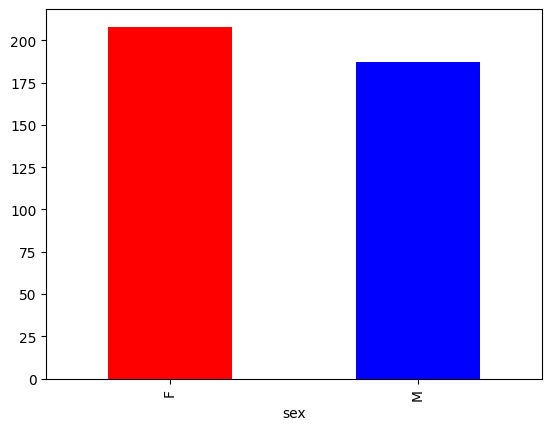

In [43]:
data['sex'].value_counts().plot(kind='bar',color=['red','blue'])

# visualiser la colonne sex sous forme cercle (pie)

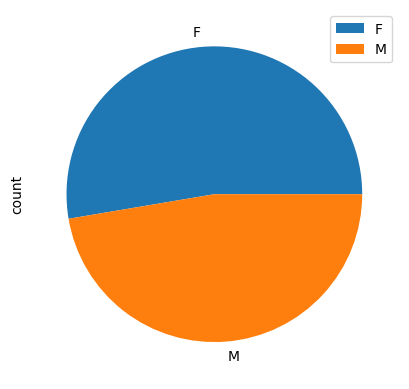

In [44]:
data['sex'].value_counts().plot(kind='pie')
plt.legend()

# afficher les colonnes de dataset

In [45]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

# visualiser la colonne school sous forme bar

#### school : École fréquentée. Valeurs possibles : "GP" (Gabriel Pereira) / "MS" (Mousinho da Silveira).

<Axes: xlabel='school'>

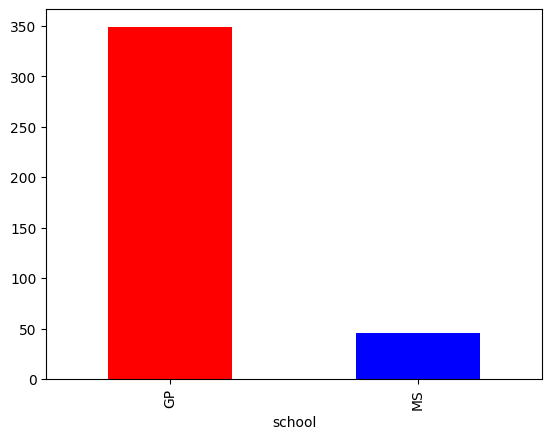

In [46]:
data['school'].value_counts().plot(kind='bar',color=['red','blue'])

# visualiser la colonne school sous forme cercle (pie)

<Axes: ylabel='count'>

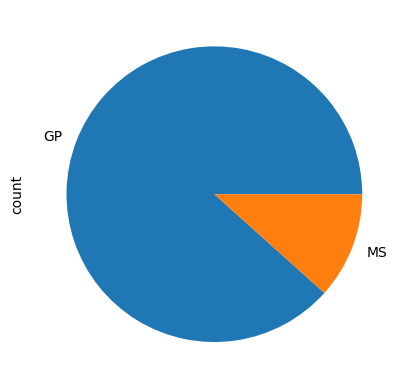

In [47]:
data['school'].value_counts().plot(kind='pie')

# famsize

#### famsize : Taille de la famille. Valeurs possibles : "LE3" (Famille de 3 membres ou moins) / "GT3" (Famille de plus de 3 membres).

In [48]:
data['famsize'].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

<Axes: xlabel='famsize'>

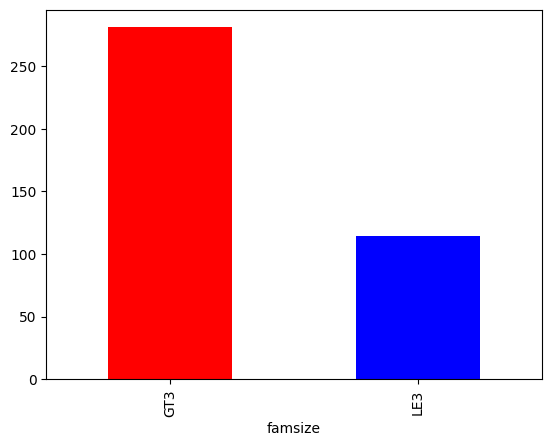

In [49]:
data['famsize'].value_counts().plot(kind='bar',color=['red','blue'])

<Axes: ylabel='count'>

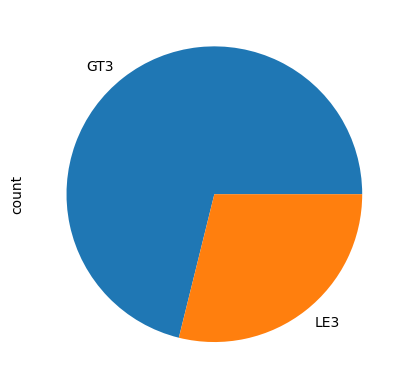

In [50]:
data['famsize'].value_counts().plot(kind='pie')

In [51]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

# Pstatus

#### Pstatus : Statut des parents. Valeurs possibles : "T" (Les parents sont ensemble) / "A" (Les parents sont séparés).

In [52]:
data['Pstatus'].value_counts()

Pstatus
T    354
A     41
Name: count, dtype: int64

<Axes: xlabel='Pstatus'>

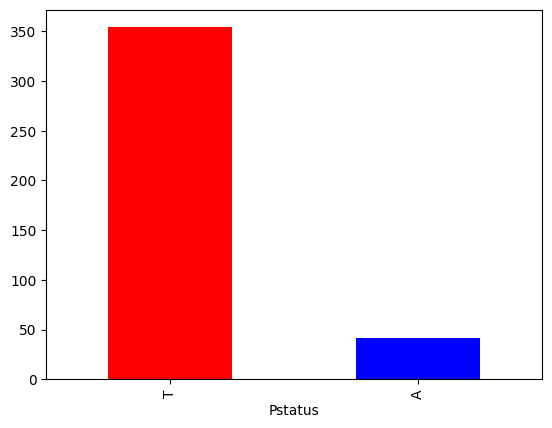

In [53]:
data['Pstatus'].value_counts().plot(kind='bar',color=['red','blue'])

<Axes: ylabel='count'>

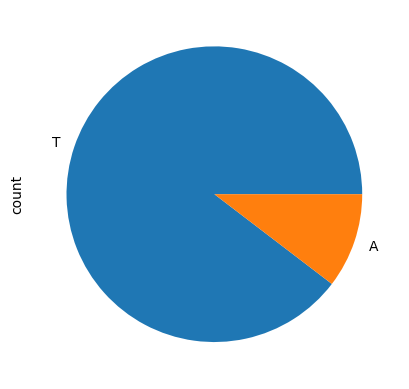

In [104]:
data['Pstatus'].value_counts().plot(kind='pie')

In [105]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

In [106]:
data['Medu'].value_counts()

Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

In [107]:
data['Fedu'].value_counts()

Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64

# Mjob

#### Mjob : Profession de la mère. Valeurs possibles : "teacher", "health", "services", "at_home", "other".

In [108]:
data['Mjob'].value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

<Axes: xlabel='Mjob'>

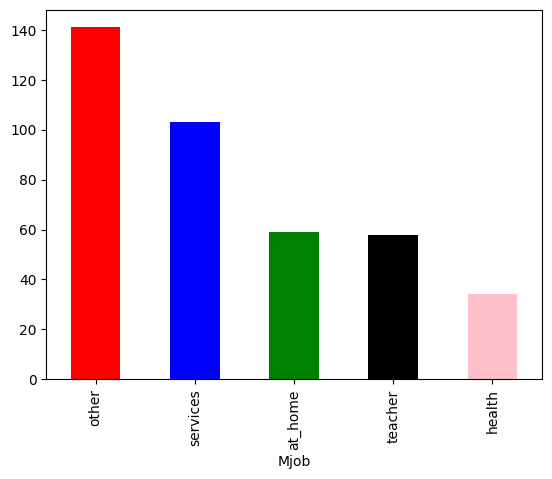

In [109]:
data['Mjob'].value_counts().plot(kind='bar',color=['red','blue','green','black','pink'])


<Axes: ylabel='count'>

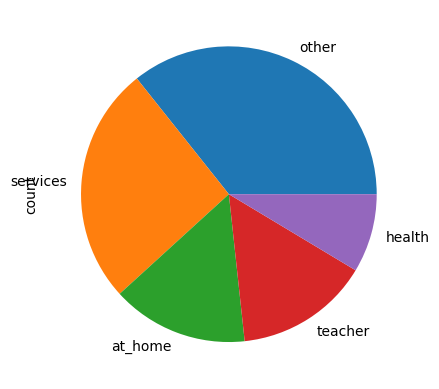

In [110]:
data['Mjob'].value_counts().plot(kind='pie')

In [111]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

# reason

#### reason : Raison principale pour choisir l'école. Valeurs possibles : "home", "reputation", "course", "other".

In [112]:
data['reason'].value_counts()

reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

Text(0, 0.5, 'count')

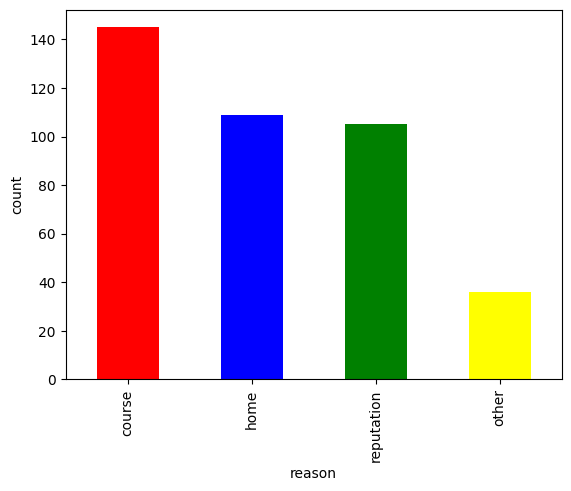

In [113]:
data['reason'].value_counts().plot(kind='bar',color=['red','blue','green','yellow'])
plt.ylabel('count')

<Axes: ylabel='count'>

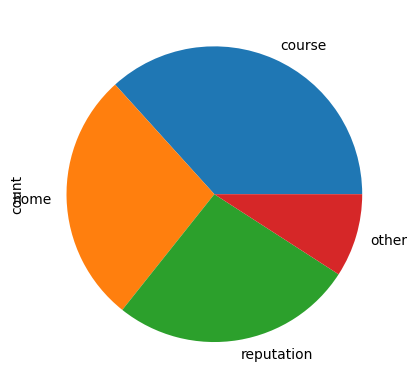

In [114]:
data['reason'].value_counts().plot(kind='pie')

In [115]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

# Guardian

#### guardian : Tuteur de l'élève. Valeurs possibles : "mother", "father", "other".

In [116]:
data['guardian'].value_counts()

guardian
mother    273
father     90
other      32
Name: count, dtype: int64

<Axes: xlabel='guardian'>

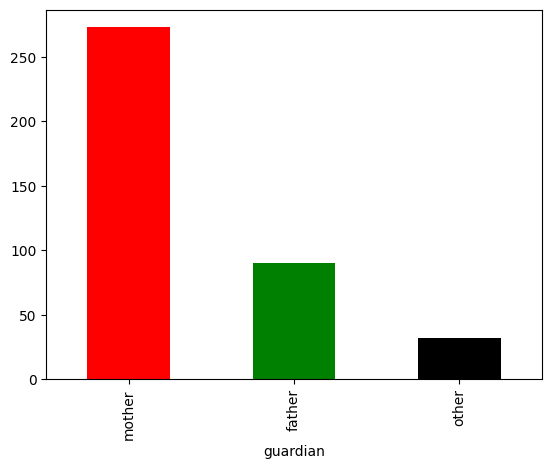

In [117]:
data['guardian'].value_counts().plot(kind='bar',color=['red','green','black'])

In [118]:
data['traveltime'].value_counts()

traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

In [119]:
data['studytime'].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

In [120]:
data['failures'].value_counts()

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

# schoolsup

#### schoolsup : Soutien scolaire. Valeurs possibles : "yes", "no".

In [121]:
data['schoolsup'].value_counts()

schoolsup
no     344
yes     51
Name: count, dtype: int64

<Axes: xlabel='schoolsup'>

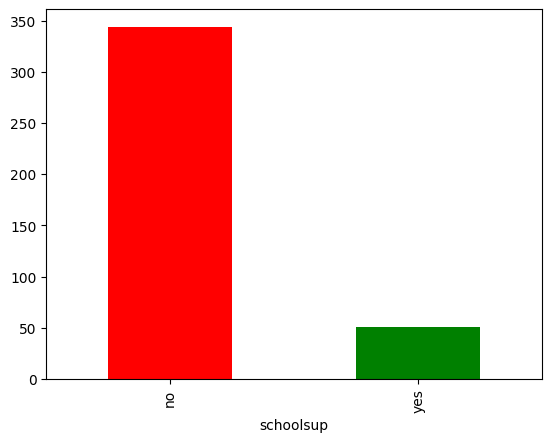

In [122]:
data['schoolsup'].value_counts().plot(kind='bar',color=['red','green'])

# famsup

#### famsup : Soutien familial. Valeurs possibles : "yes", "no".

In [123]:
data['famsup'].value_counts()

famsup
yes    242
no     153
Name: count, dtype: int64

<Axes: xlabel='famsup'>

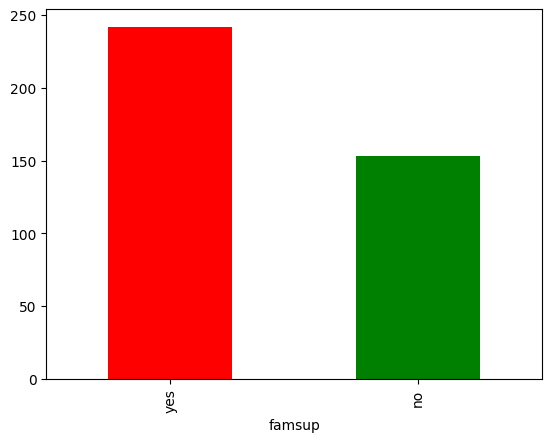

In [124]:
data['famsup'].value_counts().plot(kind='bar',color=['red','green'])

In [125]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

# paid

#### paid : Cours particuliers. Valeurs possibles : "yes", "no".

In [126]:
data['paid'].value_counts()

paid
no     214
yes    181
Name: count, dtype: int64

<Axes: xlabel='paid'>

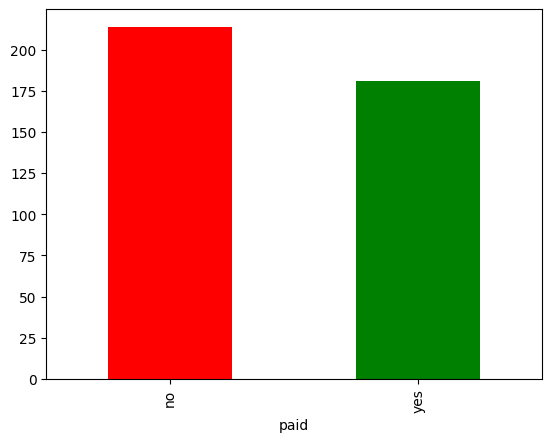

In [127]:
data['paid'].value_counts().plot(kind='bar',color=['red','green'])

# activities

#### activities : Activités extra-scolaires. Valeurs possibles : "yes", "no".

In [128]:
data['activities'].value_counts()

activities
yes    201
no     194
Name: count, dtype: int64

<Axes: xlabel='activities'>

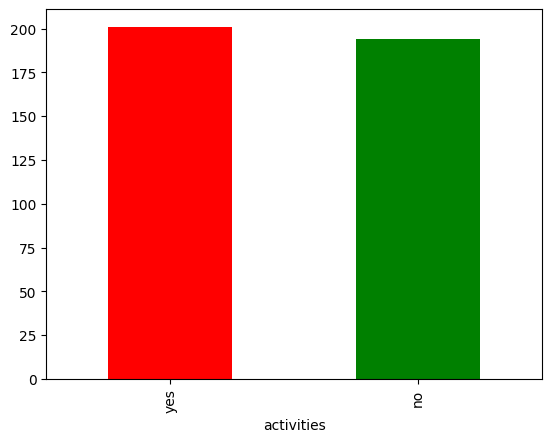

In [129]:
data['activities'].value_counts().plot(kind='bar',color=['red','green'])

# nursery

#### nursery : Fréquentation de la crèche. Valeurs possibles : "yes", "no".

In [130]:
data['nursery'].value_counts()

nursery
yes    314
no      81
Name: count, dtype: int64

<Axes: xlabel='nursery'>

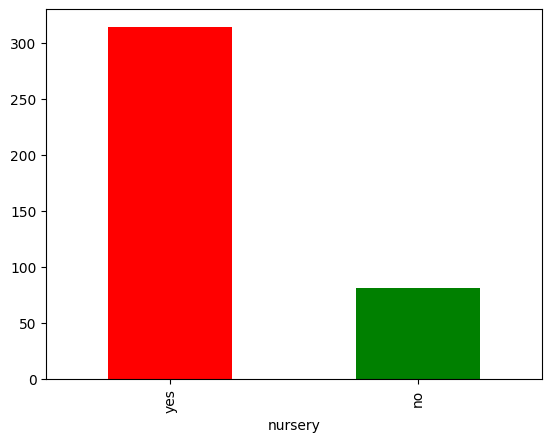

In [131]:
data['nursery'].value_counts().plot(kind='bar',color=['red','green'])

# higher

#### higher : Souhaite poursuivre des études supérieures. Valeurs possibles : "yes", "no".

In [132]:
data['higher'].value_counts()

higher
yes    375
no      20
Name: count, dtype: int64

<Axes: xlabel='higher'>

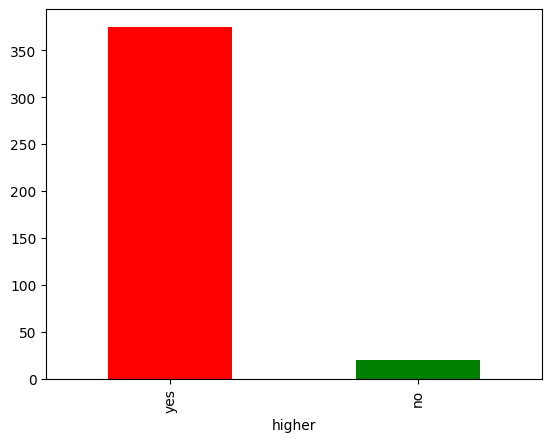

In [133]:
data['higher'].value_counts().plot(kind='bar',color=['red','green'])

In [134]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

# internet

#### internet : Accès à internet à domicile. Valeurs possibles : "yes", "no"

In [135]:
data['internet'].value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

<Axes: xlabel='internet'>

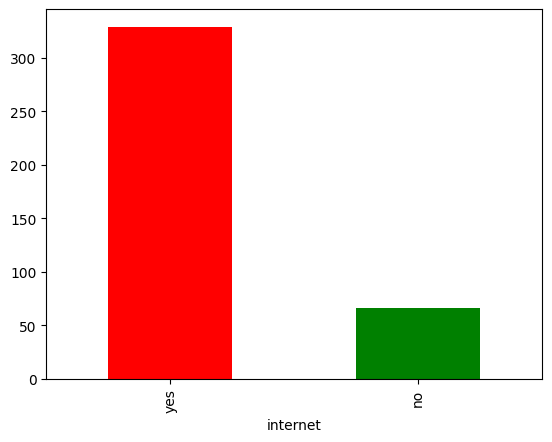

In [136]:
data['internet'].value_counts().plot(kind='bar',color=['red','green'])

# romantic

#### romantic : Relation amoureuse. Valeurs possibles : "yes", "no".

In [137]:
data['romantic'].value_counts()

romantic
no     263
yes    132
Name: count, dtype: int64

<Axes: xlabel='romantic'>

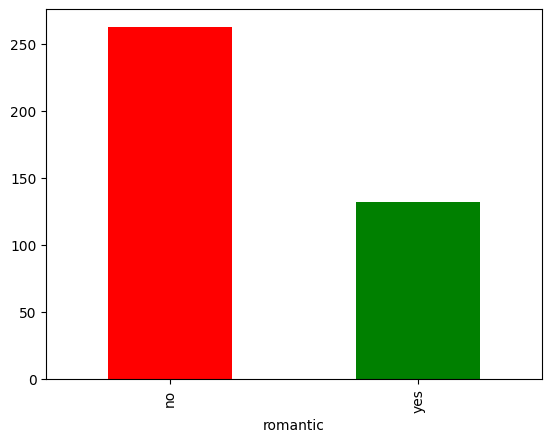

In [138]:
data['romantic'].value_counts().plot(kind='bar',color=['red','green'])

In [139]:
data['famrel'].value_counts()

famrel
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64

In [140]:
data['freetime'].value_counts()

freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64

In [141]:
data['goout'].value_counts()

goout
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64

In [142]:
data['Dalc'].value_counts()

Dalc
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64

In [143]:
data['Walc'].value_counts()

Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64

In [144]:
data['health'].value_counts()

health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64

In [145]:
data['absences'].value_counts()

absences
0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64

In [146]:
data['note'].value_counts()

note
9.000000     23
9.333333     21
12.333333    16
10.000000    15
11.666667    14
10.666667    14
12.666667    13
15.333333    13
11.333333    13
11.000000    13
8.000000     12
13.666667    12
9.666667     11
13.000000    11
13.333333    10
10.333333    10
6.333333     10
12.000000     9
14.333333     9
15.000000     9
14.666667     9
8.333333      9
7.666667      8
7.000000      8
5.333333      8
3.666667      7
14.000000     7
4.333333      6
8.666667      6
7.333333      6
6.666667      5
5.666667      5
15.666667     5
16.000000     4
16.666667     4
18.000000     4
5.000000      3
2.333333      3
17.666667     3
16.333333     3
17.333333     3
18.666667     3
1.666667      2
6.000000      2
4.000000      2
17.000000     2
18.333333     2
2.000000      2
3.000000      1
3.333333      1
1.333333      1
2.666667      1
19.333333     1
4.666667      1
Name: count, dtype: int64

In [147]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'note'],
      dtype='object')

In [148]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences        note  
count  395.000000  395.000000  
mean     5.708861   10.679325  
std      8.003096    3.696786  
min      0.000000    1.333333  
25%      0.000000    8.333333  
50%      4.000000   10.666667  
75%      8.000000   13.333333  
max     75.000000   19.333333

In [149]:
data.select_dtypes(include=['int','float']).head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences       note  
0     1     1       3         6   5.666667  
1     1     1       3         4   5.333333  
2     2     3       3        10   8.333333  
3     1     1       5         2  14.666667  
4     1     2       5         4   8.666667

#### age : Âge de l'élève (entier).
#### Medu : Niveau d'éducation de la mère (de 0 à 4).
#### Fedu : Niveau d'éducation du père (de 0 à 4).
#### traveltime : Temps de trajet jusqu'à l'école (1 à 4).
#### studytime : Temps consacré aux études (1 à 4).
#### failures : Nombre d'échecs scolaires passés (0 à 3).
#### famrel : Qualité de la relation familiale (1 à 5).
#### freetime : Temps libre de l'élève (1 à 5).
#### goout : Fréquence de sorties (1 à 5).
#### Dalc : Consommation d'alcool en semaine (1 à 5).
#### Walc : Consommation d'alcool le week-end (1 à 5).
#### health : Santé perçue (1 à 5).
#### absences : Nombre d'absences à l'école (entier).
#### note : Note finale de l'élève (float).

# Medu

In [150]:
data['Medu'].value_counts()

Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

<Axes: xlabel='Medu'>

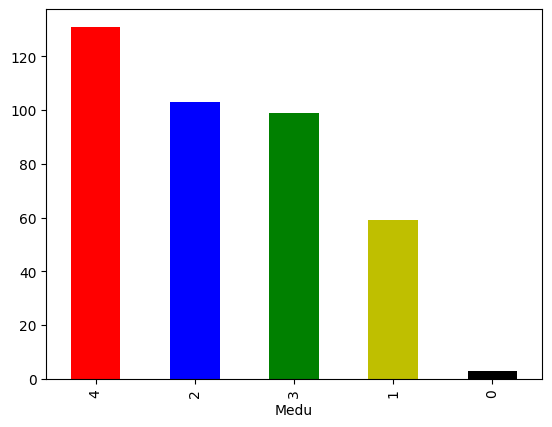

In [151]:
data['Medu'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

# Fedu

In [152]:
data['Fedu'].value_counts()

Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64

<Axes: xlabel='Fedu'>

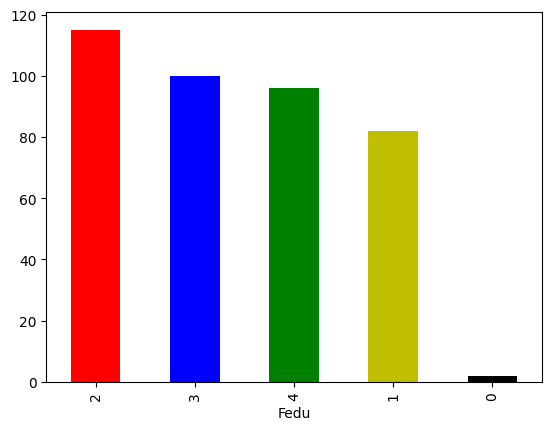

In [153]:
data['Fedu'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

In [154]:
data.select_dtypes(include=['int','float']).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'note'],
      dtype='object')

# traveltime

In [155]:
data['traveltime'].value_counts()

traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

<Axes: xlabel='traveltime'>

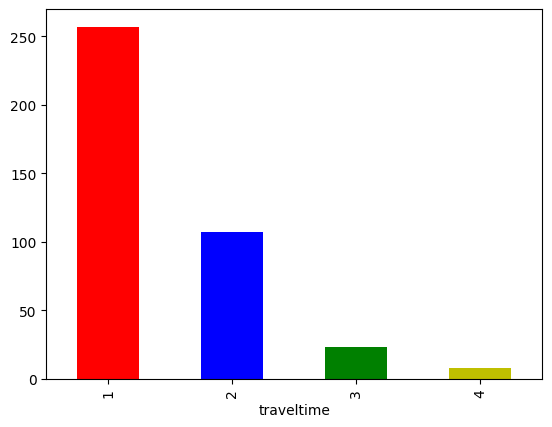

In [156]:
data['traveltime'].value_counts().plot(kind='bar',color=['r','b','g','y'])

# studytime

In [157]:
data['studytime'].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

<Axes: xlabel='studytime'>

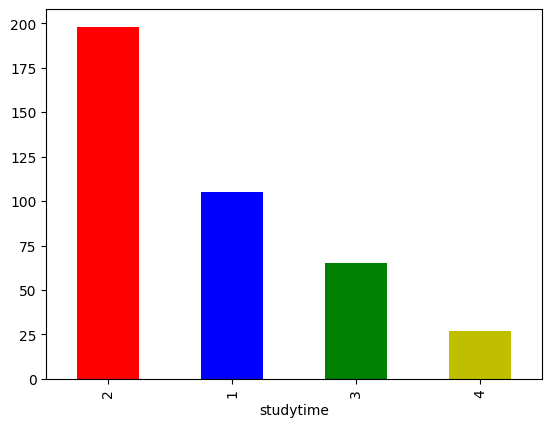

In [158]:
data['studytime'].value_counts().plot(kind='bar',color=['r','b','g','y'])

#  failures

In [159]:
data['failures'].value_counts()

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

<Axes: xlabel='failures'>

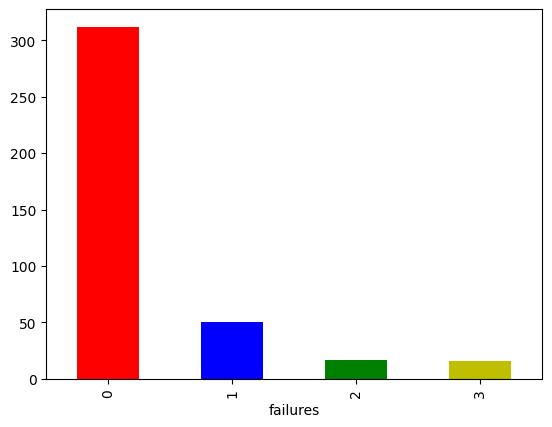

In [160]:
data['failures'].value_counts().plot(kind='bar',color=['r','b','g','y'])

# famrel

In [161]:
data['famrel'].value_counts()

famrel
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64

<Axes: xlabel='famrel'>

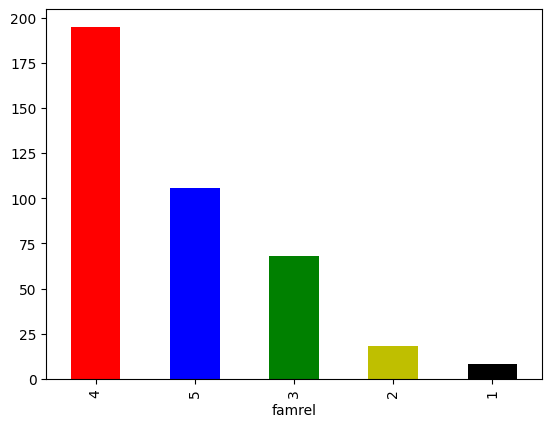

In [162]:
data['famrel'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

In [163]:
data.select_dtypes(include=['int','float']).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'note'],
      dtype='object')

# freetime

In [164]:
data['freetime'].value_counts()

freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64

<Axes: xlabel='freetime'>

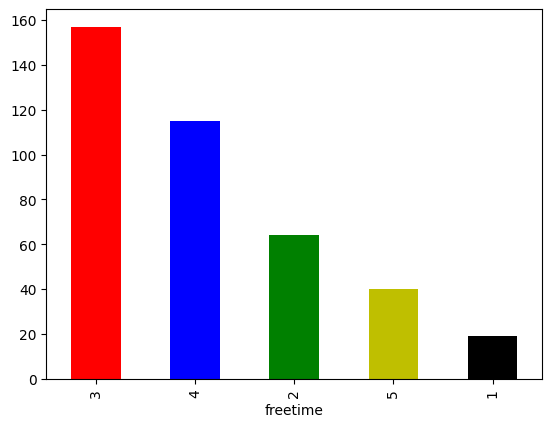

In [165]:
data['freetime'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

# goout

In [166]:
data['goout'].value_counts()

goout
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64

<Axes: xlabel='goout'>

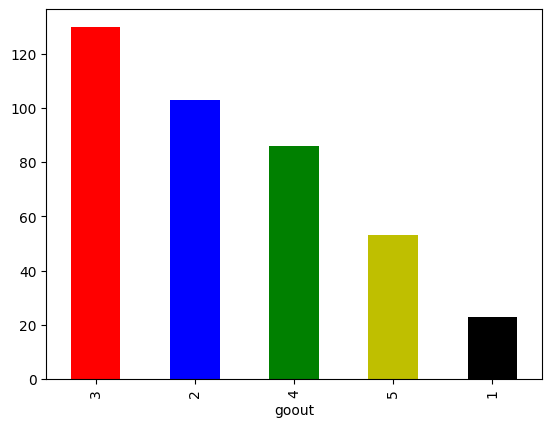

In [167]:
data['goout'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

# Dalc

In [168]:
data['Dalc'].value_counts()

Dalc
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64

<Axes: xlabel='Dalc'>

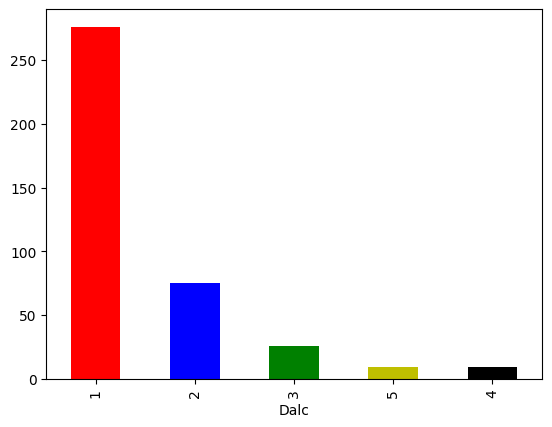

In [169]:
data['Dalc'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

# Walc

In [170]:
data['Walc'].value_counts()

Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64

<Axes: xlabel='Walc'>

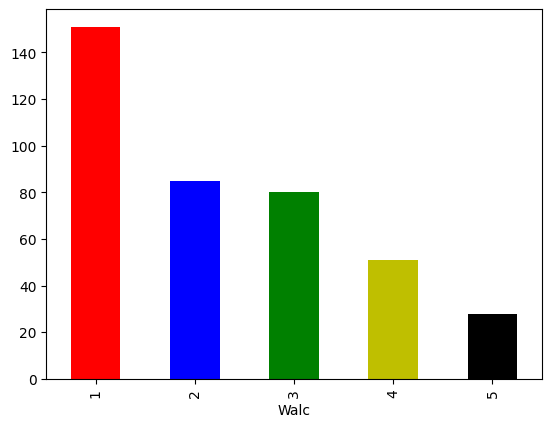

In [171]:
data['Walc'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

# health

In [172]:
data['health'].value_counts()

health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64

<Axes: xlabel='health'>

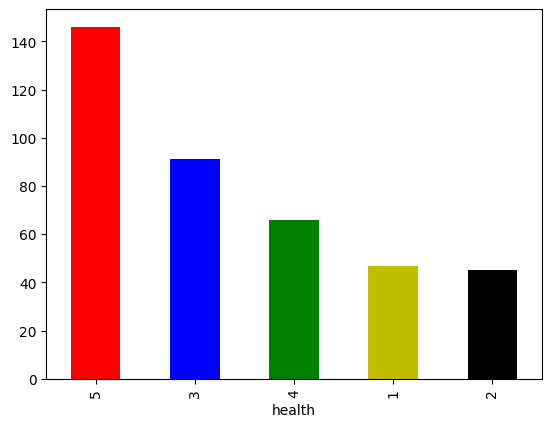

In [173]:
data['health'].value_counts().plot(kind='bar',color=['r','b','g','y','black'])

# absences

In [174]:
data['absences'].value_counts().head()

absences
0    115
2     65
4     53
6     31
8     22
Name: count, dtype: int64

<Axes: xlabel='absences'>

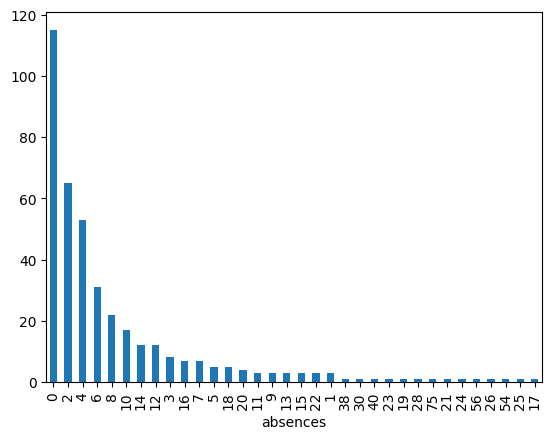

In [175]:
data['absences'].value_counts().plot(kind='bar')

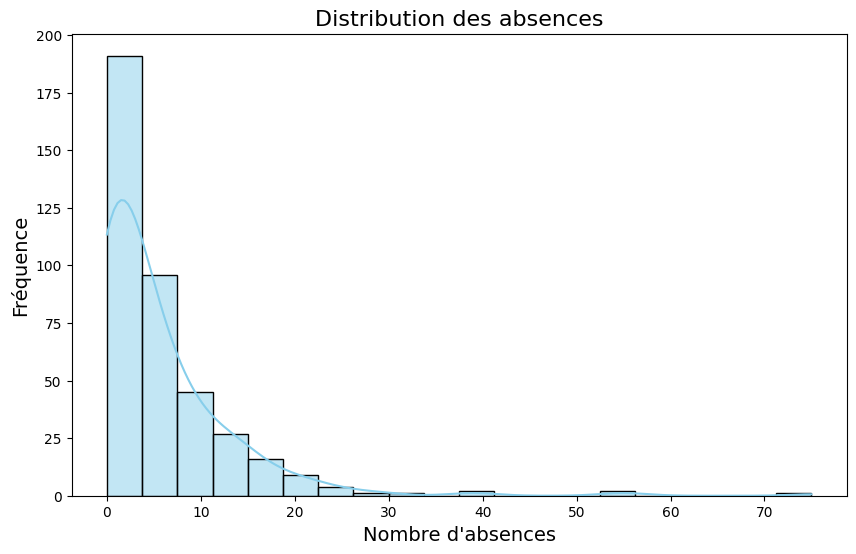

In [176]:
# Supposons que la série s'appelle 'absences'
plt.figure(figsize=(10, 6))
sns.histplot(data['absences'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Titrage et labels
plt.title('Distribution des absences', fontsize=16)
plt.xlabel('Nombre d\'absences', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher le plot
plt.show()

<Axes: >

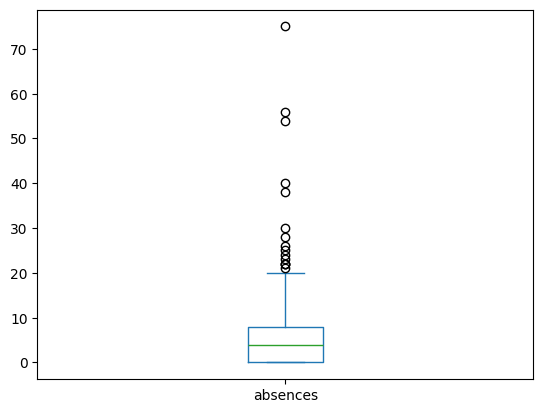

In [177]:
data['absences'].plot(kind='box')

# note 

In [178]:
data[data['absences'] > 60]

school sex  age address famsize Pstatus  Medu  Fedu   Mjob      Fjob  ...  \
276     GP   F   18       R     GT3       A     3     2  other  services  ...   

    internet romantic  famrel  freetime  goout Dalc Walc health absences  \
276      yes      yes       4         1      1    1    1      5       75   

         note  
276  9.333333  

[1 rows x 31 columns]

In [179]:
data.shape

(395, 31)

In [180]:
data['note'].value_counts().head()

note
9.000000     23
9.333333     21
12.333333    16
10.000000    15
11.666667    14
Name: count, dtype: int64

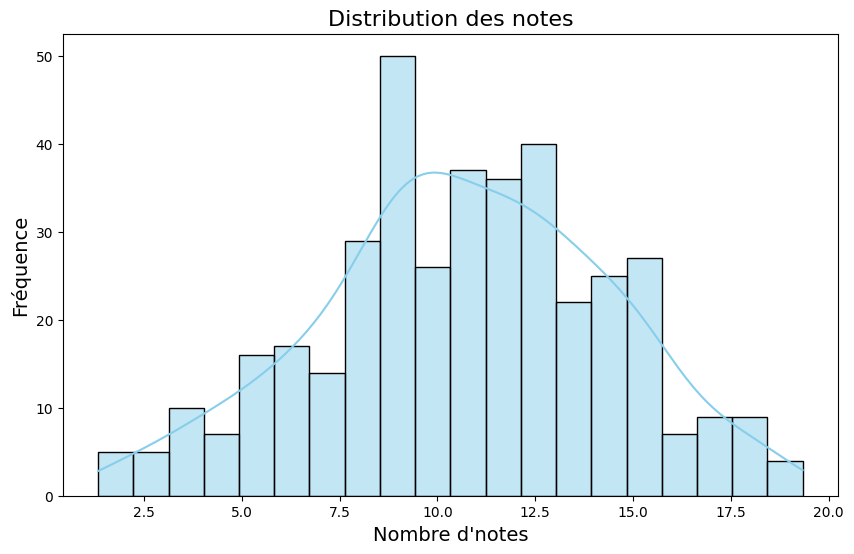

In [181]:
# Supposons que la série s'appelle 'absences'
plt.figure(figsize=(10, 6))
sns.histplot(data['note'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Titrage et labels
plt.title('Distribution des notes', fontsize=16)
plt.xlabel('Nombre d\'notes', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher le plot
plt.show()

<Axes: >

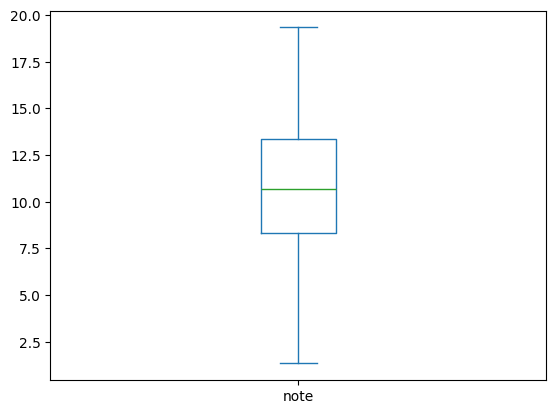

In [182]:
data['note'].plot(kind='box')

# age 

In [183]:
data['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

<Axes: xlabel='age'>

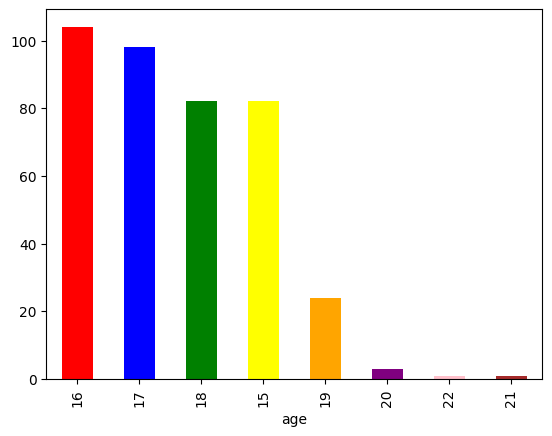

In [184]:
data['age'].value_counts().plot(kind='bar',color= ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown'])

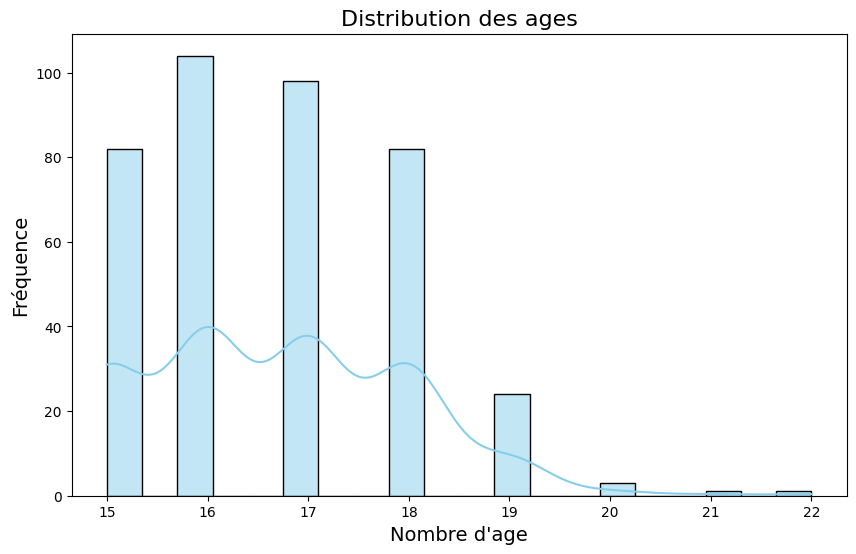

In [185]:
# Supposons que la série s'appelle 'absences'
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Titrage et labels
plt.title('Distribution des ages', fontsize=16)
plt.xlabel('Nombre d\'age', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher le plot
plt.show()

<Axes: >

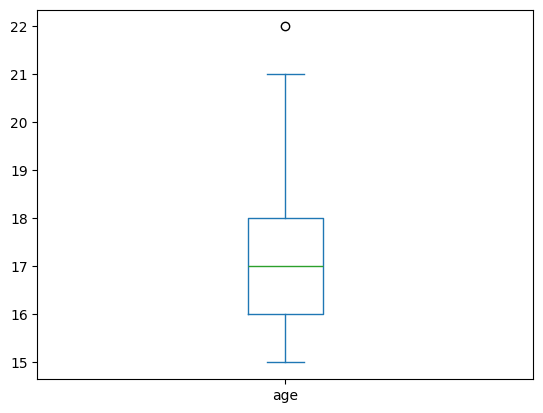

In [186]:
data_copy['age'].plot(kind='box')

# G1 

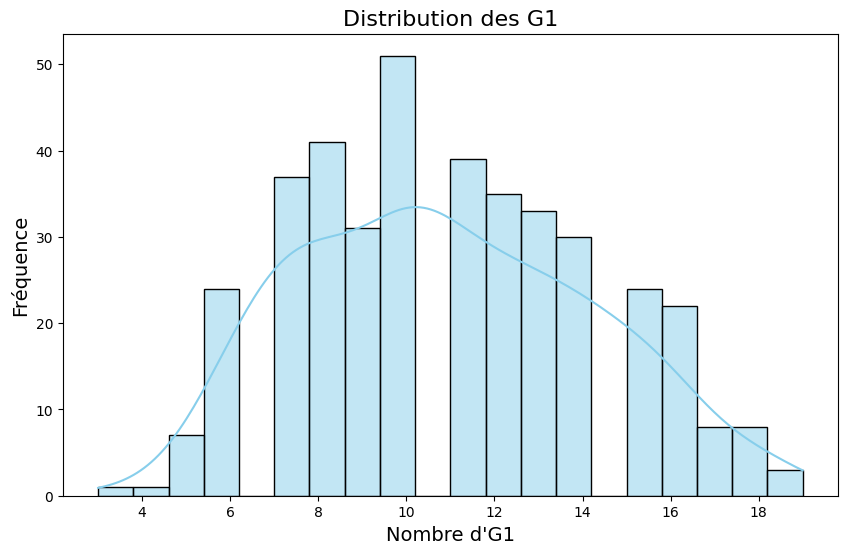

In [188]:
# Supposons que la série s'appelle 'absences'
plt.figure(figsize=(10, 6))
sns.histplot(data_copy['G1'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Titrage et labels
plt.title('Distribution des G1', fontsize=16)
plt.xlabel('Nombre d\'G1', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher le plot
plt.show()

<Axes: >

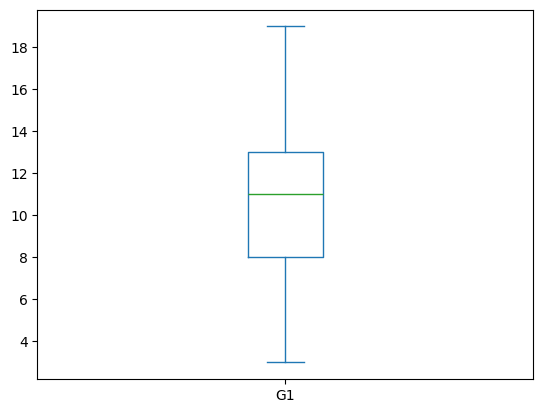

In [189]:
data_copy['G1'].plot(kind='box')

# G2 

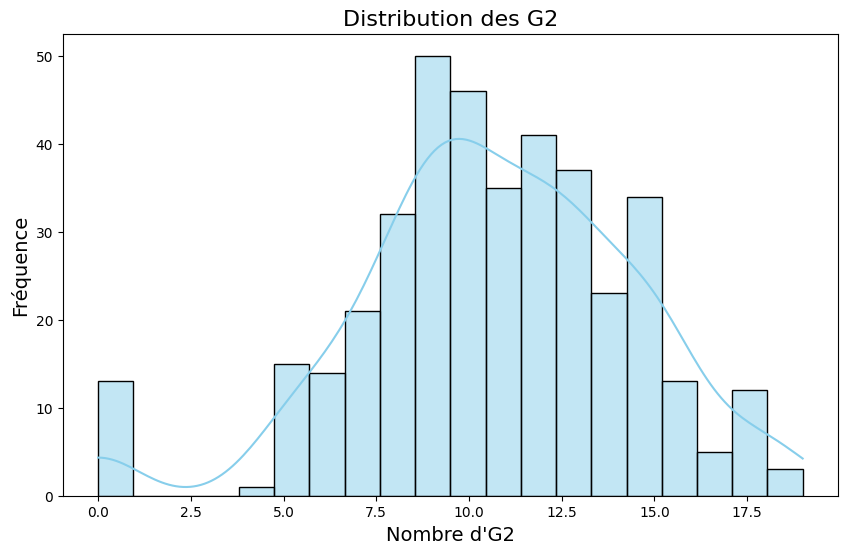

In [172]:
# Supposons que la série s'appelle 'absences'
plt.figure(figsize=(10, 6))
sns.histplot(data['G2'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Titrage et labels
plt.title('Distribution des G2', fontsize=16)
plt.xlabel('Nombre d\'G2', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher le plot
plt.show()

<Axes: >

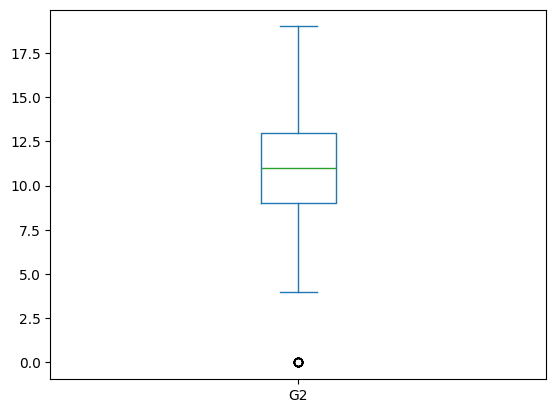

In [173]:
data['G2'].plot(kind='box')

In [174]:
data[data['G2'] < 2]

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
130     GP   F   15       R     GT3       T     3     4  services   teacher   
131     GP   F   15       U     GT3       T     1     1   at_home     other   
134     GP   M   15       R     GT3       T     3     4   at_home   teacher   
135     GP   F   15       U     GT3       T     4     4  services   at_home   
136     GP   M   17       R     GT3       T     3     4   at_home     other   
137     GP   F   16       U     GT3       A     3     3     other     other   
144     GP   M   17       U     GT3       T     2     1     other     other   
153     GP   M   19       U     GT3       T     3     2  services   at_home   
162     GP   M   16       U     LE3       T     1     2     other     other   
242     GP   M   16       U     LE3       T     4     3   teacher     other   
244     GP   F   18       U     GT3       T     2     1     other     other   
269     GP   F   18       R     GT3       T     2     1     other     other   
332     GP   F   18       U     GT3       T     3     3  services  services   

     ... famrel freetime  goout  Dalc  Walc health absences  G1 G2 G3  
130  ...      4        2      2     2     2      5        0  12  0  0  
131  ...      4        3      3     1     2      4        0   8  0  0  
134  ...      5        3      3     1     1      5        0   9  0  0  
135  ...      4        3      3     1     1      5        0  11  0  0  
136  ...      5        4      5     2     4      5        0  10  0  0  
137  ...      4        3      2     1     1      5        0   4  0  0  
144  ...      5        4      5     1     2      5        0   5  0  0  
153  ...      4        5      4     1     1      4        0   5  0  0  
162  ...      4        4      4     2     4      5        0   7  0  0  
242  ...      5        4      5     1     1      3        0   6  0  0  
244  ...      4        4      4     1     1      3        0   7  0  0  
269  ...      4        3      5     1     2      3        0   6  0  0  
332  ...      5        3      4     1     1      4        0   7  0  0  

[13 rows x 33 columns]

# G3

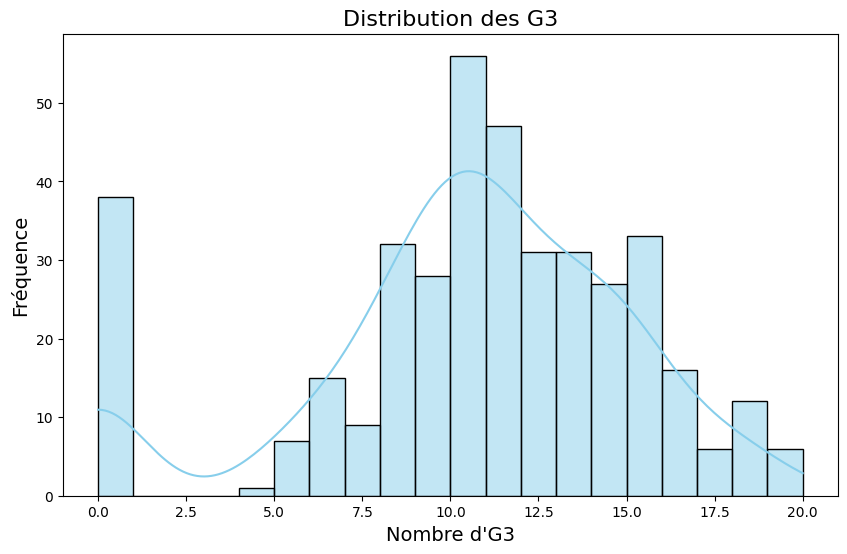

In [175]:
# Supposons que la série s'appelle 'absences'
plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Titrage et labels
plt.title('Distribution des G3', fontsize=16)
plt.xlabel('Nombre d\'G3', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher le plot
plt.show()

<Axes: >

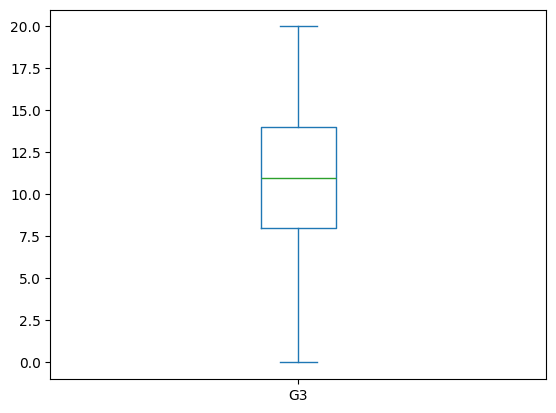

In [176]:
data['G3'].plot(kind='box')

In [12]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

# encodage des colonne non numerique
#

In [13]:
data1 = data.copy()

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## stocker les noms des colonnnes dans la variable colonnes

In [15]:
colonnes = data1.select_dtypes(include='object').columns

In [16]:
colonnes

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## importer le type dencodage : LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder

# encoder toutes les colonnes 

In [18]:
le=LabelEncoder()

In [19]:
for colonne in colonnes:
    data1[colonne] = le.fit_transform(data1[colonne])

In [20]:
data1.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]

# importer la fonction train_test_split pour la separation des donnees en train et test

In [62]:
from sklearn.model_selection import train_test_split

# separer les donnees : 80 % pour l'entrainement , et 20 % pour le test

In [63]:
x=data1.drop('note',axis=1)
y=data1['note']

In [64]:
print('la dimension de x est : ',x.shape)
print('la dimension de y est : ',y.shape)

la dimension de x est :  (395, 30)
la dimension de y est :  (395,)


In [65]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
print('la dimension de x_train est : ',x_train.shape)
print('la dimension de y_train est : ',y_train.shape)

la dimension de x_train est :  (316, 30)
la dimension de y_train est :  (316,)


In [67]:
print('la dimension de x_test est : ',x_test.shape)
print('la dimension de y_test est : ',y_test.shape)

la dimension de x_test est :  (79, 30)
la dimension de y_test est :  (79,)


# algorithme LinearRegression 

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
linearregression=LinearRegression(n_jobs=-1 )

In [181]:
linearregression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [130]:
y_predict = linearregression.predict(x_test)

In [127]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [132]:
mse=mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [133]:
print("mean squared error = ",mse)
print("mean absolute error = ",mae)

mean squared error =  12.195775191515583
mean absolute error =  2.947726728398715


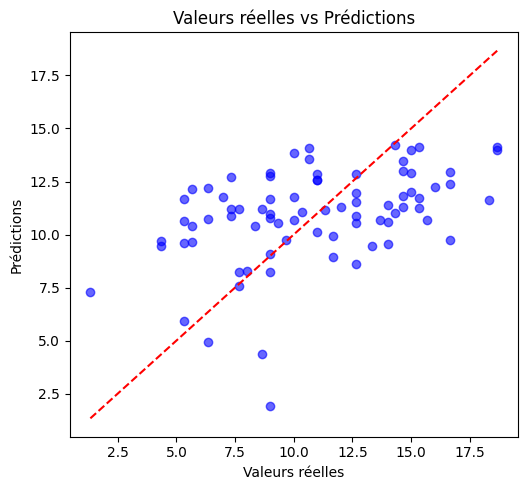

In [134]:
    plt.figure(figsize=(10, 5))
    
    # Graphique des valeurs réelles vs prédictions
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_predict, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.title("Valeurs réelles vs Prédictions")
    plt.tight_layout()
    plt.show()

In [275]:
def mesure_and_plot(y_test,y_predict):
    from sklearn.metrics import r2_score
    
    mse=mean_squared_error(y_test,y_predict)
    mae = mean_absolute_error(y_test,y_predict)
    r2score = r2_score(y_test,y_predict)

    print("mean squared error = ",mse)
    print("mean absolute error = ",mae)
    print("r2_score = ",r2score)

    plt.figure(figsize=(10, 5))
    # Graphique des valeurs réelles vs prédictions
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_predict, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.title("Valeurs réelles vs Prédictions")
    plt.tight_layout()
    plt.show()

mean squared error =  12.195775191515583
mean absolute error =  2.947726728398715
r2_score =  0.1761799486577159


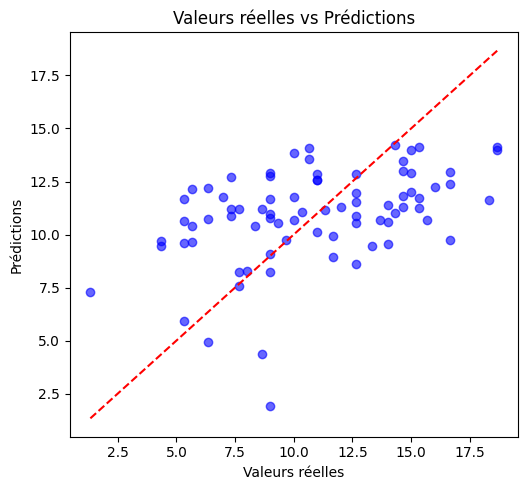

In [136]:
mesure_and_plot(y_test,y_predict)

# Normalisation   :   MinMaxScaler 

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
x_train = MinMaxScaler().fit_transform(x_train)

In [139]:
x_test = MinMaxScaler().fit_transform(x_test)

In [140]:
linearregression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [141]:
y_predict = linearregression.predict(x_test)

mean squared error =  12.29511079938932
mean absolute error =  2.9568782310326176
r2_score =  0.1694698655105954


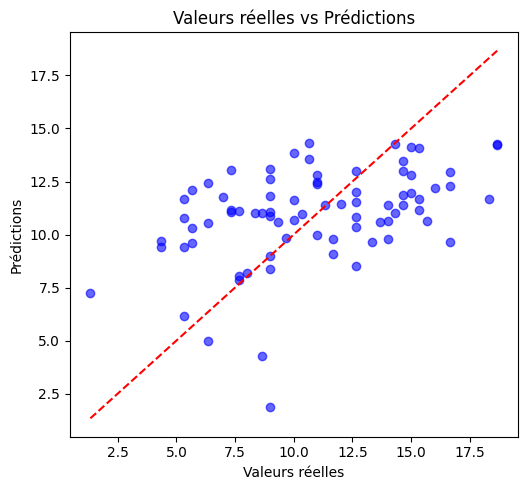

In [142]:
mesure_and_plot(y_test,y_predict)

# Ridge 

In [143]:
from sklearn.linear_model import Ridge

In [144]:
ridge = Ridge()

In [145]:
ridge.fit(x_train,y_train)

Ridge()

In [146]:
y_predict= ridge.predict(x_test)

mean squared error =  12.179827113071605
mean absolute error =  2.9477176444519095
r2_score =  0.1772572353899008


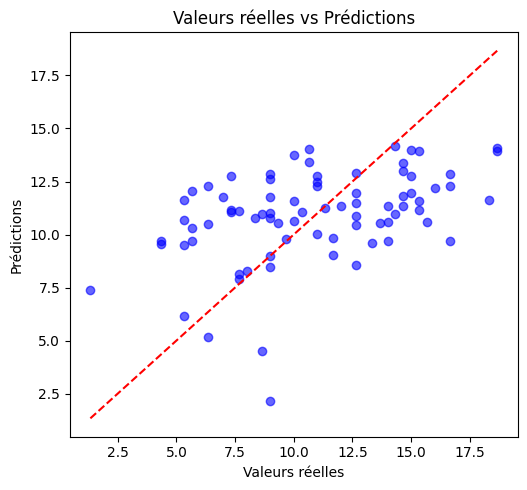

In [147]:
mesure_and_plot(y_test,y_predict)

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
ridge = Ridge()

In [150]:
param_grid = {
    'alpha' : [0,1,2,3,5,10,15,20,30,50,100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'max_iter' : [100,500,1000,1500,2000,5000],
    'tol' : [0.00001,0.0001,0.001]
}

In [151]:
grid_search = GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [152]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 3, 5, 10, 15, 20, 30, 50, 100],
                         'max_iter': [100, 500, 1000, 1500, 2000, 5000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001]},
             verbose=1)

In [153]:
print("les bests parametrs :  ",grid_search.best_params_)

les bests parametrs :   {'alpha': 15, 'max_iter': 100, 'solver': 'lsqr', 'tol': 0.001}


In [154]:
model_ridg = grid_search.best_estimator_

In [155]:
y_predict = model_ridg.predict(x_test)

mean squared error =  12.014925167660811
mean absolute error =  2.9518458894144683
r2_score =  0.18839630010710473


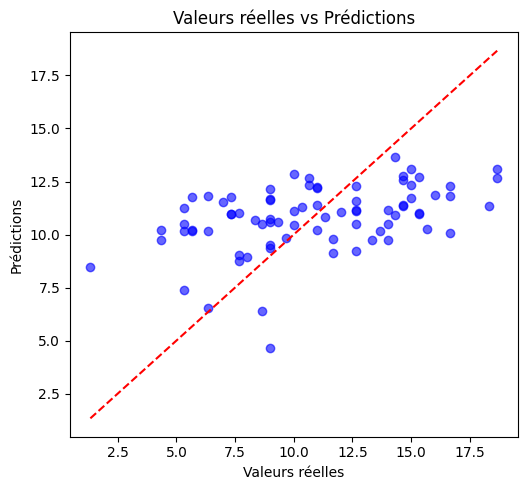

In [156]:
mesure_and_plot(y_test,y_predict)

In [157]:
from sklearn.metrics import r2_score

In [158]:
r2_score(y_test,y_predict)

0.18839630010710473

In [159]:
df=pd.DataFrame({
    'y_test' : y_test,
    'y_predict' : y_predict
})

In [160]:
df.head()

y_test  y_predict
78    8.666667   6.396079
371  12.666667   9.206836
248   4.333333   9.747105
55    9.000000  11.622297
390   9.000000   9.342921

# Lasso

In [161]:
from sklearn.linear_model import Lasso

In [162]:
lasso=Lasso()

In [163]:
param_grid = {
    'alpha' : [0.01,0,1,1,10,11,12,14,20,30,40,50,100],
    'max_iter' : [100,200,500,700,1000,1500,2000,2500,3000],
    'tol' : [0.01,0.1,0.5],
    'positive' : [True,False],
    'selection' : ['cyclic','random'],
    'warm_start' : [True,False]
    
    
}

In [164]:
grid_search=GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [165]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 2808 candidates, totalling 14040 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0, 1, 1, 10, 11, 12, 14, 20, 30, 40,
                                   50, 100],
                         'max_iter': [100, 200, 500, 700, 1000, 1500, 2000,
                                      2500, 3000],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.01, 0.1, 0.5], 'warm_start': [True, False]},
             verbose=1)

In [166]:
print("les bests parametres : ",grid_search.best_params_)

les bests parametres :  {'alpha': 0.01, 'max_iter': 700, 'positive': False, 'selection': 'random', 'tol': 0.5, 'warm_start': True}


In [167]:
model_lasso=grid_search.best_estimator_

In [168]:
model_lasso.coef_

array([ 0.36578338,  0.73896111, -0.85357512,  0.16263649,  0.50923187,
       -0.65327074,  1.03882225,  0.57489038, -0.        ,  0.0290965 ,
        0.76543539,  0.42322069, -0.50709469,  1.60009852, -3.95161941,
       -1.35115639, -0.9666742 ,  0.22906453, -0.2137466 ,  0.        ,
        1.31272337,  0.93409567, -0.42061886,  0.60096506,  0.60953177,
       -1.59934817, -0.        , -0.        , -0.28530867,  0.472026  ])

In [169]:
y_predict=model_lasso.predict(x_test)

mean squared error =  12.001897841234522
mean absolute error =  2.9392628025747563
r2_score =  0.18927629113324496


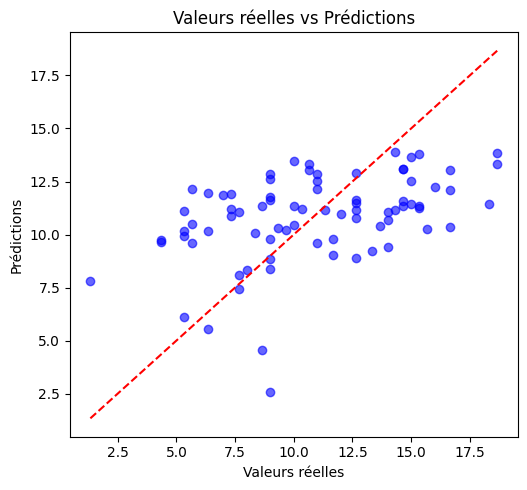

In [170]:
mesure_and_plot(y_test,y_predict)

# RandomForestRegressor

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
param_grid={
    'n_estimators' : [100,200,300,400,500,1000,1500,2000],
#    'criterion': ['mean_squared_error','mean_absolute_error','poisson'],
#    'max_depth' : [2,4,6,8,10,12,15,18,20],
#    'min_simples_split' : [1,2,3,4,5,6,7,8,9,10],
#    'min_simples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'max_features' : ['auto','sqrt','log2'],
    'random_state' : [40,42,45,99,100],
    'bootstrap' : [True,False],
    'max_samples' : [2,5,8,10,20,15]
    
}

In [176]:
rfr = RandomForestRegressor()

In [177]:
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [178]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1677 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [2, 5, 8, 10, 20, 15],
                         'n_estimators': [100, 200, 300, 400, 500, 1000, 1500,
                                          2000],
                         'random_state': [40, 42, 45, 99, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [179]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', max_samples=20, n_estimators=200,
                      random_state=99)

In [180]:
model= grid_search.best_estimator_

In [181]:
y_predict = model.predict(x_test)

mean squared error =  12.687693073136424
mean absolute error =  2.995506329113924
r2_score =  0.14295107979704713


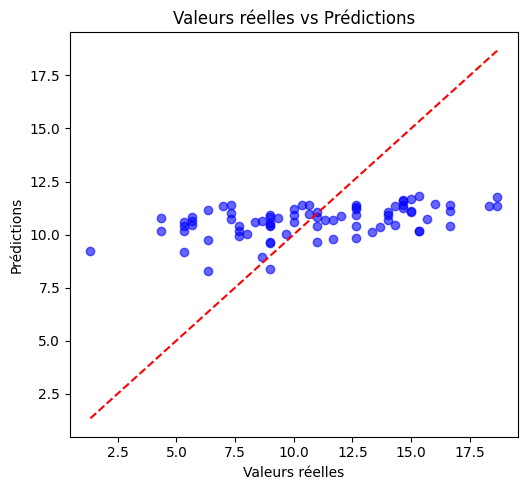

In [182]:
mesure_and_plot(y_test,y_predict)

In [183]:
df=pd.DataFrame({
    'y_test' : y_test,
    'y_predict' : y_predict
})

In [184]:
df.head(10)

y_test  y_predict
78    8.666667   8.925000
371  12.666667  10.401667
248   4.333333  10.780000
55    9.000000  10.418333
390   9.000000   9.656667
223  12.666667   9.840000
42   18.333333  11.366667
234   7.333333  11.006667
316   5.333333  10.175000
116  12.666667  11.375000

In [185]:
x_train.shape

(316, 30)

In [186]:
model.score(x_test,y_test)

0.14295107979704713

# KNeighborsRegressor

In [187]:
from sklearn.neighbors import KNeighborsRegressor

In [188]:
knn = KNeighborsRegressor(20)

In [189]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [190]:
y_predict = knn.predict(x_test)

mean squared error =  12.369799578059071
mean absolute error =  2.9559071729957807
r2_score =  0.16442466645500664


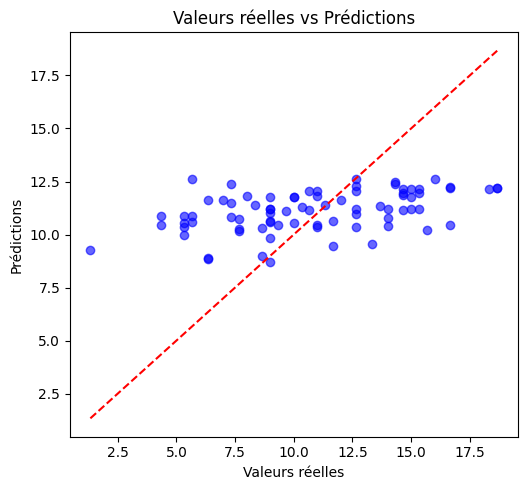

In [191]:
mesure_and_plot(y_test,y_predict)

# XGBRegressor

In [193]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.2 MB/s eta 0:01:44
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 1.0/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 1.3/124.9 MB 1.3 MB/s eta 0:01:34
    --------------------------------------- 1.6/124.9 MB 1.3 MB/s eta 0:01:35
    --------------------------------------- 1.8/124.9 MB 1.3 MB/s eta 0:01:35
    --------------------------------------- 2.4/124.9 MB 1.3 MB/s eta 0:01:34
    --------------------------------------- 2.6/124.9 MB 1.3 MB/s eta 0:01:33
    --------------------------------------- 2.9/124.9 MB 1.3 MB/s eta 0:01:33
   - -------------------------------------- 3.1/124.9 MB 1.3 MB/s eta 0:01:33
   - --

In [197]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Définir la grille réduite
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [4, 6, 8, 10, 12],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}


In [198]:
# Initialiser le modèle
xgb = XGBRegressor(random_state=42)

# Configurer la recherche en grille
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,                            # Validation croisée sur 3 folds
    scoring='neg_mean_squared_error', # Critère d'évaluation
    verbose=3,                       # Niveau de détail de la sortie
    n_jobs=-1                        # Utiliser tous les cœurs disponibles
)




In [199]:
# Exécuter la recherche sur les ensembles d'entraînement
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 3125 candidates, totalling 15625 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [201]:
# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

# Prédire sur l'ensemble de test
y_pred = grid_search.best_estimator_.predict(x_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error sur l'ensemble de test : {mse}")

Meilleurs paramètres trouvés :
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 300, 'subsample': 0.7}
Mean Squared Error sur l'ensemble de test : 10.05740366122085


mean squared error =  10.05740366122085
mean absolute error =  2.645718540320416
r2_score =  0.3206261454933077


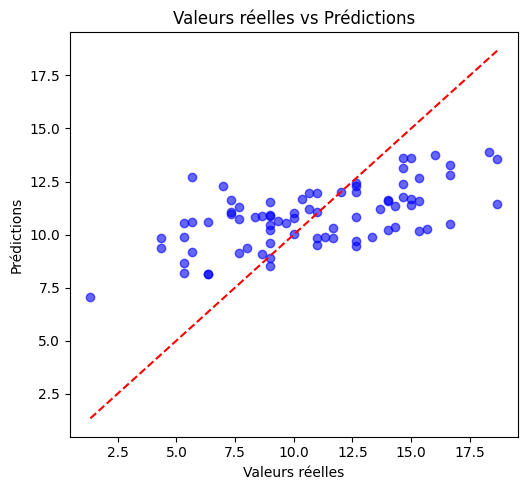

In [202]:
mesure_and_plot(y_test,y_pred)

In [176]:
from xgboost import XGBRegressor

model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)

In [177]:
model.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:04:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, cv=5, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=-1, num_parallel_tree=None, ...)

In [178]:
y_predict = model.predict(x_test)

mean squared error =  9.56911500584034
mean absolute error =  2.5595168846065985
r2_score =  0.3536098614792561


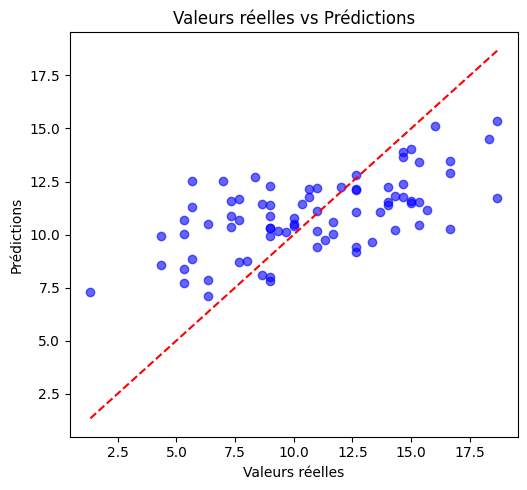

In [179]:
mesure_and_plot(y_test,y_predict)

In [180]:
df=pd.DataFrame({
    'y_test' : y_test,
    'y_predict' : y_predict
})
df.head(10)

y_test  y_predict
78    8.666667   8.089796
371  12.666667   9.189517
248   4.333333   9.913257
55    9.000000  10.893650
390   9.000000  10.303642
223  12.666667   9.434268
42   18.333333  14.483639
234   7.333333  11.599140
316   5.333333   7.724841
116  12.666667  12.156427

In [299]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0       no       no       4         3      4    1    1      3        6   
1      yes       no       5         3      3    1    1      3        4   
2      yes       no       4         3      2    2    3      3       10   
3      yes      yes       3         2      2    1    1      5        2   
4       no       no       4         3      2    1    2      5        4   

        note  
0   5.666667  
1   5.333333  
2   8.333333  
3  14.666667  
4   8.666667  

[5 rows x 31 columns]

In [116]:
data_copy = data.copy()

In [117]:
data_copy.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0       no       no       4         3      4    1    1      3        6   
1      yes       no       5         3      3    1    1      3        4   
2      yes       no       4         3      2    2    3      3       10   
3      yes      yes       3         2      2    1    1      5        2   
4       no       no       4         3      2    1    2      5        4   

        note  
0   5.666667  
1   5.333333  
2   8.333333  
3  14.666667  
4   8.666667  

[5 rows x 31 columns]

In [118]:
categorical_columns = data_copy.select_dtypes(include=['object','category']).columns

In [119]:
categorical_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

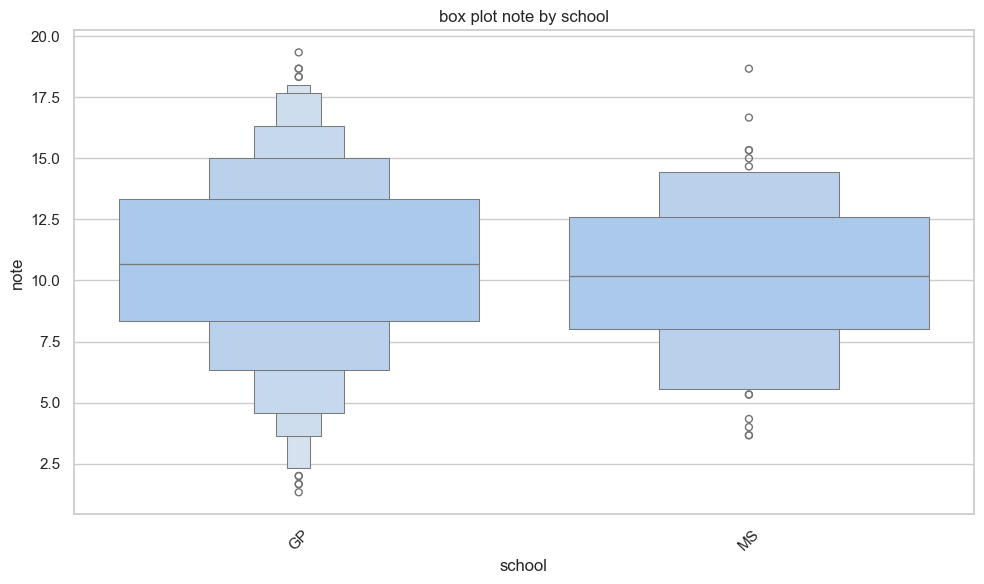

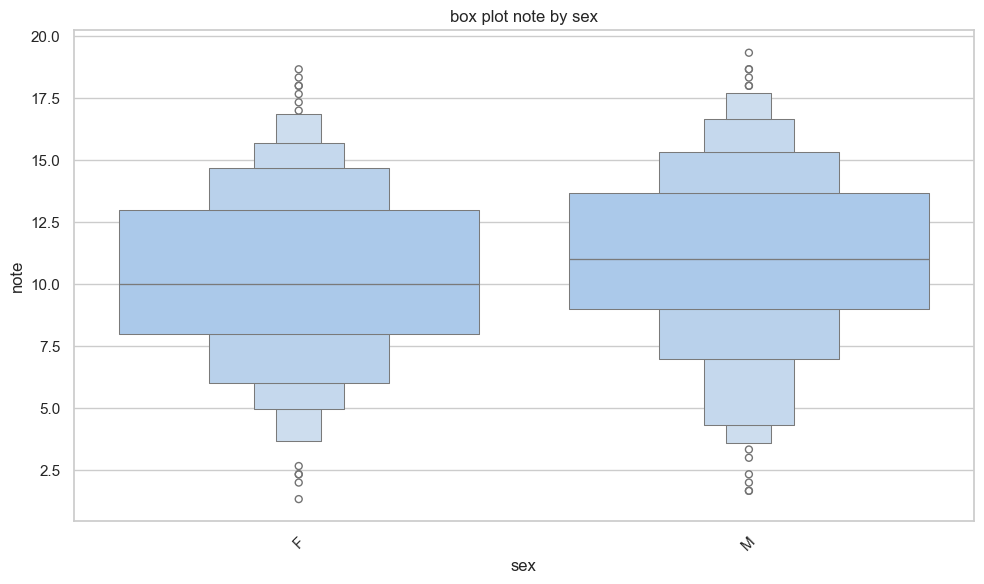

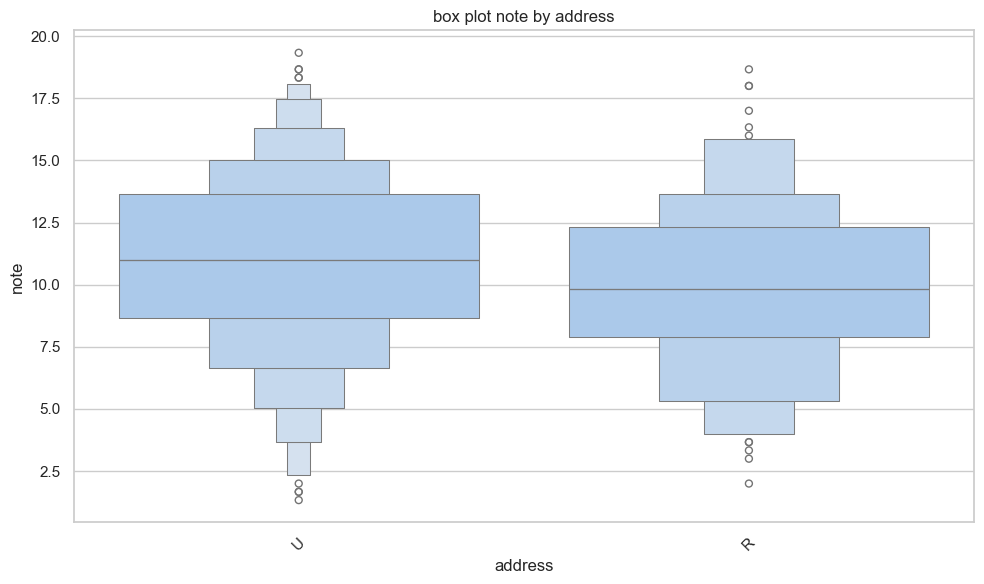

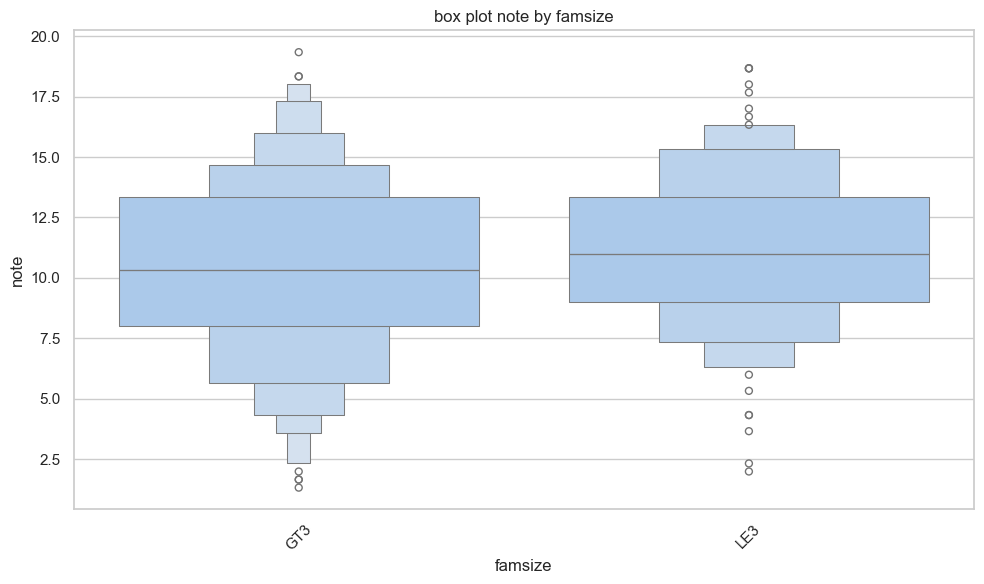

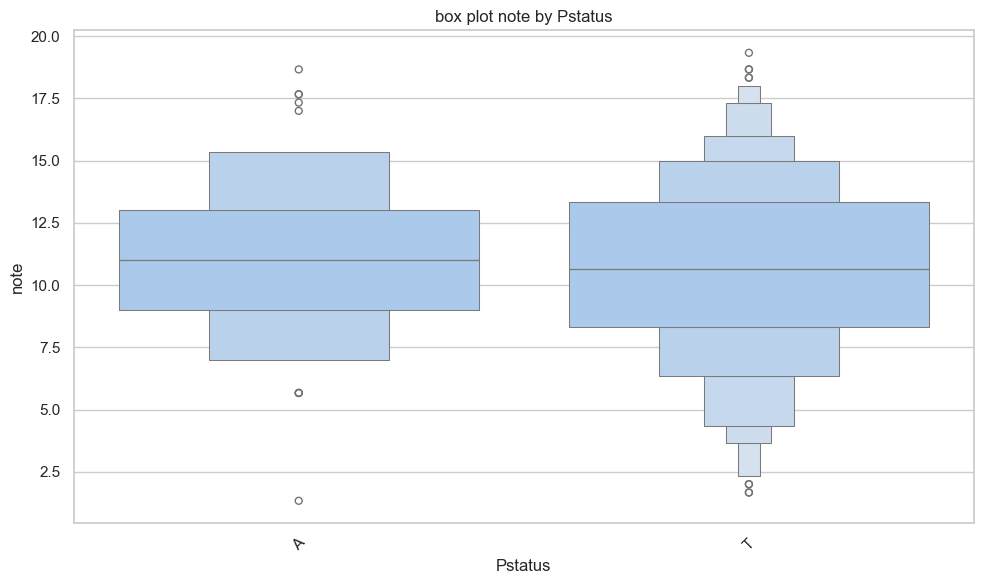

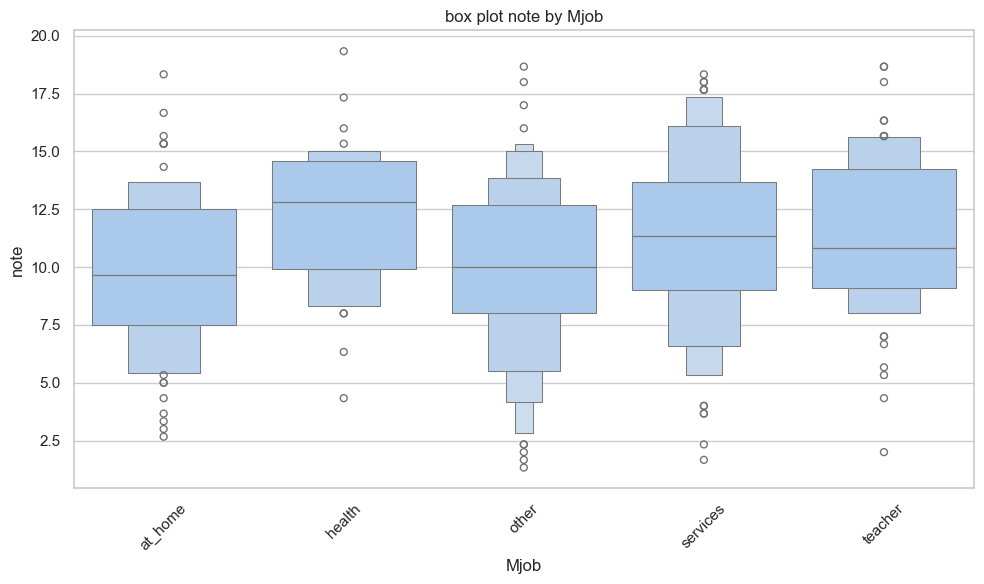

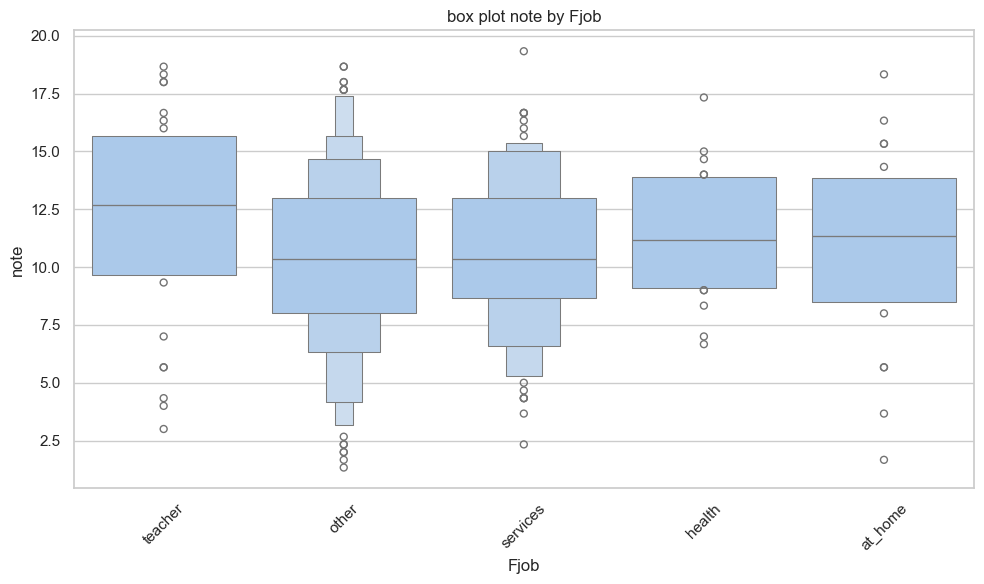

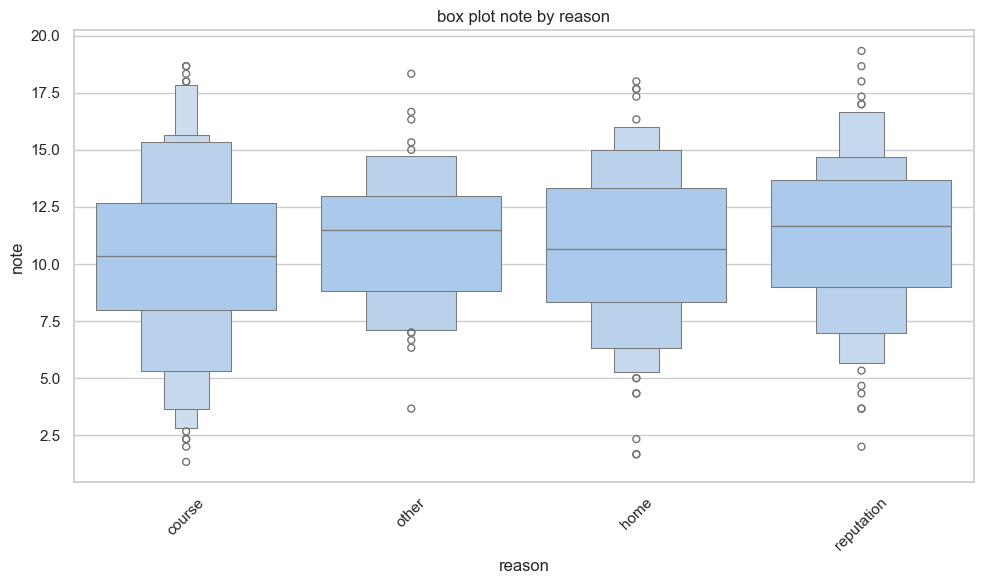

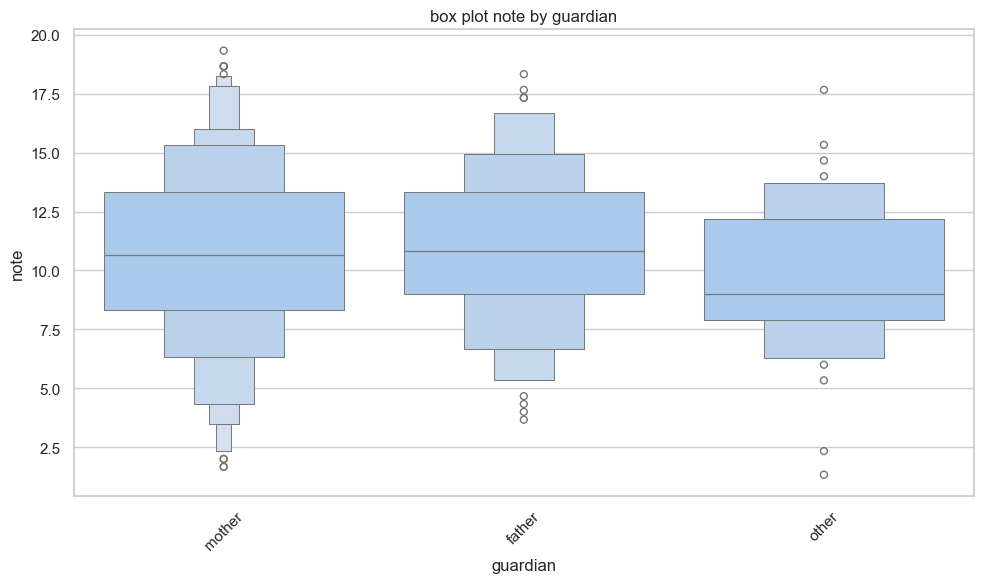

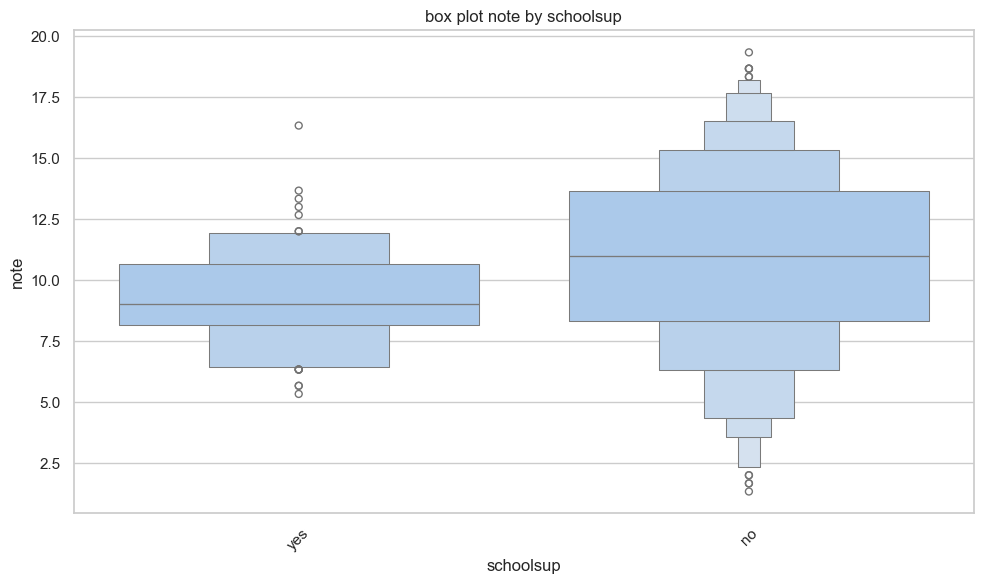

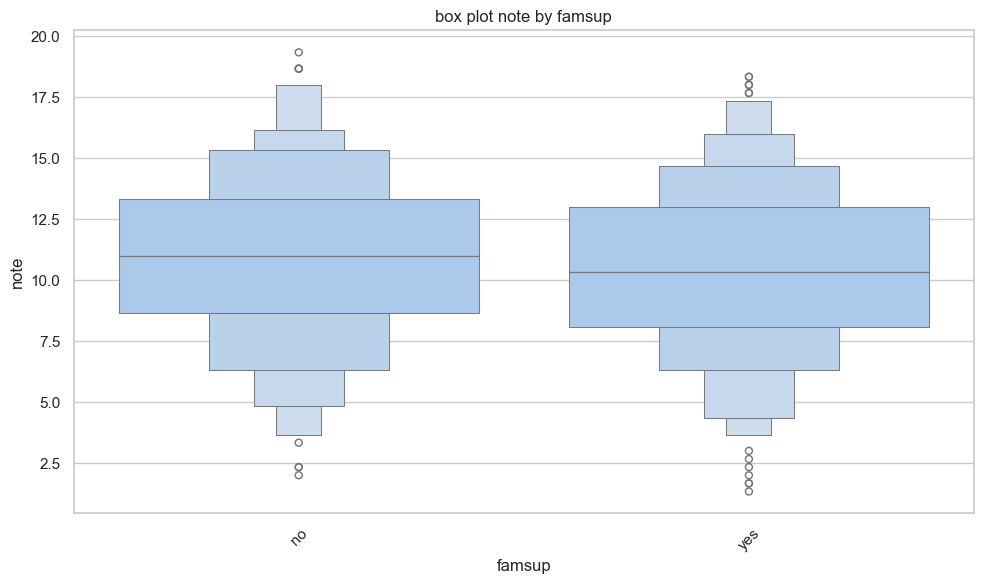

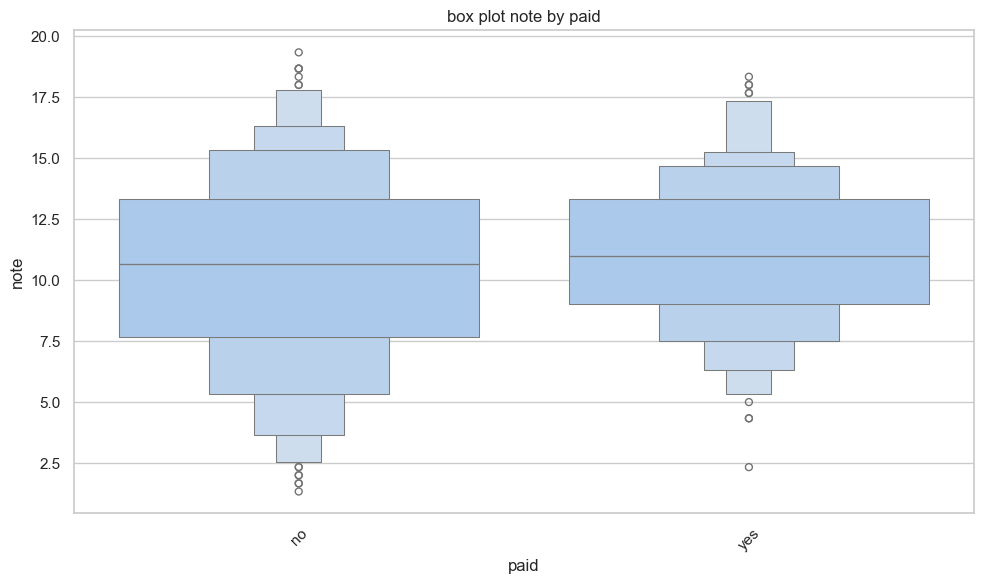

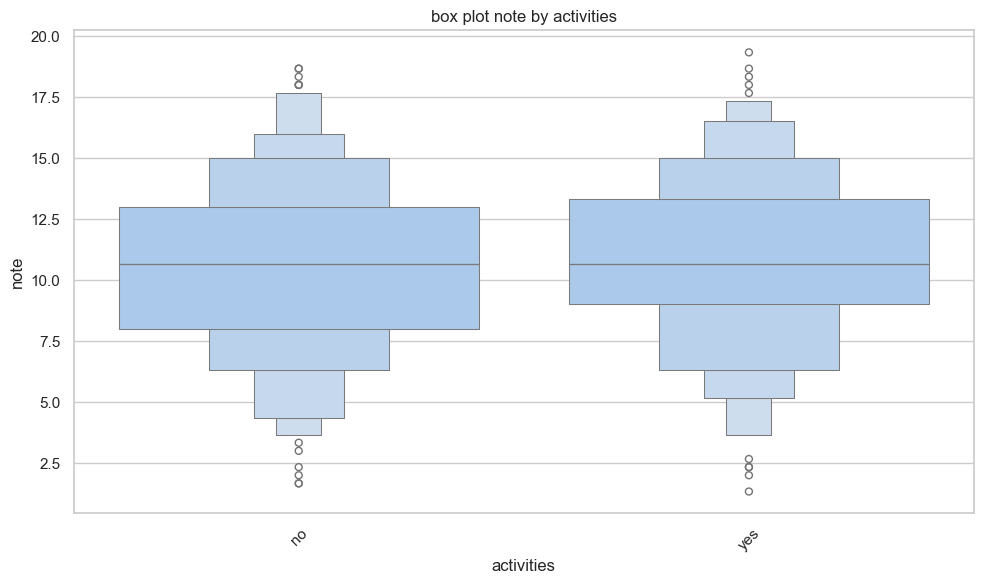

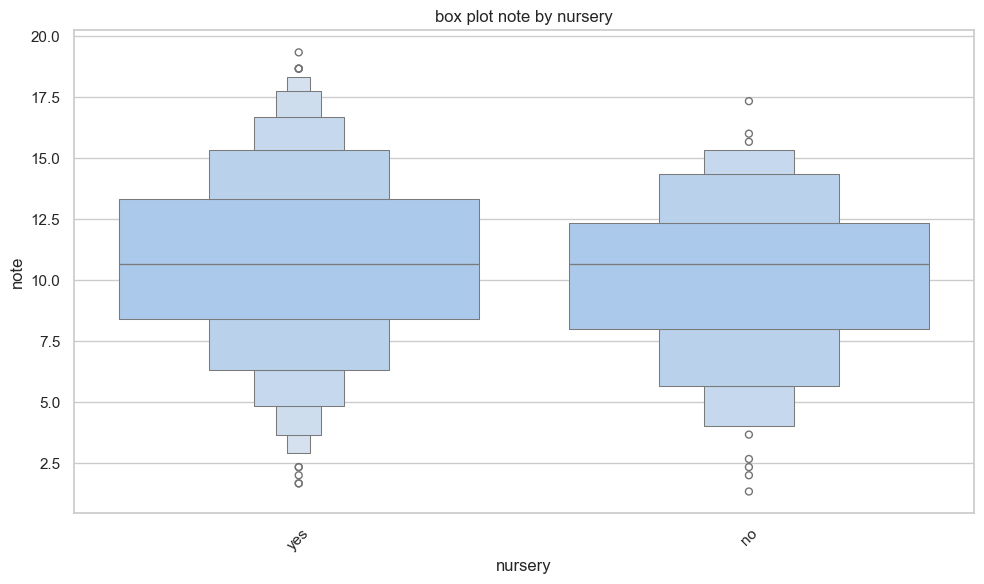

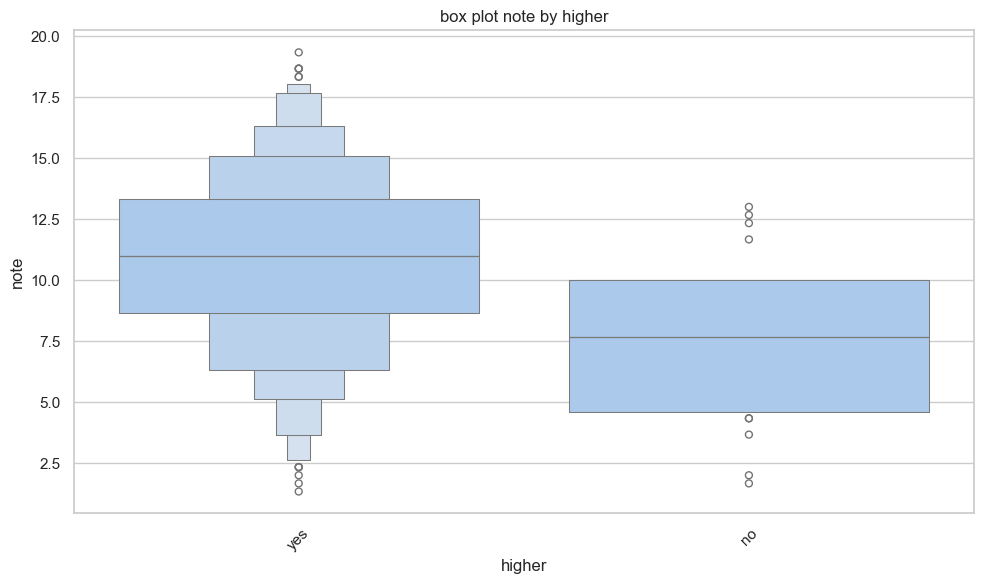

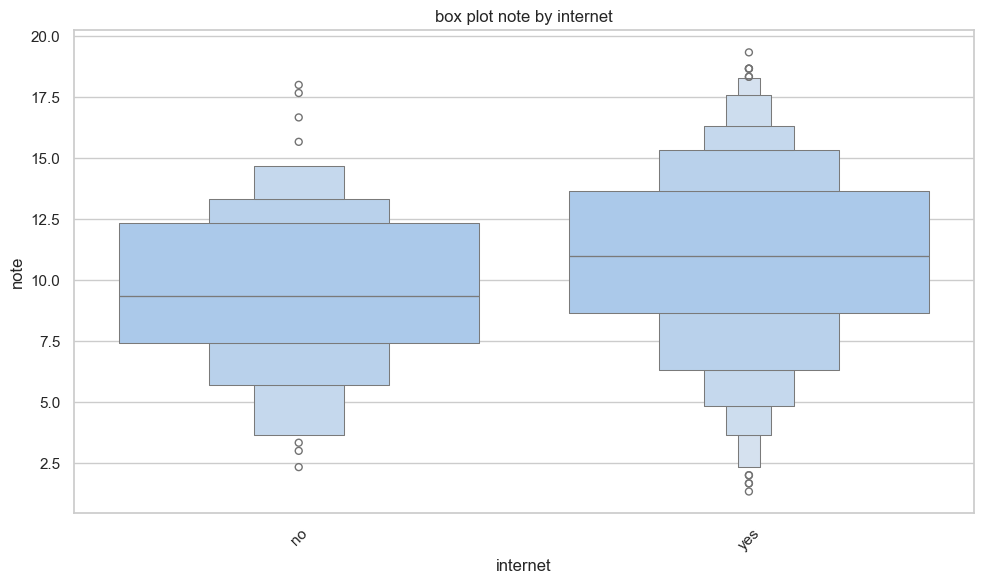

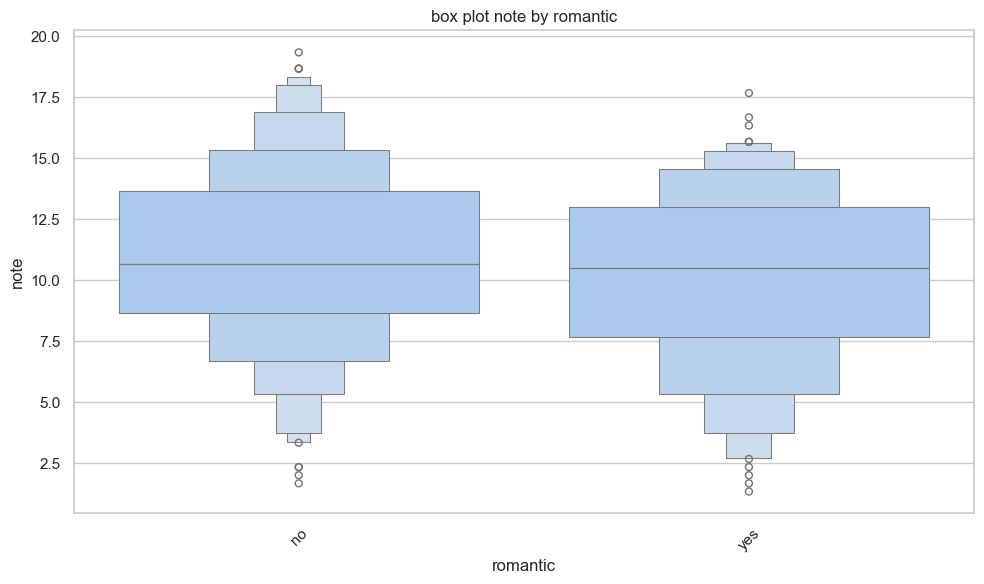

In [123]:
for colonne in categorical_columns : 
    plt.figure(figsize=(10,6))
    sns.boxenplot(data=data_copy,x=colonne,y='note')
    plt.title(f'box plot note by {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('note')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


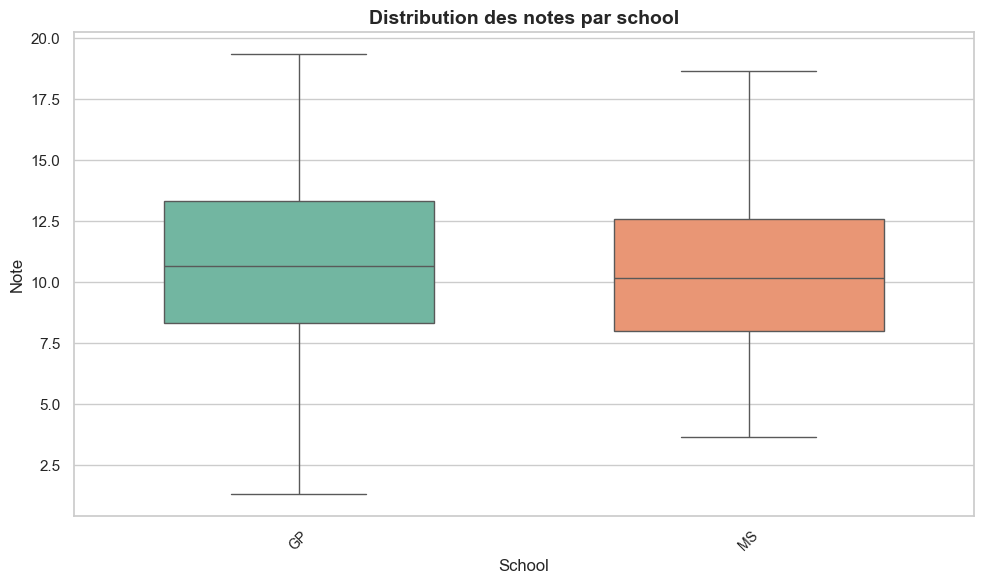

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


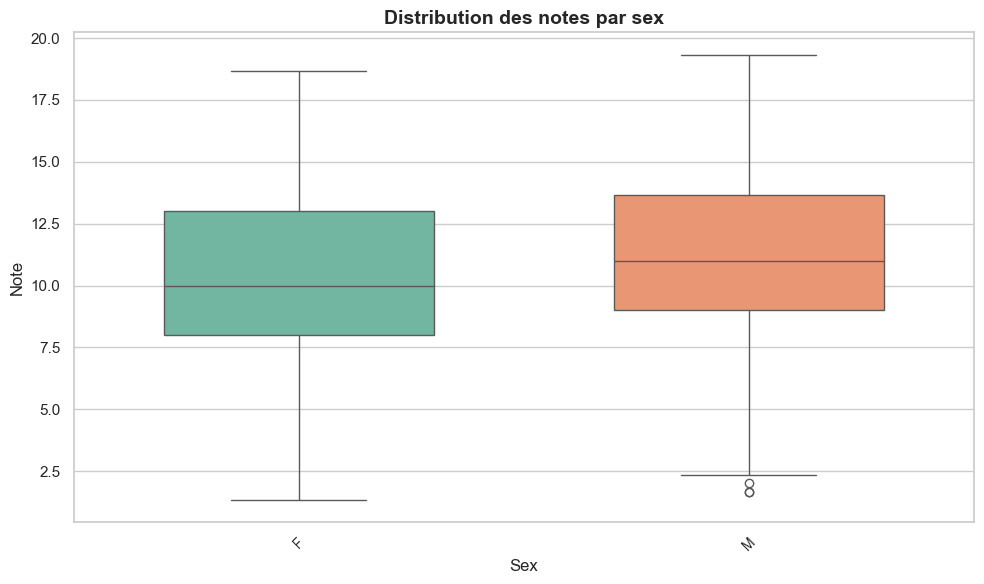

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


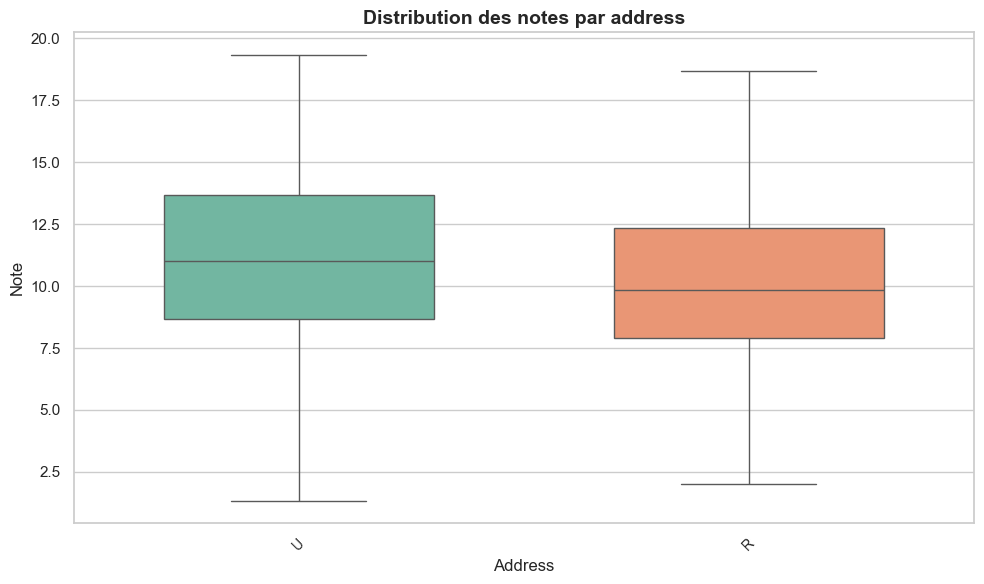

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


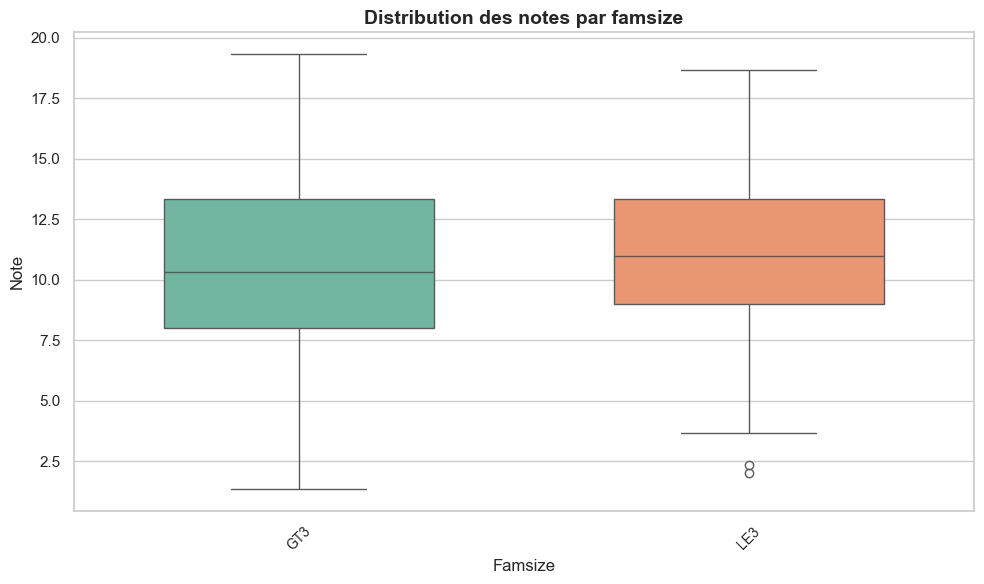

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


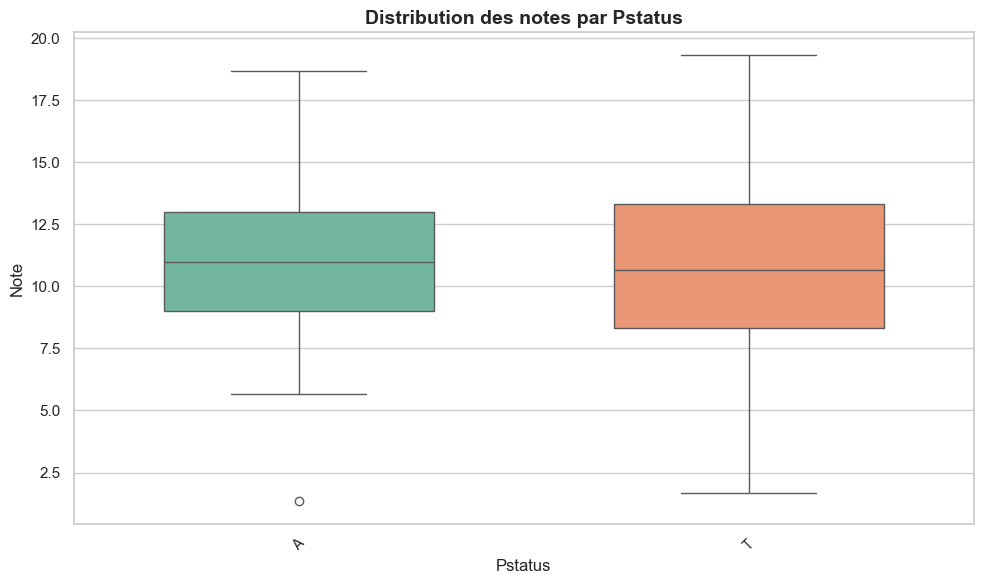

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


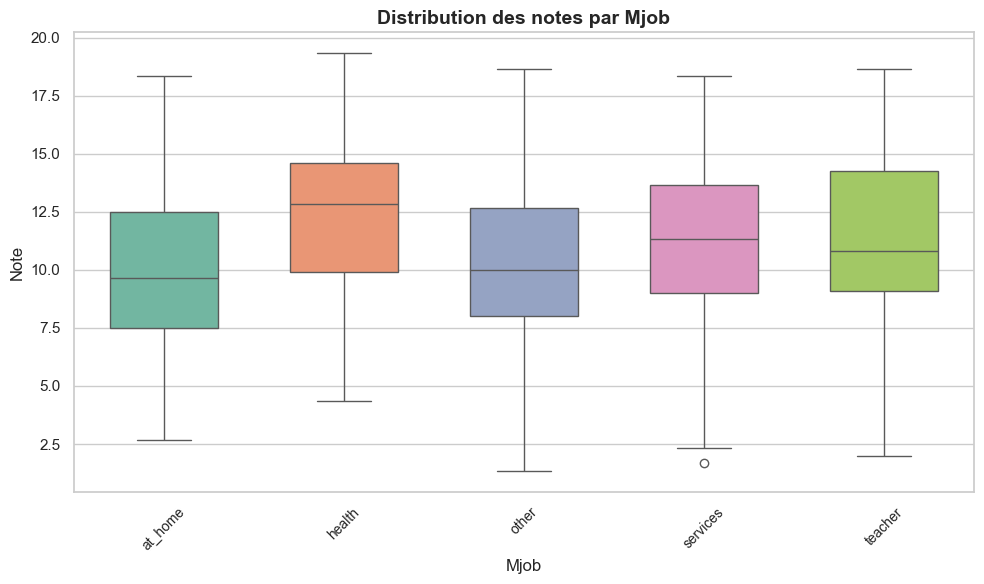

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


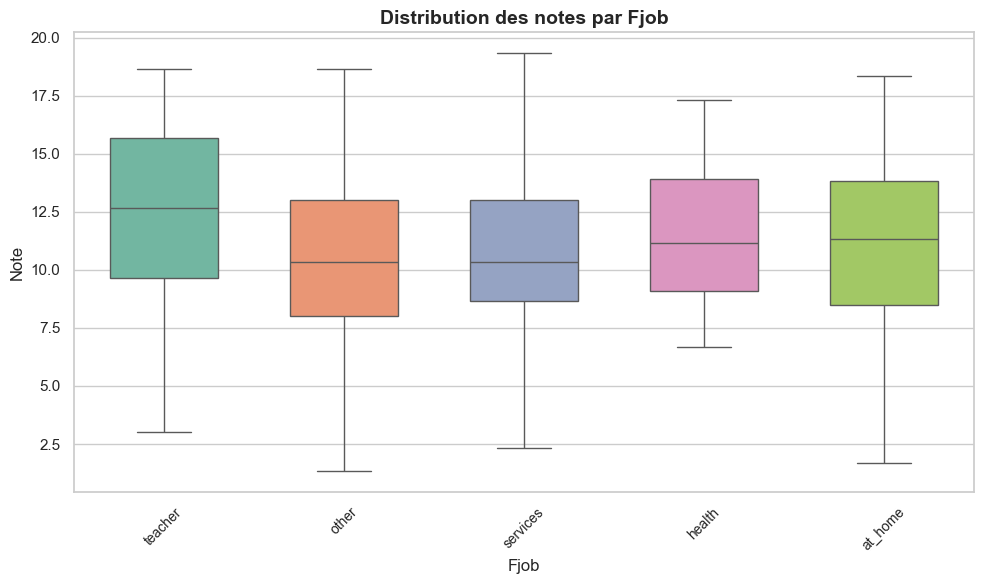

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


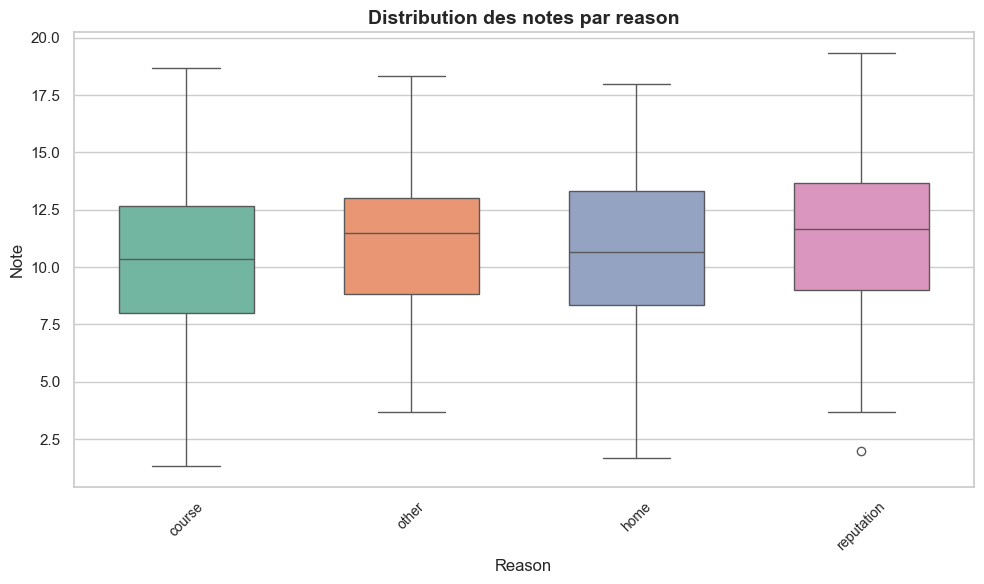

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


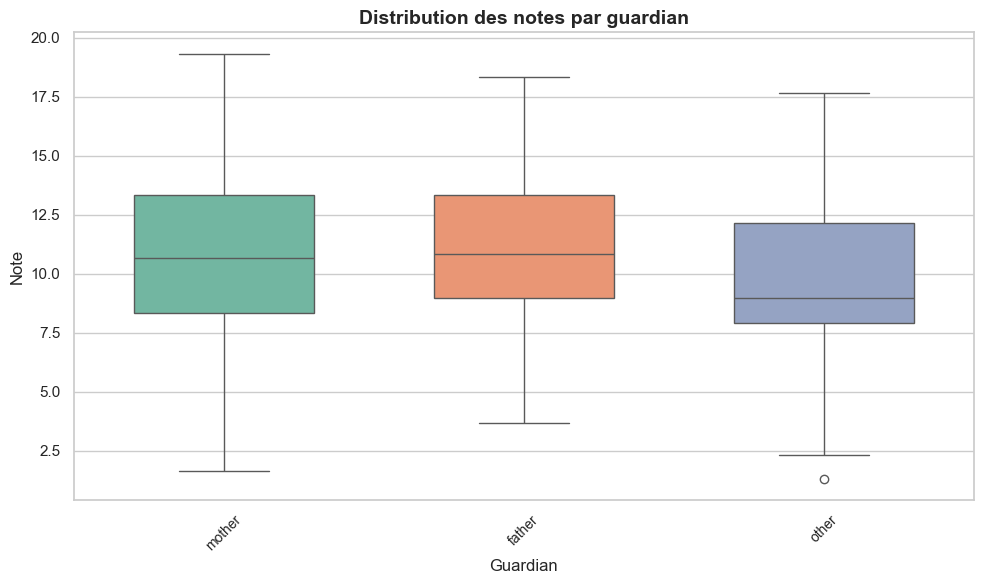

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


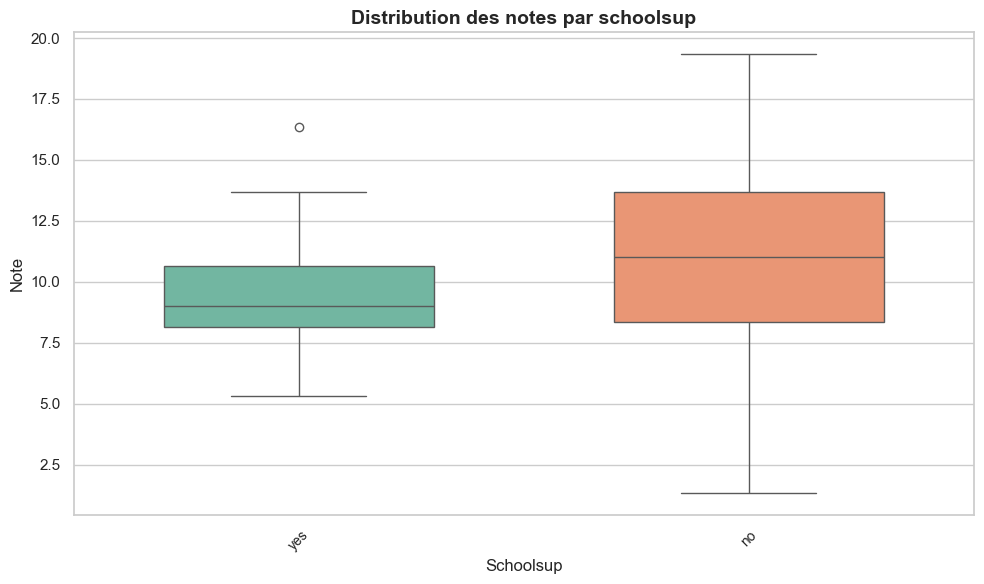

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


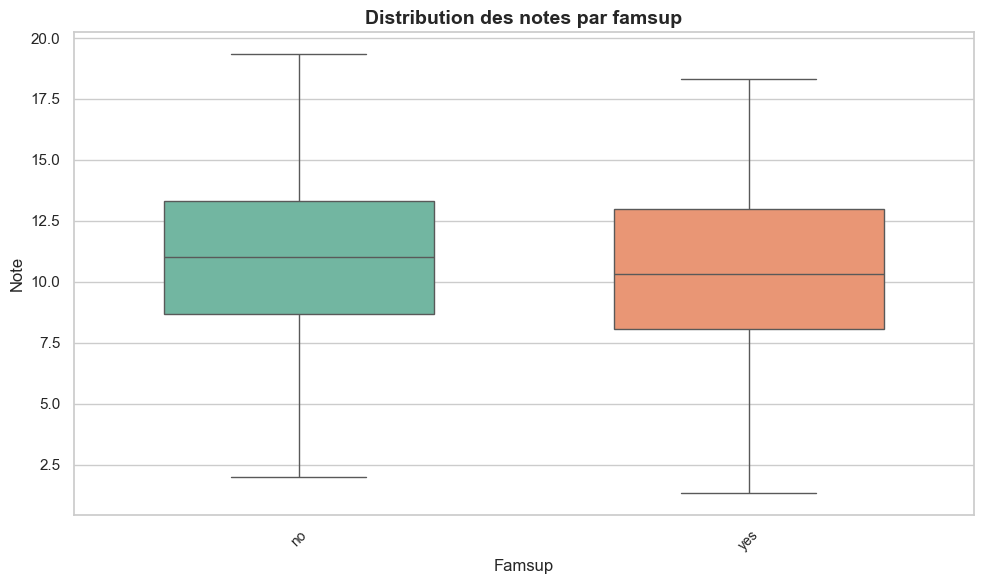

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


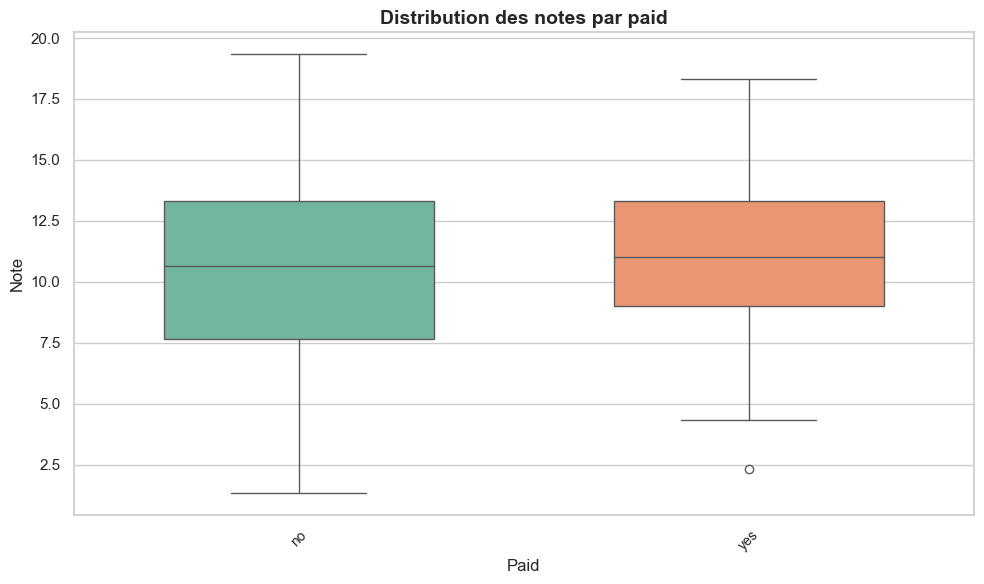

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


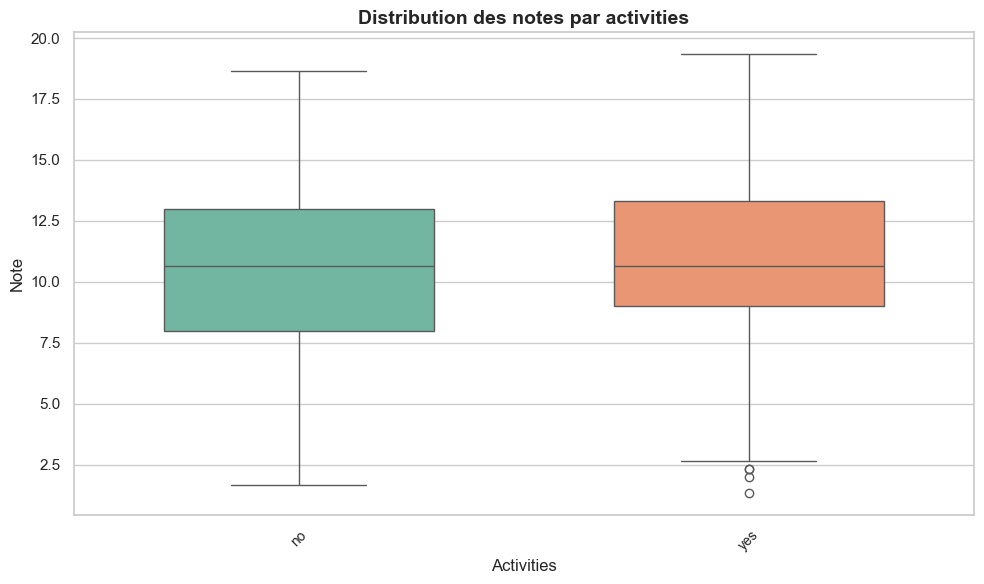

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


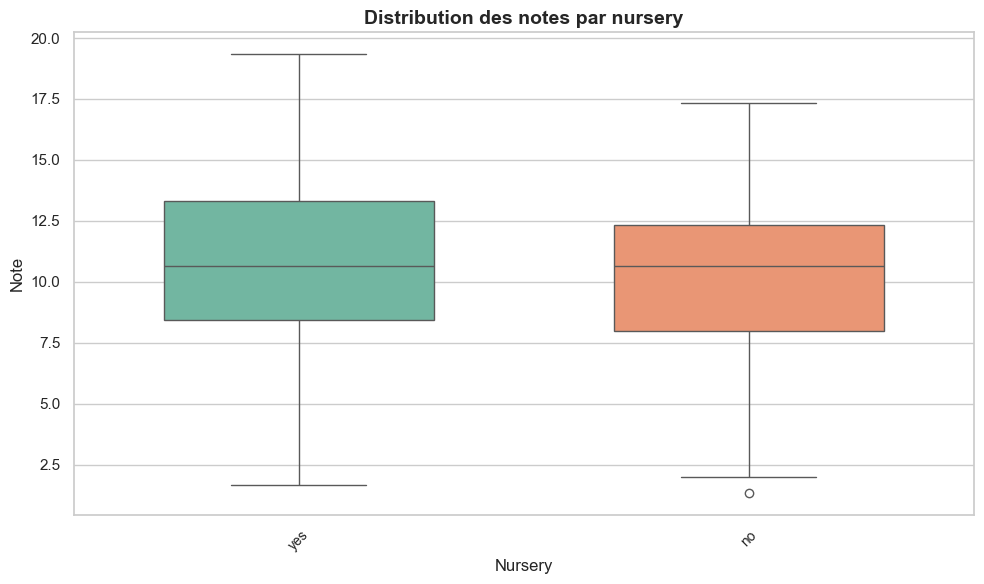

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


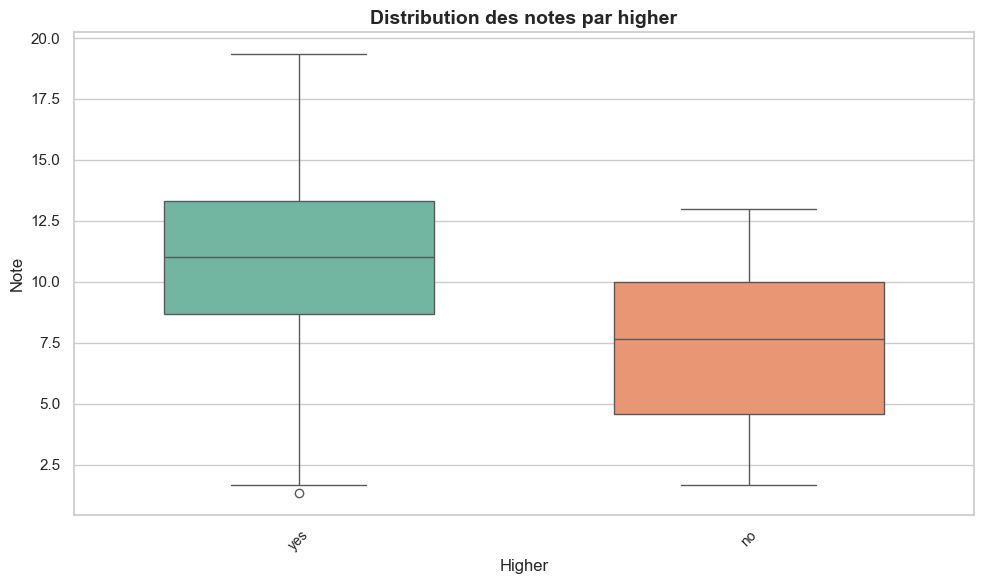

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


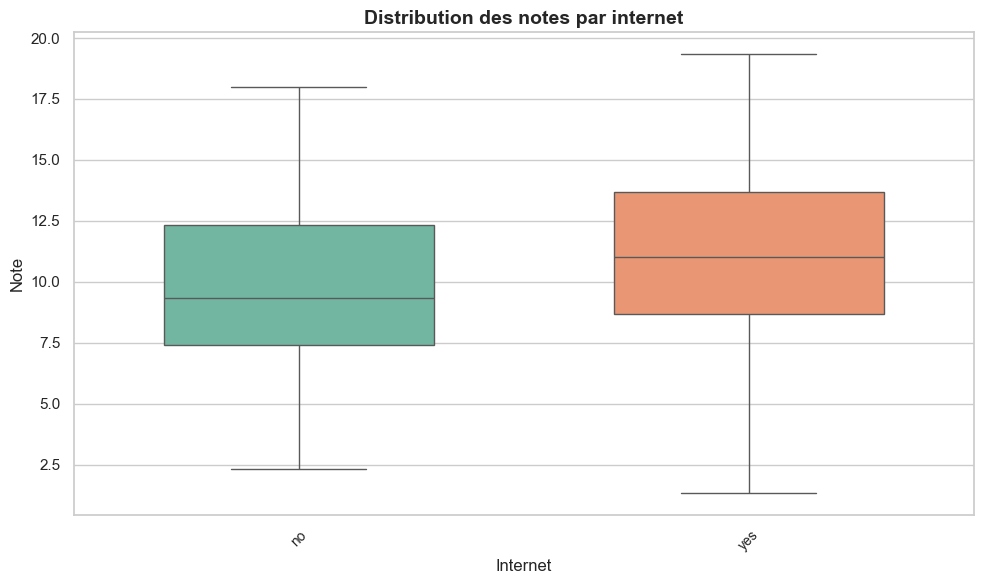

C:\Users\pc\AppData\Local\Temp\ipykernel_20292\3178886318.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)


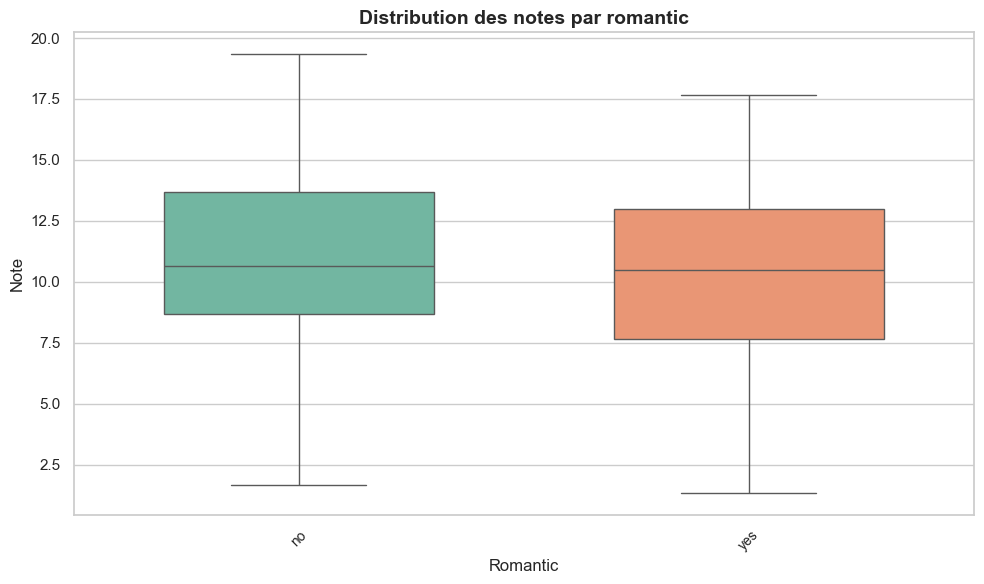

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir un style pour Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

for colonne in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Utiliser boxplot pour plus de clarté
    sns.boxplot(data=data_copy, x=colonne, y='note', palette="Set2", width=0.6)
    
    # Ajouter un titre clair
    plt.title(f'Distribution des notes par {colonne}', fontsize=14, fontweight='bold')
    
    # Ajuster les axes
    plt.xlabel(colonne.capitalize(), fontsize=12)
    plt.ylabel('Note', fontsize=12)
    
    # Rotation des étiquettes de l'axe X
    plt.xticks(rotation=45, fontsize=10)
    
    # Ajuster les marges pour éviter l'encombrement
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()


# maintennentr je vais travailler avec les G et non pas le note

In [21]:
data1.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]

In [38]:
x =data1.drop(['G1','G2','G3'],axis=1)
y=data1['G3']

In [185]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# LinearRegression

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
model=LinearRegression(n_jobs=-1)

In [188]:
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [189]:
y_predict = model.predict(x_test)

mean squared error =  18.543653661457423
mean absolute error =  3.4948497013642132
r2_score =  0.09565418606292186


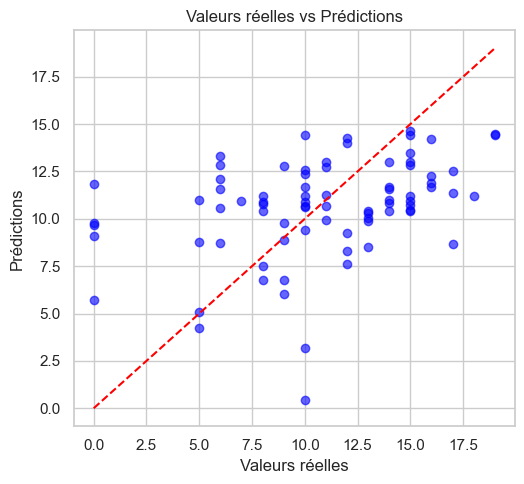

In [190]:
mesure_and_plot(y_test,y_predict)

# Ridge

In [191]:
from sklearn.linear_model import Ridge

In [192]:
ridge = Ridge()

In [193]:
ridge.fit(x_train,y_train)

Ridge()

In [194]:
y_predict=ridge.predict(x_test)

mean squared error =  18.48256967282386
mean absolute error =  3.4900849909487657
r2_score =  0.09863315937788186


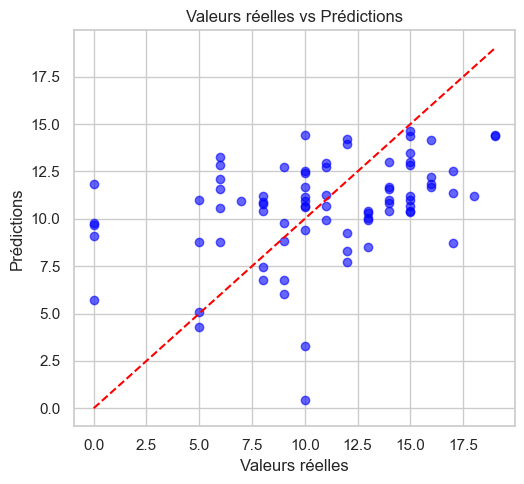

In [195]:
mesure_and_plot(y_test,y_predict)

In [196]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

In [197]:
param_grid = {
    'alpha' : [0,1,2,3,5,10,15,20,30,50,100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'max_iter' : [100,500,1000,1500,2000,5000],
    'tol' : [0.00001,0.0001,0.001]
}

In [198]:
grid_search = GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [199]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 3, 5, 10, 15, 20, 30, 50, 100],
                         'max_iter': [100, 500, 1000, 1500, 2000, 5000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001]},
             verbose=1)

In [200]:
print("les bests parametrs :  ",grid_search.best_params_)

les bests parametrs :   {'alpha': 100, 'max_iter': 100, 'solver': 'lsqr', 'tol': 0.001}


In [201]:
model_ridg = grid_search.best_estimator_

In [202]:
y_predict = model_ridg.predict(x_test)

mean squared error =  17.431438415069962
mean absolute error =  3.379490247071342
r2_score =  0.14989523373510127


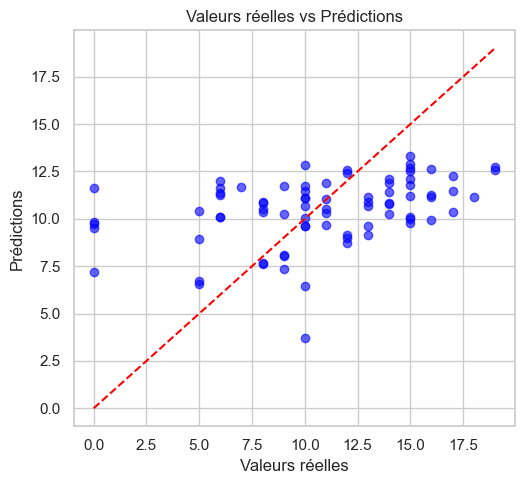

In [203]:
mesure_and_plot(y_test,y_predict)

# Lasso

In [204]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [205]:
param_grid = {
    'alpha' : [0.01,0,1,1,10,11,12,14,20,30,40,50,100],
    'max_iter' : [100,200,500,700,1000,1500,2000,2500,3000],
    'tol' : [0.01,0.1,0.5],
    'positive' : [True,False],
    'selection' : ['cyclic','random'],
    'warm_start' : [True,False]
    
    
}

In [206]:
grid_search=GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [207]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 2808 candidates, totalling 14040 fits


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0, 1, 1, 10, 11, 12, 14, 20, 30, 40,
                                   50, 100],
                         'max_iter': [100, 200, 500, 700, 1000, 1500, 2000,
                                      2500, 3000],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.01, 0.1, 0.5], 'warm_start': [True, False]},
             verbose=1)

In [208]:
print("les bests parametres : ",grid_search.best_params_)

les bests parametres :  {'alpha': 0, 'max_iter': 2000, 'positive': False, 'selection': 'random', 'tol': 0.5, 'warm_start': False}


In [209]:
model_lasso=grid_search.best_estimator_

In [210]:
y_predict=model_lasso.predict(x_test)

mean squared error =  18.432486373970317
mean absolute error =  3.4491085309364093
r2_score =  0.10107564576666195


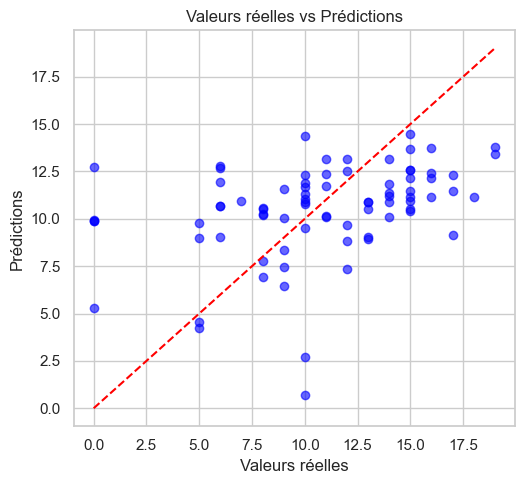

In [211]:
mesure_and_plot(y_test,y_predict)

# RandomForestRegressor

In [212]:
from sklearn.ensemble import RandomForestRegressor
param_grid={
    'n_estimators' : [100,200,300,400,500,1000,1500,2000],
#    'criterion': ['mean_squared_error','mean_absolute_error','poisson'],
#    'max_depth' : [2,4,6,8,10,12,15,18,20],
#    'min_simples_split' : [1,2,3,4,5,6,7,8,9,10],
#    'min_simples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'max_features' : ['auto','sqrt','log2'],
    'random_state' : [40,42,45,99,100],
    'bootstrap' : [True,False],
    'max_samples' : [2,5,8,10,20,15]
    
}

In [213]:
rfr = RandomForestRegressor()

In [214]:
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [215]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1181 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [2, 5, 8, 10, 20, 15],
                         'n_estimators': [100, 200, 300, 400, 500, 1000, 1500,
                                          2000],
                         'random_state': [40, 42, 45, 99, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [216]:
grid_search.best_estimator_

RandomForestRegressor(max_features='log2', max_samples=20, n_estimators=400,
                      random_state=100)

In [217]:
model= grid_search.best_estimator_

In [218]:
y_predict = model.predict(x_test)

mean squared error =  18.51114865506329
mean absolute error =  3.519841772151899
r2_score =  0.09723940583682378


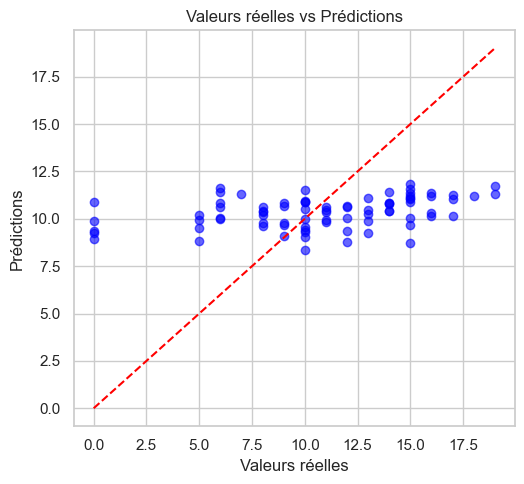

In [219]:
mesure_and_plot(y_test,y_predict)

# KNeighborsRegressor

In [220]:
from sklearn.neighbors import KNeighborsRegressor

In [221]:
knn = KNeighborsRegressor(20)

In [222]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [223]:
y_predict = knn.predict(x_test)

mean squared error =  16.12392405063291
mean absolute error =  3.2607594936708866
r2_score =  0.21366072265808167


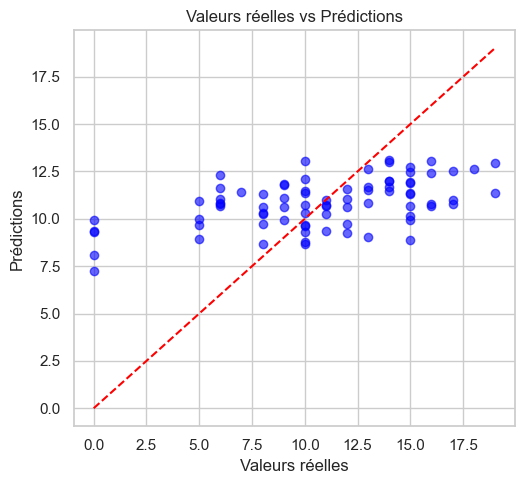

In [224]:
mesure_and_plot(y_test,y_predict)

# XGBRegressor

In [225]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Définir la grille réduite
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [4, 6, 8, 10, 12],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}


In [226]:
# Initialiser le modèle
xgb = XGBRegressor(random_state=42)

# Configurer la recherche en grille
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,                            # Validation croisée sur 3 folds
    scoring='neg_mean_squared_error', # Critère d'évaluation
    verbose=3,                       # Niveau de détail de la sortie
    n_jobs=-1                        # Utiliser tous les cœurs disponibles
)




In [227]:
# Exécuter la recherche sur les ensembles d'entraînement
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 3125 candidates, totalling 15625 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [228]:
# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

# Prédire sur l'ensemble de test
y_pred = grid_search.best_estimator_.predict(x_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error sur l'ensemble de test : {mse}")

Meilleurs paramètres trouvés :
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.6}
Mean Squared Error sur l'ensemble de test : 13.510545559371955


mean squared error =  13.510545559371955
mean absolute error =  2.9350726815718637
r2_score =  0.34111130237579346


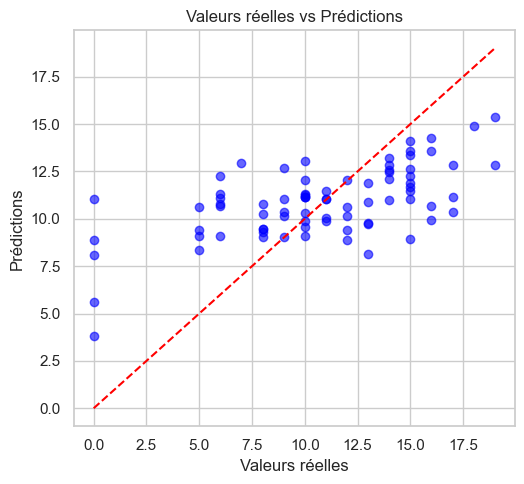

In [229]:
mesure_and_plot(y_test,y_pred)

In [230]:
from xgboost import XGBRegressor

model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)

In [231]:
model.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:45:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, cv=5, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=-1, num_parallel_tree=None, ...)

In [232]:
y_predict = model.predict(x_test)

mean squared error =  13.638611127086396
mean absolute error =  2.9282487977909137
r2_score =  0.3348658084869385


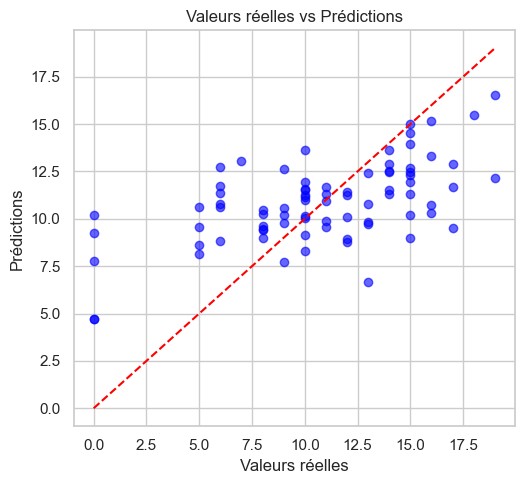

In [233]:
mesure_and_plot(y_test,y_predict)

# Choix du nombre de voisins K 

In [129]:
from sklearn.neighbors import KNeighborsRegressor

In [131]:
error_rate = []

for i in range (1,50) : 
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    mae= mean_absolute_error(y_test,y_pred)
    error_rate.append(mae)


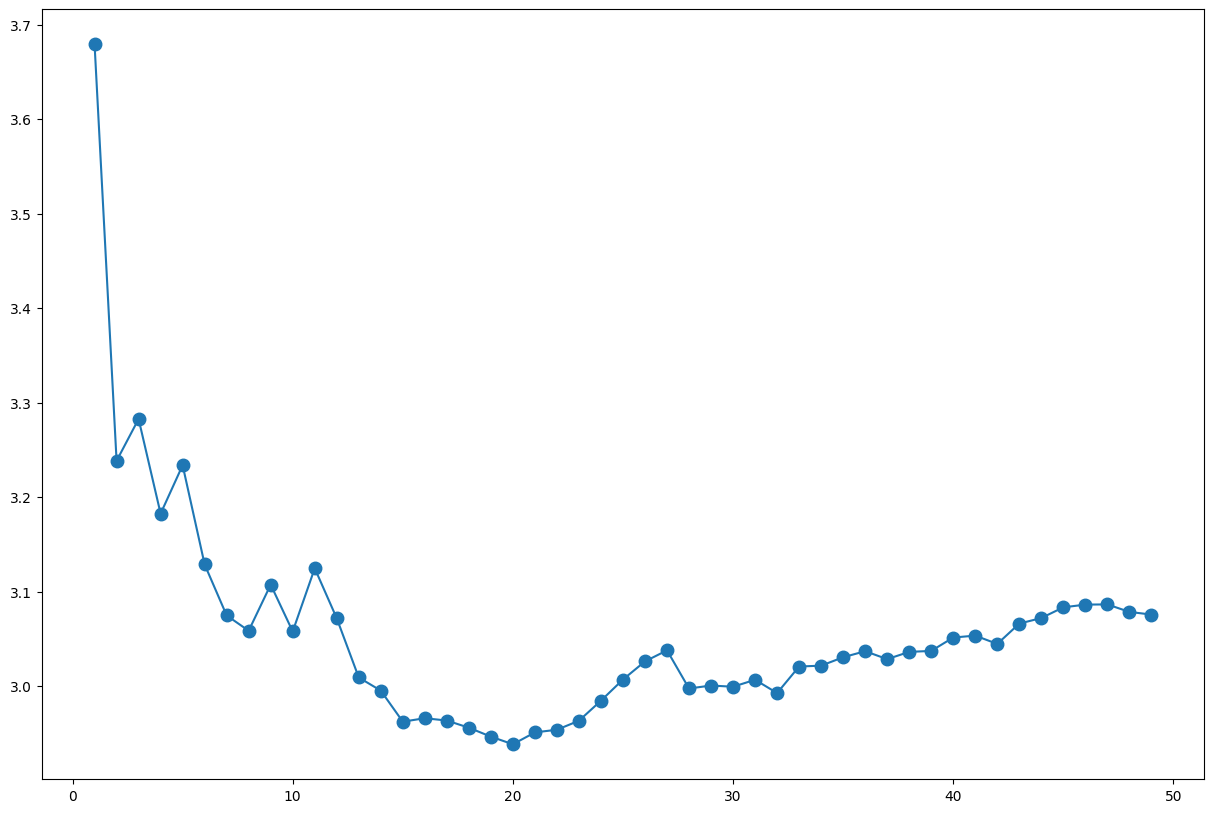

In [133]:
plt.figure(figsize=(15,10))
plt.plot(range(1,50), error_rate, marker='o', markersize=9)

# MinMaxScaler : les donnees entre 0 1t 1 [0,1]

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
mms = MinMaxScaler()

In [138]:
x_train= mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)

In [140]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [141]:
x_train.head()

0    1         2    3    4    5     6     7     8     9   ...   20   21  \
0  0.0  1.0  0.142857  1.0  0.0  1.0  0.75  0.75  0.75  0.50  ...  1.0  1.0   
1  0.0  1.0  0.142857  1.0  0.0  1.0  0.50  0.75  0.50  0.50  ...  1.0  1.0   
2  0.0  0.0  0.142857  1.0  0.0  1.0  0.25  0.75  0.00  0.75  ...  1.0  1.0   
3  0.0  0.0  0.142857  1.0  0.0  1.0  1.00  0.75  1.00  0.25  ...  1.0  1.0   
4  0.0  1.0  0.142857  0.0  0.0  1.0  0.50  0.25  0.50  0.50  ...  1.0  0.0   

    22    23    24    25    26    27    28        29  
0  1.0  0.75  0.25  0.50  0.00  0.25  0.50  0.026667  
1  0.0  1.00  0.50  0.50  0.00  0.00  0.50  0.000000  
2  1.0  0.75  0.50  1.00  0.00  0.00  0.50  0.000000  
3  0.0  0.50  0.75  0.75  0.25  0.75  0.75  0.026667  
4  0.0  0.50  0.50  0.25  0.00  0.50  0.50  0.000000  

[5 rows x 30 columns]

In [142]:
knn = KNeighborsRegressor(20)

In [143]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [144]:
y_predict = knn.predict(x_test)

mean squared error =  12.369799578059071
mean absolute error =  2.9559071729957807
r2_score =  0.16442466645500664


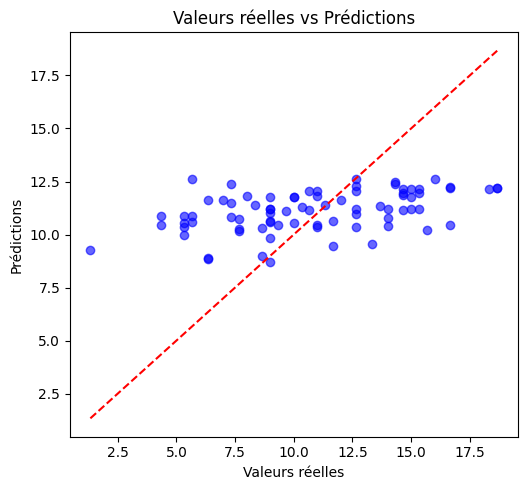

In [145]:
mesure_and_plot(y_test,y_predict)

In [219]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

# Commence ici

In [221]:
categorical_columns = data.select_dtypes(include=['object','category']).columns

In [222]:
categorical_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


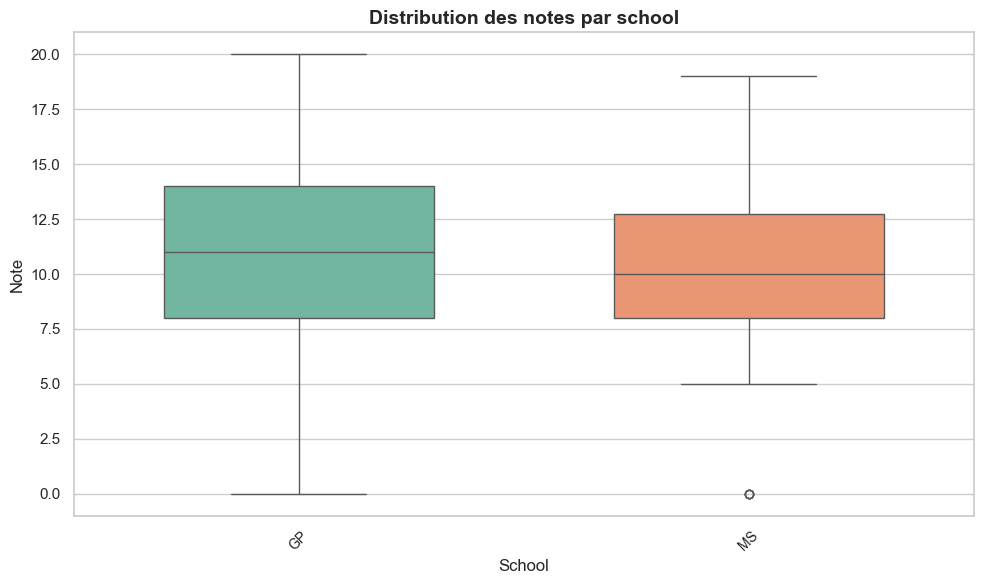

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


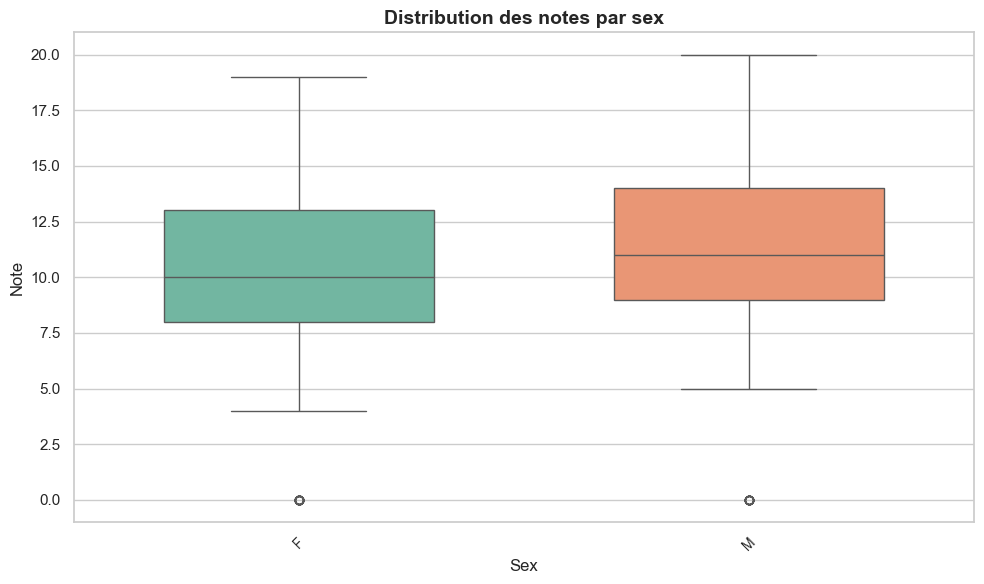

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


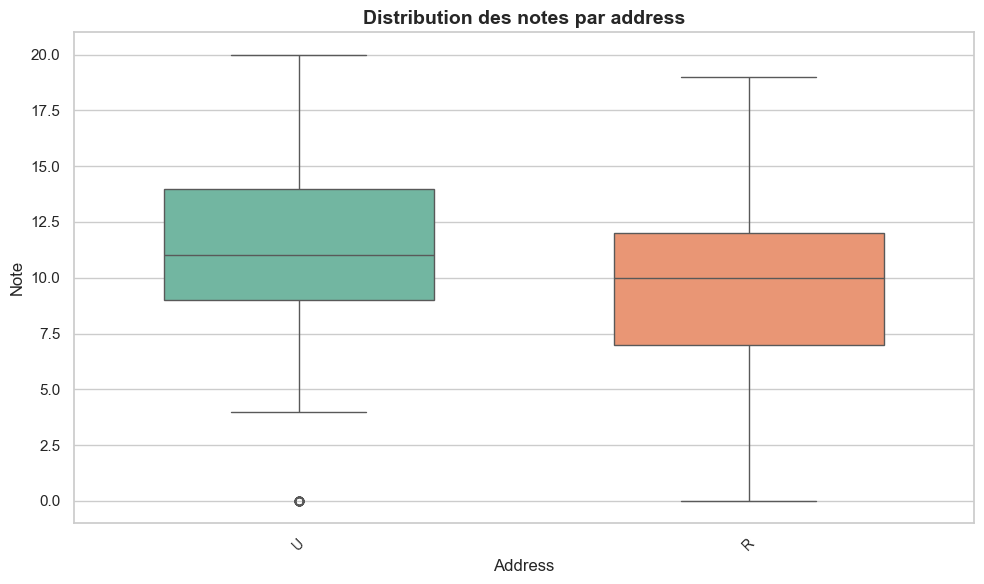

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


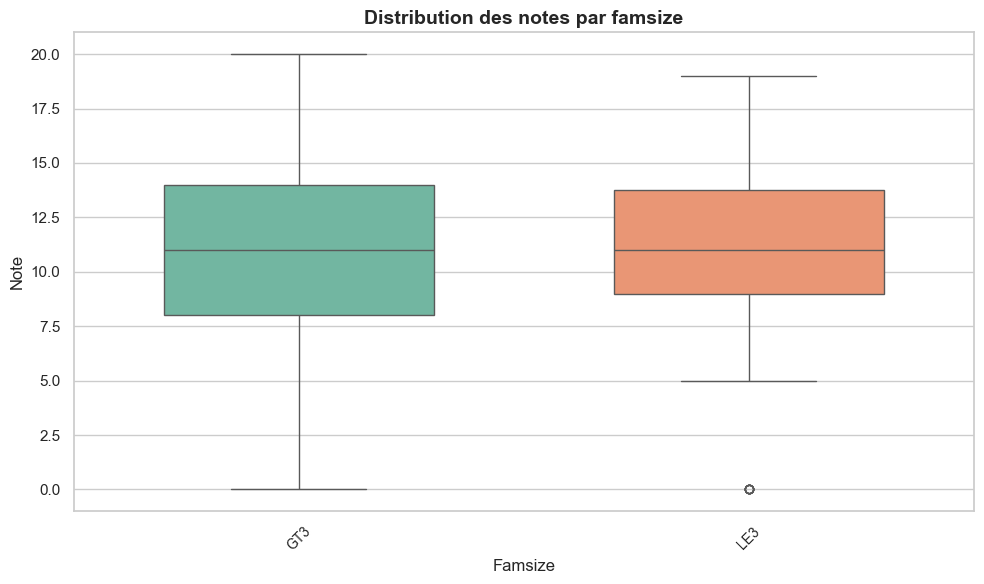

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


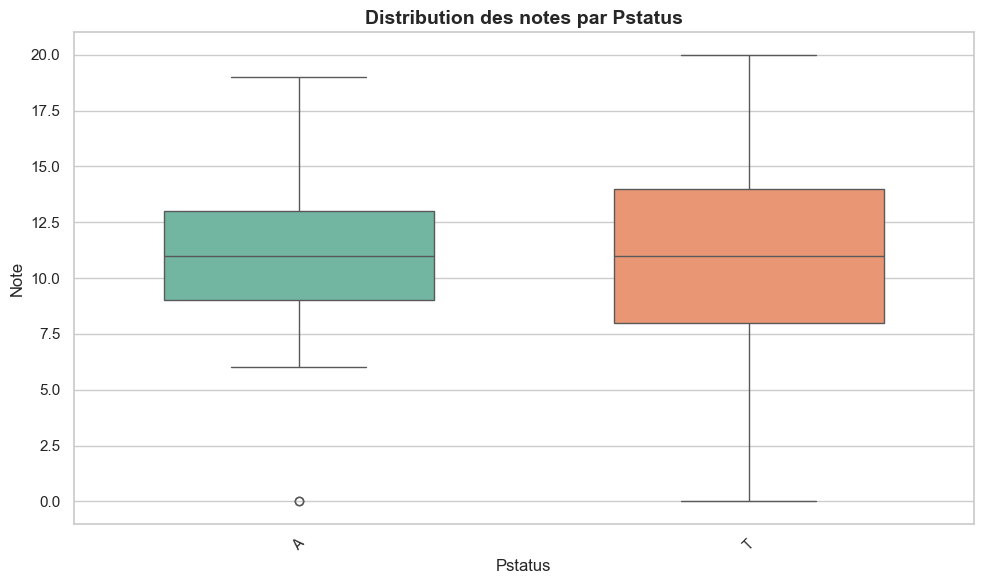

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


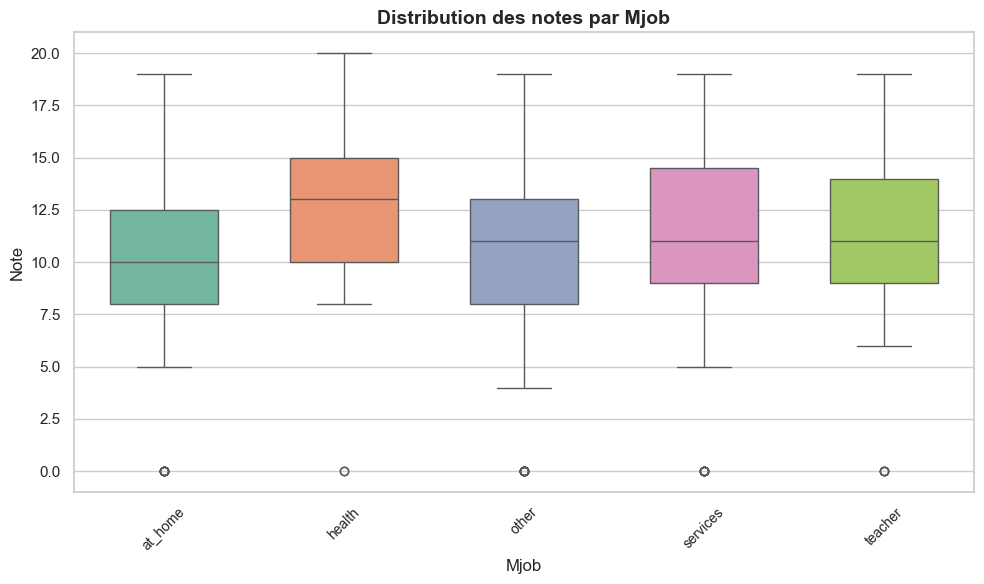

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


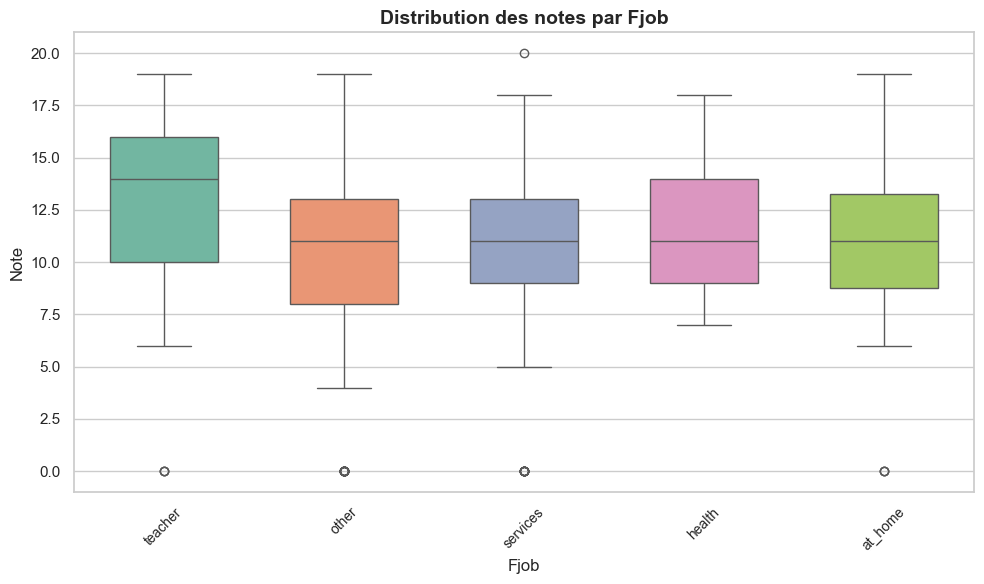

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


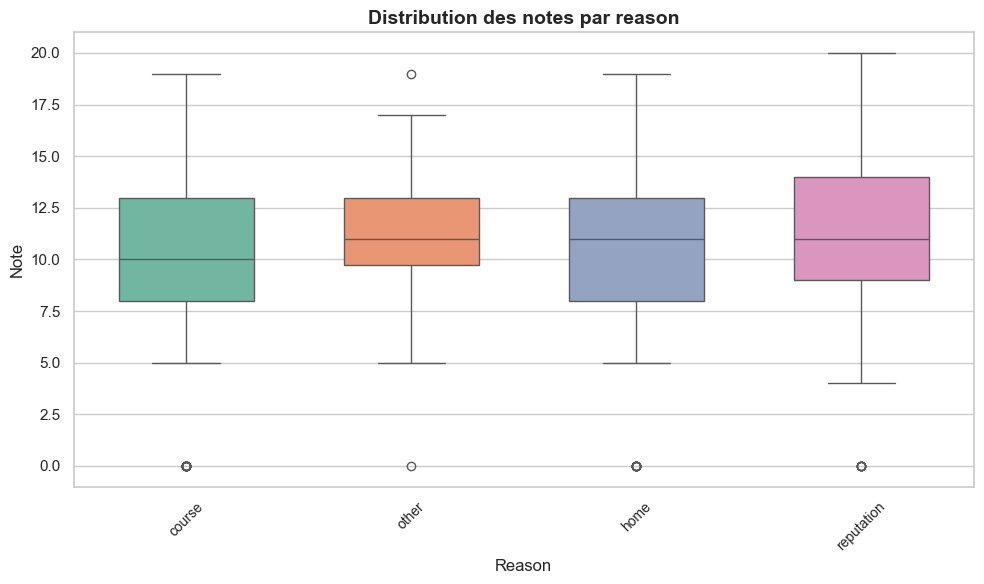

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


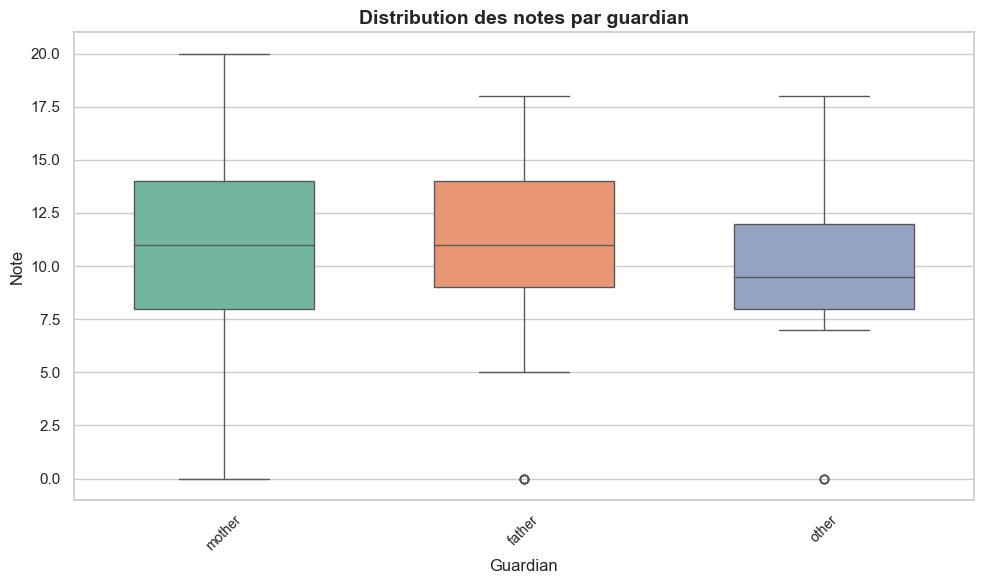

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


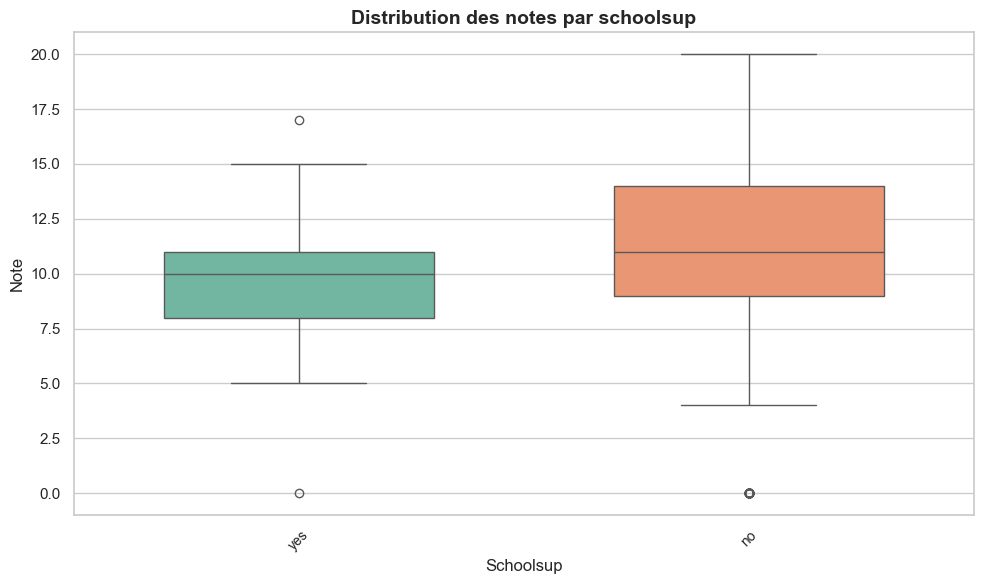

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


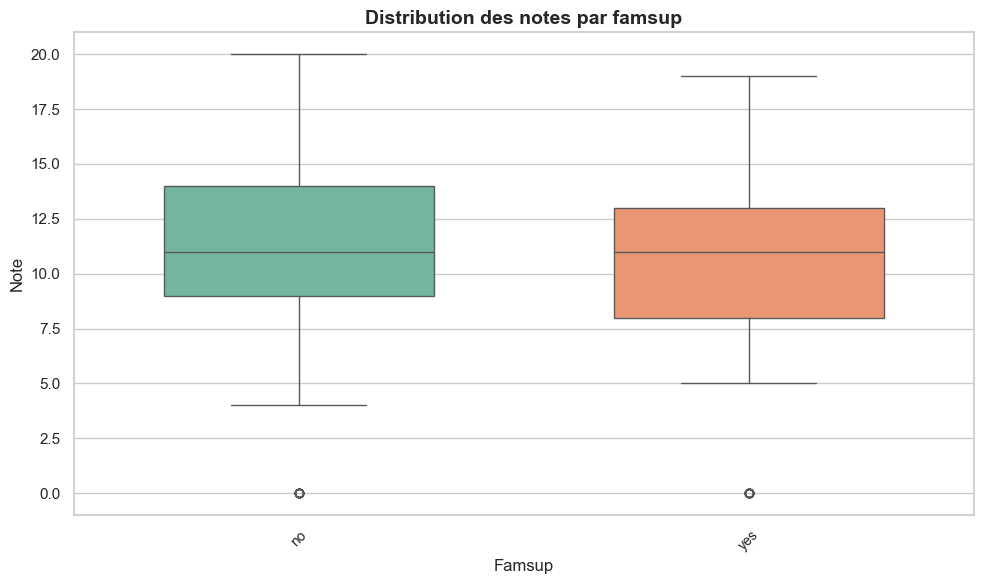

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


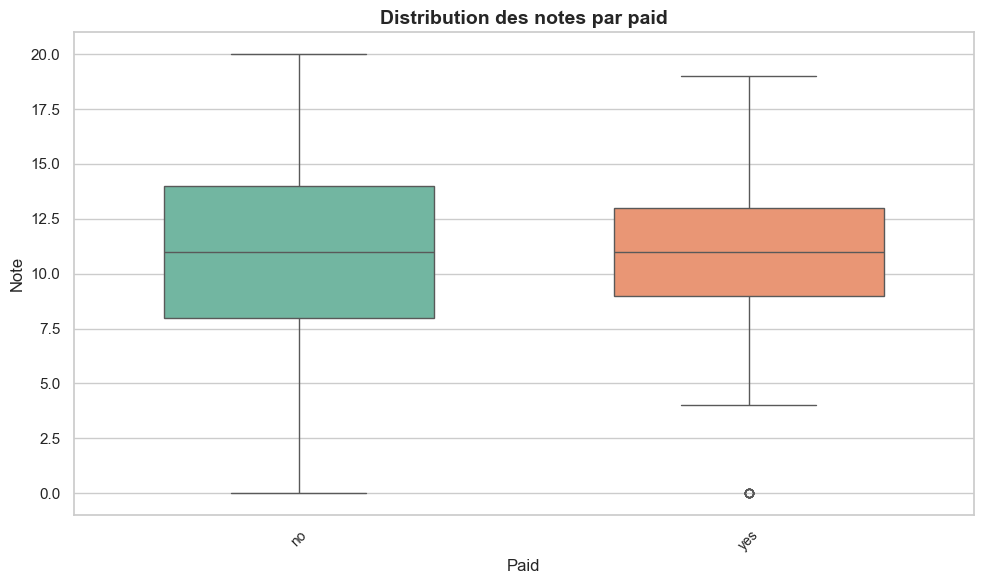

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


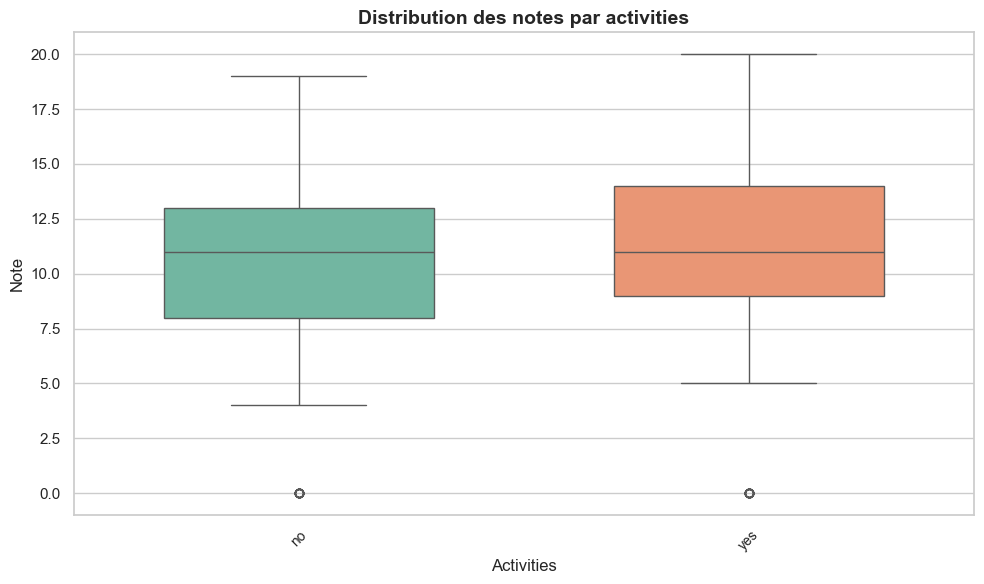

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


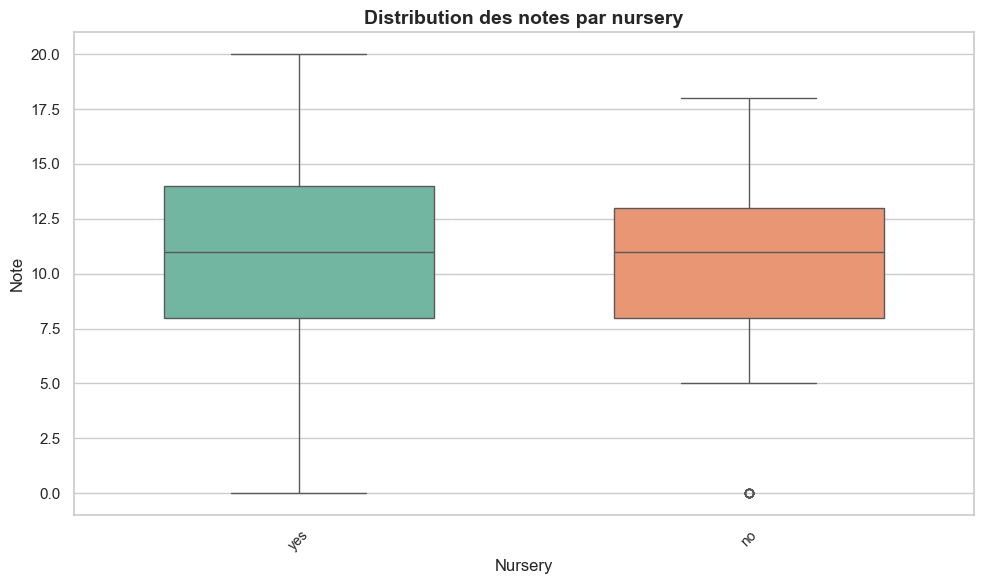

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


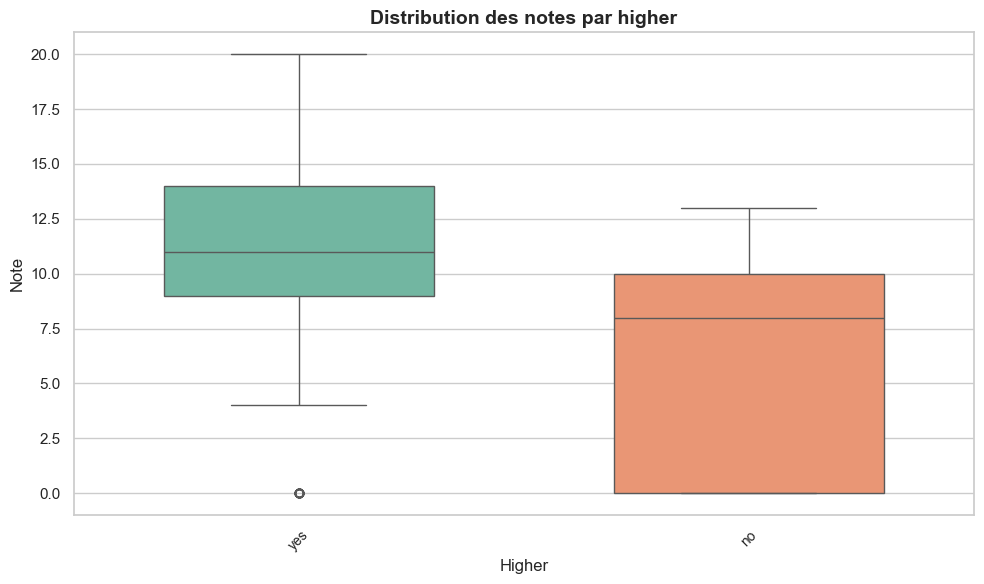

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


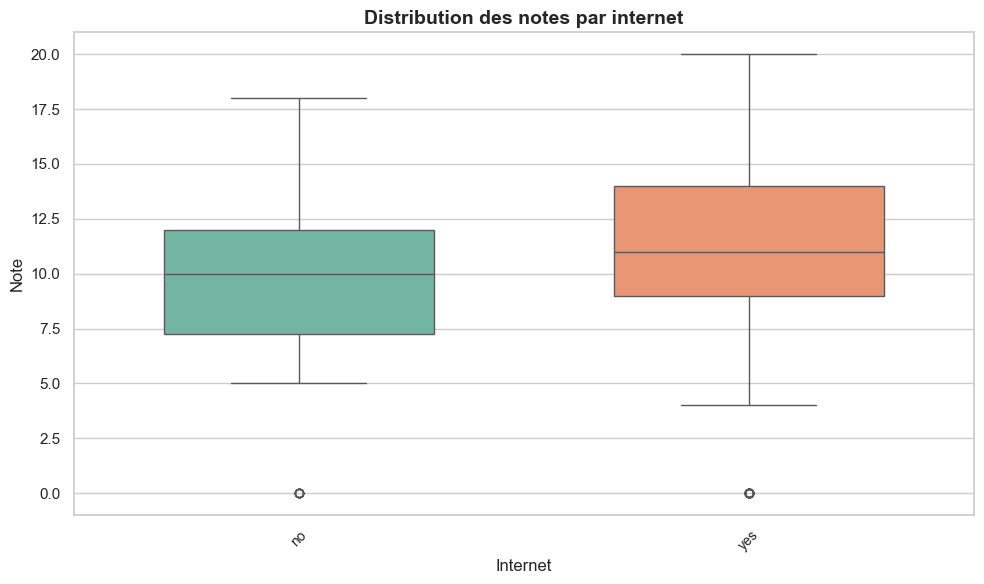

C:\Users\pc\AppData\Local\Temp\ipykernel_7260\116645975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)


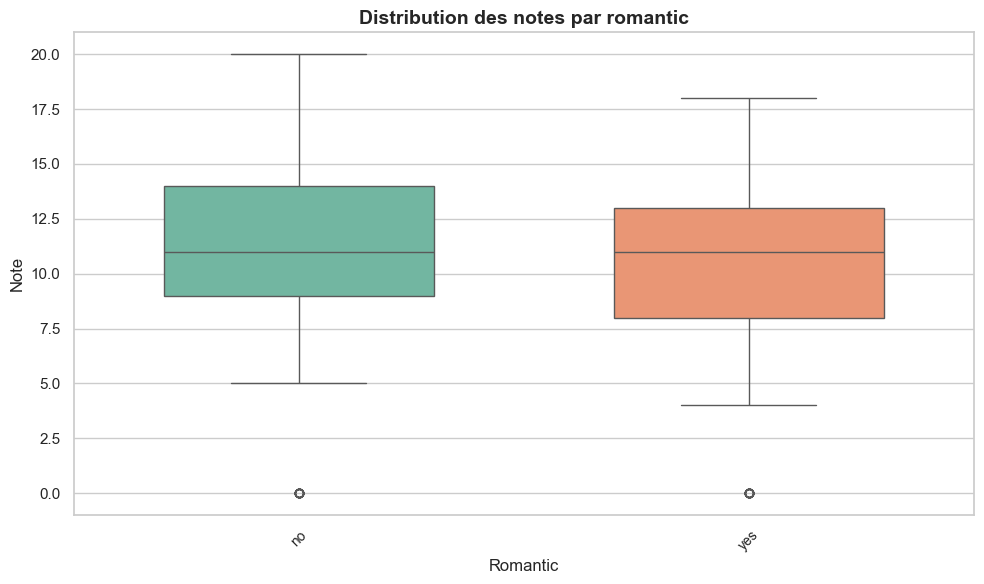

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir un style pour Seaborn
sns.set_theme(style="whitegrid", palette="pastel")

for colonne in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Utiliser boxplot pour plus de clarté
    sns.boxplot(data=data_copy, x=colonne, y='G3', palette="Set2", width=0.6)
    
    # Ajouter un titre clair
    plt.title(f'Distribution des notes par {colonne}', fontsize=14, fontweight='bold')
    
    # Ajuster les axes
    plt.xlabel(colonne.capitalize(), fontsize=12)
    plt.ylabel('Note', fontsize=12)
    
    # Rotation des étiquettes de l'axe X
    plt.xticks(rotation=45, fontsize=10)
    
    # Ajuster les marges pour éviter l'encombrement
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()


In [12]:
colonnes = data.select_dtypes(include='object').columns
colonnes

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
for colonne in colonnes:
    data[colonne] = le.fit_transform(data[colonne])

In [15]:
data.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]

In [16]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [17]:
# les colonnes a supprime 

In [18]:
colonne_supp =['school' , 'sex' , 'address','famsize' , 'Pstatus','reason','guardian','famsup','paid','activities','nursery','romantic']

In [19]:
data.drop(colonne_supp,axis=1,inplace=True)

In [20]:
data.head()

age  Medu  Fedu  Mjob  Fjob  traveltime  studytime  failures  schoolsup  \
0   18     4     4     0     4           2          2         0          1   
1   17     1     1     0     2           1          2         0          0   
2   15     1     1     0     2           1          2         3          1   
3   15     4     2     1     3           1          3         0          0   
4   16     3     3     2     2           1          2         0          0   

   higher  ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  \
0       1  ...       4         3      4     1     1       3         6   5   6   
1       1  ...       5         3      3     1     1       3         4   5   5   
2       1  ...       4         3      2     2     3       3        10   7   8   
3       1  ...       3         2      2     1     1       5         2  15  14   
4       1  ...       4         3      2     1     2       5         4   6  10   

   G3  
0   6  
1   6  
2  10  
3  15  
4  10  

[5 rows x 21 columns]

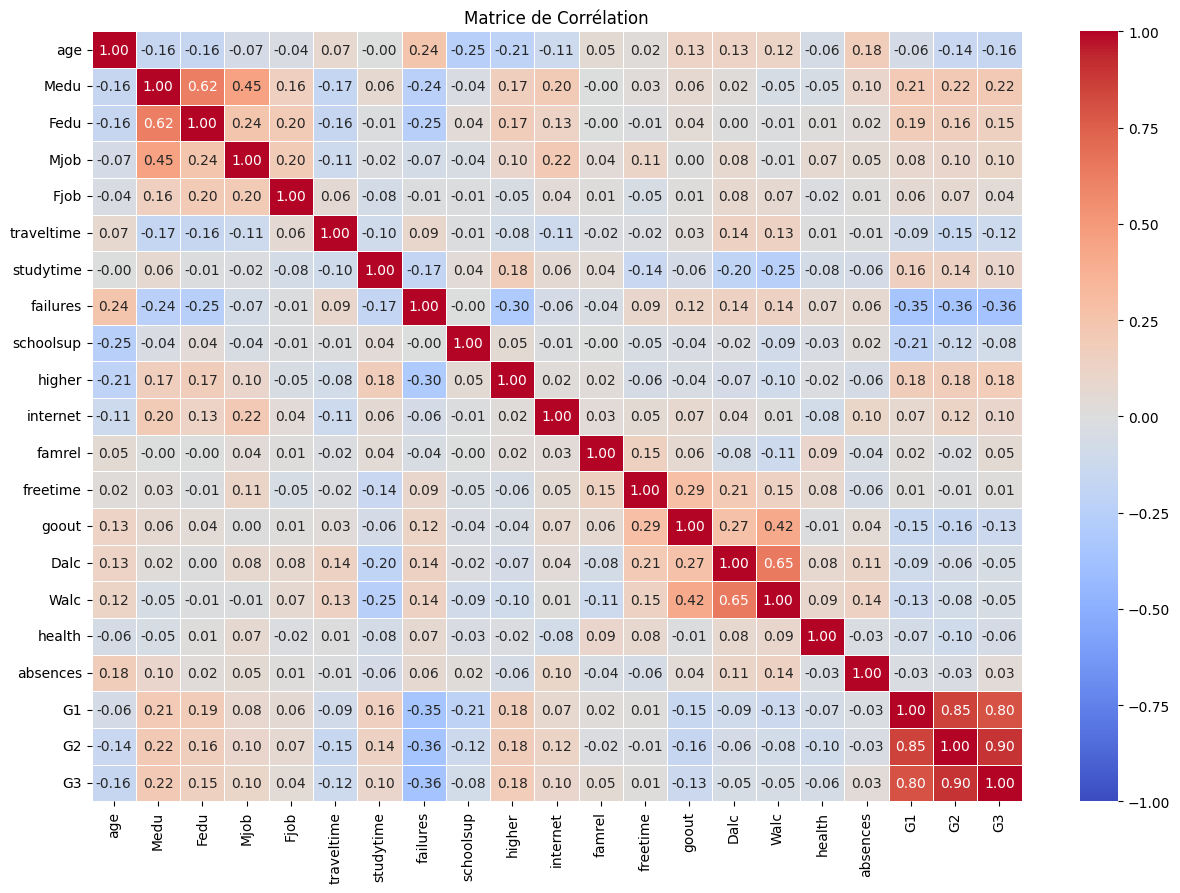

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Création de la heatmap
plt.figure(figsize=(15, 10))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Matrice de Corrélation')

# Affichage du graphique
plt.show()


In [22]:
x =data.drop(['G3'],axis=1)
y=data['G3']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [25]:
x_train.shape

(316, 20)

In [26]:
y_train.shape

(316,)

x_test.shape

In [27]:
y_test.shape

(79,)

In [52]:
param_grid = {
    'alpha' : [0,1,2,3,5,10,15,20,30,50,100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'max_iter' : [100,500,1000,1500,2000,5000],
    'tol' : [0.00001,0.0001,0.001]
}

In [53]:
from sklearn.model_selection import GridSearchCV

# Ridge

In [54]:
from sklearn.linear_model import Ridge

In [55]:
ridge = Ridge()

In [56]:
grid_search = GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [57]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 3, 5, 10, 15, 20, 30, 50, 100],
                         'max_iter': [100, 500, 1000, 1500, 2000, 5000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001]},
             verbose=1)

In [58]:
model=grid_search.best_estimator_

In [59]:
y_predict = model.predict(x_test)

mean squared error =  4.666558583312655
mean absolute error =  1.3557401397829478
r2_score =  0.7895148221495578


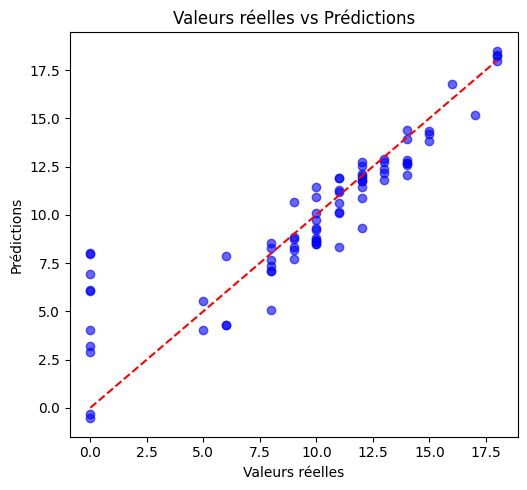

In [60]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mesure_and_plot(y_test,y_predict)

# KNeighborsRegressor

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knn = KNeighborsRegressor(20)

In [31]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [32]:
y_predict = knn.predict(x_test)

mean squared error =  4.667943037974682
mean absolute error =  1.481645569620253
r2_score =  0.789452376306318


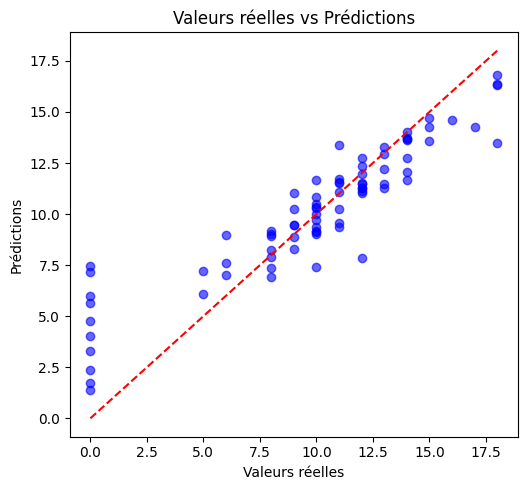

In [33]:
mesure_and_plot(y_test,y_predict)

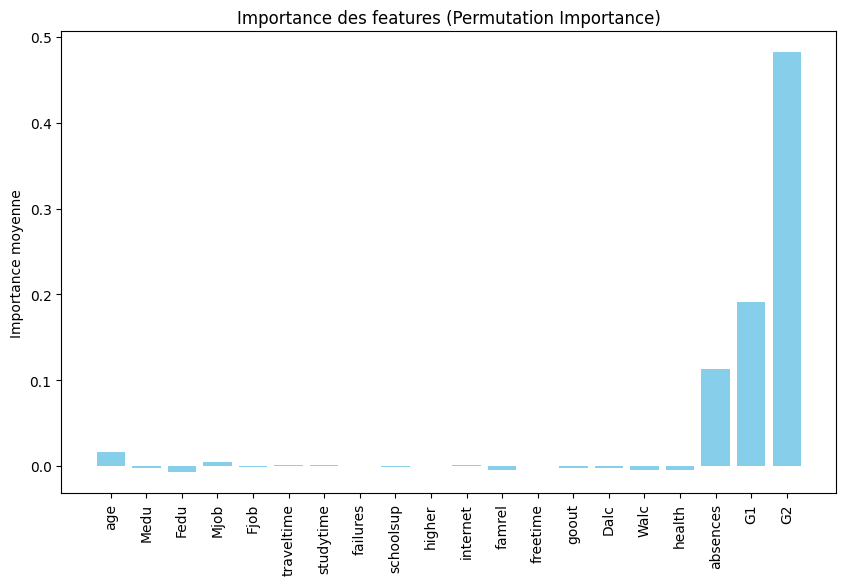

In [35]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculer les importances des features par permutation
result = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=42)

# Récupérer l'importance moyenne des features
feature_importance = result.importances_mean

# Créer un graphique vertical de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, feature_importance, color='skyblue')
plt.ylabel('Importance moyenne')
plt.title('Importance des features (Permutation Importance)')
plt.xticks(rotation=90)
plt.show()


# DecisionTreeRegressor

In [31]:
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [43]:
# Initialiser un modèle Decision Tree Regressor
model = DecisionTreeRegressor()

# Définir les paramètres à tester dans le Grid Search
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [44]:
# Entraîner le modèle avec la recherche de grille
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
print(grid_search.best_estimator_)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=8, min_samples_split=20)


In [46]:
model=grid_search.best_estimator_

In [47]:
y_predict=model.predict(x_test)

mean squared error =  3.2631807168270077
mean absolute error =  1.0189228596339541
r2_score =  0.852814196741126


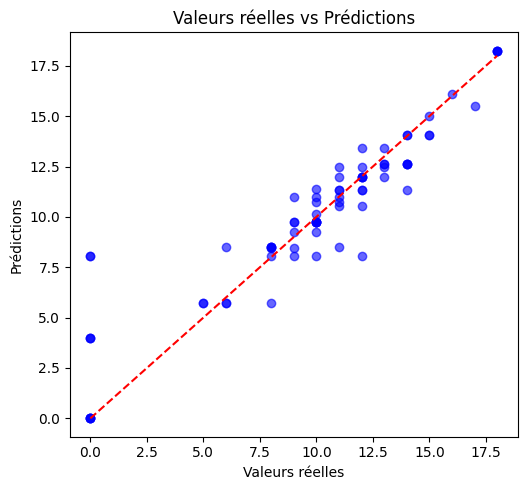

In [48]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mesure_and_plot(y_test,y_predict)

# XGBRegressor

## sans G1 et G2

In [21]:
x =data.drop(['G1','G2','G3'],axis=1)
y=data['G3']

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [24]:

from xgboost import XGBRegressor
model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)

In [25]:
model.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, cv=5, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=-1, num_parallel_tree=None, ...)

In [26]:
y_predict=model.predict(x_test)

mean squared error =  15.637594189011587
mean absolute error =  2.9626453944092876
r2_score =  0.2946661710739136


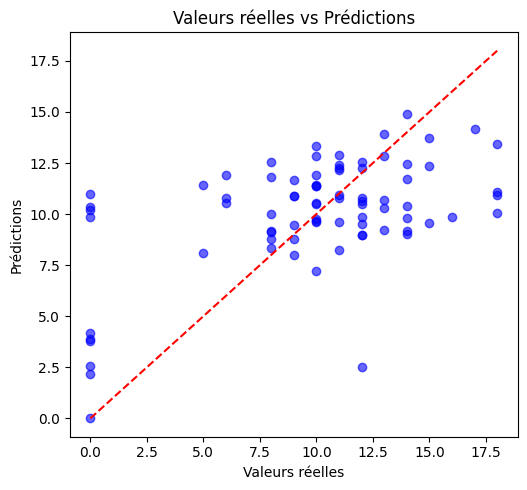

In [27]:
mesure_and_plot(y_test,y_predict)

## avec G1` ET G2 

In [39]:

from xgboost import XGBRegressor
model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)

In [40]:
model.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:39:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, cv=5, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=-1, num_parallel_tree=None, ...)

In [41]:
y_predict=model.predict(x_test)

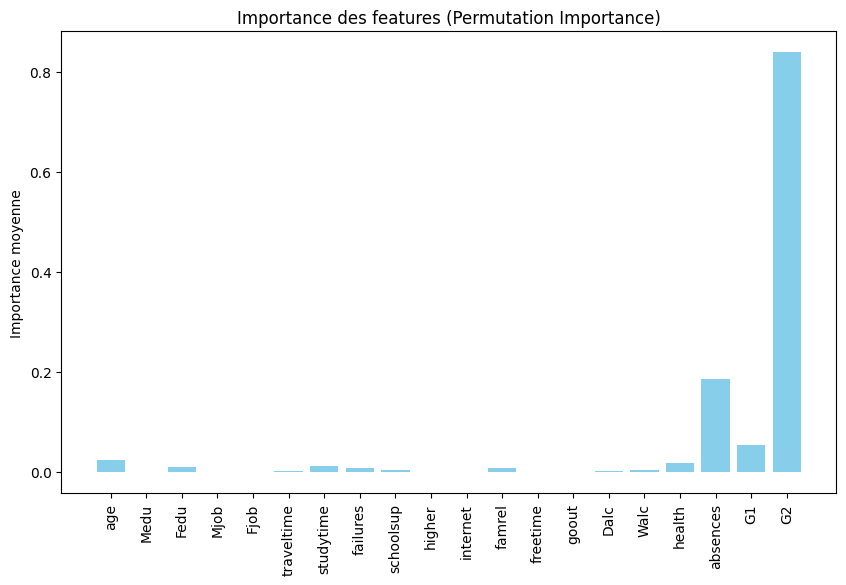

In [43]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculer les importances des features par permutation
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Récupérer l'importance moyenne des features
feature_importance = result.importances_mean

# Créer un graphique vertical de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, feature_importance, color='skyblue')
plt.ylabel('Importance moyenne')
plt.title('Importance des features (Permutation Importance)')
plt.xticks(rotation=90)
plt.show()


mean squared error =  2.0414290721141026
mean absolute error =  0.9383800242897831
r2_score =  0.907921314239502


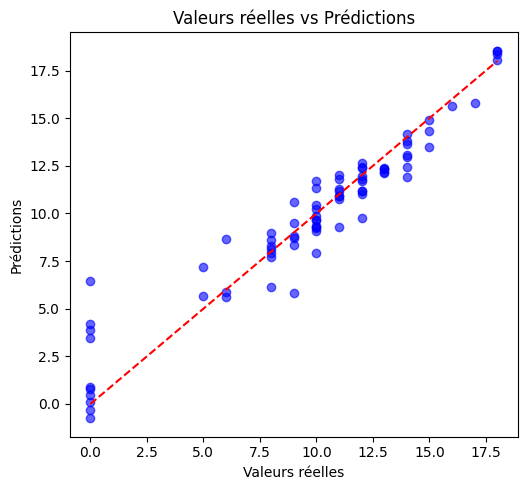

In [44]:
mesure_and_plot(y_test,y_predict)

# SVR

In [96]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



svr = SVR()


param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1],
    "degree": [2, 3, 4],  # Utilisé pour le kernel 'poly'
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring="r2", verbose=3, n_jobs=-1)


In [98]:

grid_search.fit(x_train, y_train.ravel())




C:\Users\pc\AppData\Local\Temp\ipykernel_20388\3404908811.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search.fit(x_train, y_train.ravel())


Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: 

In [ ]:
# Meilleurs hyperparamètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)



In [ ]:
# Évaluation sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


In [ ]:
mesure_and_plot(y_test,y_pred)

# MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train= mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [46]:
x_train.head()

0     1     2     3     4         5         6         7    8    9   \
0  0.571429  0.50  0.75  0.75  0.50  0.000000  0.666667  0.333333  0.0  1.0   
1  0.142857  0.75  1.00  0.75  0.50  0.000000  0.000000  0.000000  0.0  1.0   
2  0.285714  0.25  0.25  0.00  0.75  0.000000  0.333333  0.000000  0.0  1.0   
3  0.571429  1.00  0.75  0.75  0.00  0.000000  0.333333  0.000000  0.0  1.0   
4  0.428571  0.75  0.50  0.75  0.50  0.333333  0.666667  0.000000  0.0  1.0   

    10    11    12    13   14    15    16        17      18        19  
0  1.0  1.00  0.75  0.25  0.0  0.25  1.00  0.000000  0.2500  0.263158  
1  1.0  0.50  0.25  0.00  0.0  0.75  1.00  0.213333  0.5625  0.578947  
2  1.0  1.00  0.50  0.50  0.0  0.00  0.50  0.000000  0.3125  0.421053  
3  1.0  0.75  0.50  0.00  0.0  0.00  0.00  0.160000  0.5000  0.578947  
4  1.0  1.00  0.75  0.25  0.0  0.00  0.75  0.106667  0.6875  0.684211

# DecisionTreeRegressor

In [47]:
# Initialiser un modèle Decision Tree Regressor
model = DecisionTreeRegressor()

# Définir les paramètres à tester dans le Grid Search
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

NameError: name 'DecisionTreeRegressor' is not defined

In [33]:
# Entraîner le modèle avec la recherche de grille
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
print(grid_search.best_estimator_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_leaf=8, min_samples_split=5)


In [35]:
model=grid_search.best_estimator_

In [36]:
y_predict=model.predict(x_test)

mean squared error =  4.8386075949367084
mean absolute error =  1.2848101265822784
r2_score =  0.7817545495280632


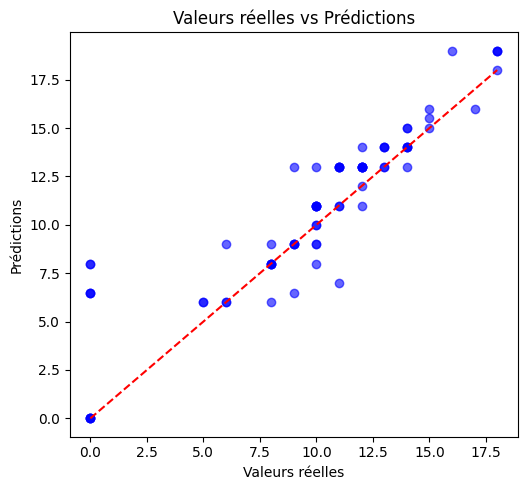

In [37]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mesure_and_plot(y_test,y_predict)

# XGBRegressor

# sans G1 et G2

In [29]:

from xgboost import XGBRegressor
model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)

In [ ]:
model.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:10:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_predict=model.predict(x_test)

In [ ]:
mesure_and_plot(y_test,y_predict)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculer les importances des features par permutation
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Récupérer l'importance moyenne des features
feature_importance = result.importances_mean

# Créer un graphique vertical de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, feature_importance, color='skyblue')
plt.ylabel('Importance moyenne')
plt.title('Importance des features (Permutation Importance)')
plt.xticks(rotation=90)
plt.show()


# avec G1` ET G2 

In [48]:

from xgboost import XGBRegressor
model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)

In [49]:
model.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:43:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, cv=5, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=-1, num_parallel_tree=None, ...)

In [50]:
y_predict=model.predict(x_test)

mean squared error =  2.263921529622847
mean absolute error =  1.0071725977372519
r2_score =  0.897885799407959


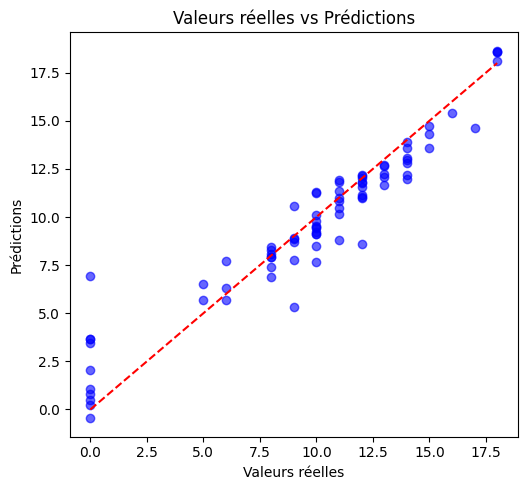

In [51]:
mesure_and_plot(y_test,y_predict)

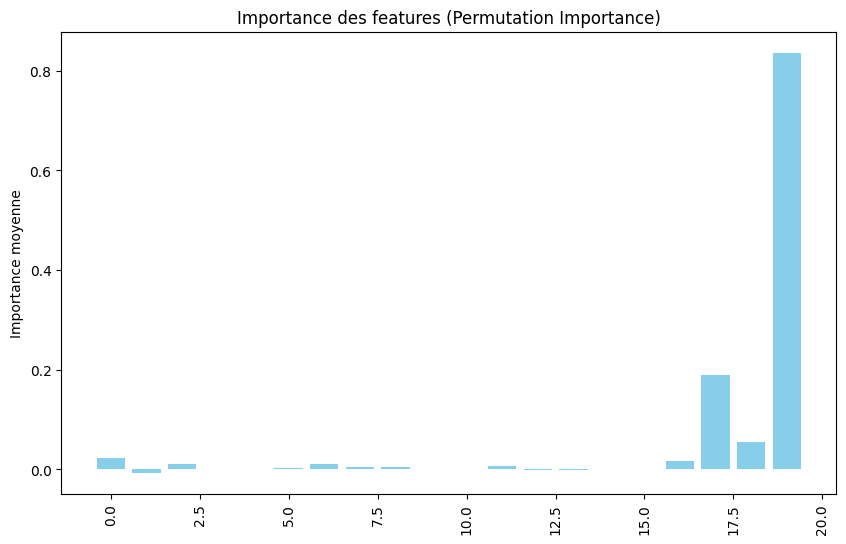

In [53]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculer les importances des features par permutation
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Récupérer l'importance moyenne des features
feature_importance = result.importances_mean

# Créer un graphique vertical de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, feature_importance, color='skyblue')
plt.ylabel('Importance moyenne')
plt.title('Importance des features (Permutation Importance)')
plt.xticks(rotation=90)
plt.show()


In [77]:
x_train.shape

(316, 20)

# StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()
x_train= ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [30]:
x_train.head()

0         1         2         3         4         5         6   \
0  1.810484 -0.688557  0.405092  0.674990 -0.368711 -0.634423  1.176677   
1 -0.531042  0.206850  1.319441  0.674990 -0.368711 -0.634423 -1.261552   
2  0.249466 -1.583964 -1.423607 -1.677548  0.751603 -0.634423 -0.042438   
3  1.810484  1.102257  0.405092  0.674990 -2.609339 -0.634423 -0.042438   
4  1.029975  0.206850 -0.509258  0.674990 -0.368711  0.861679  1.176677   

         7         8         9         10        11        12        13  \
0  0.879340 -0.386123  0.238445  0.443813  1.180777  0.777257 -0.974029   
1 -0.450188 -0.386123  0.238445  0.443813 -1.158568 -1.269520 -1.881974   
2 -0.450188 -0.386123  0.238445  0.443813  1.180777 -0.246131 -0.066085   
3 -0.450188 -0.386123  0.238445  0.443813  0.011104 -0.246131 -1.881974   
4 -0.450188 -0.386123  0.238445  0.443813  1.180777  0.777257 -0.974029   

         14        15        16        17        18        19  
0 -0.537127 -0.233363  1.064336 -0.700285 -1.192501 -1.525178  
1 -0.537127  1.319116  1.064336  1.197164  0.293423  0.051560  
2 -0.537127 -1.009603 -0.357779 -0.700285 -0.895316 -0.736809  
3 -0.537127 -1.009603 -1.779894  0.722802 -0.003762  0.051560  
4 -0.537127 -1.009603  0.353278  0.248440  0.887792  0.577139

# DecisionTreeRegressor

In [49]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialiser un modèle Decision Tree Regressor
model = DecisionTreeRegressor()

# Définir les paramètres à tester dans le Grid Search
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Entraîner le modèle avec la recherche de grille
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=8,
                      min_samples_split=20)
mean squared error =  3.43500485945414
mean absolute error =  1.1143110330580348
r2_score =  0.8450640668382892


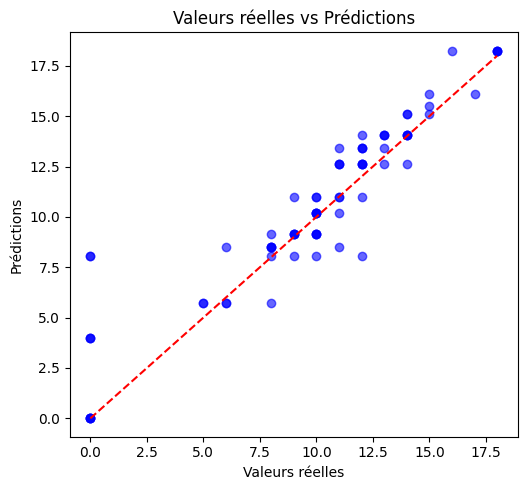

In [50]:
print(grid_search.best_estimator_)
model=grid_search.best_estimator_
y_predict=model.predict(x_test)
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mesure_and_plot(y_test,y_predict)

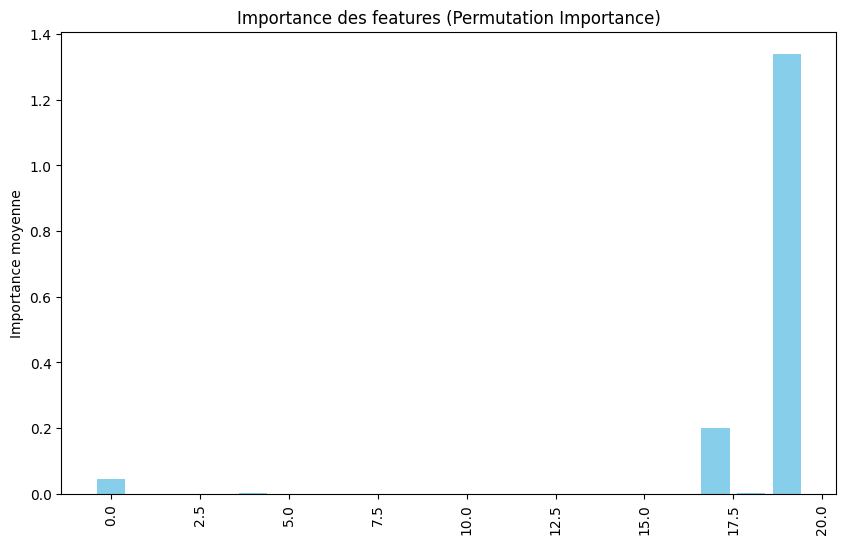

In [51]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculer les importances des features par permutation
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Récupérer l'importance moyenne des features
feature_importance = result.importances_mean

# Créer un graphique vertical de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, feature_importance, color='skyblue')
plt.ylabel('Importance moyenne')
plt.title('Importance des features (Permutation Importance)')
plt.xticks(rotation=90)
plt.show()


# XGBRegressor

In [52]:

from xgboost import XGBRegressor
model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)
model.fit(x_train,y_train)


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, cv=5, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=-1, num_parallel_tree=None, ...)

mean squared error =  2.5201518242225887
mean absolute error =  1.030696352825889
r2_score =  0.8863285183906555


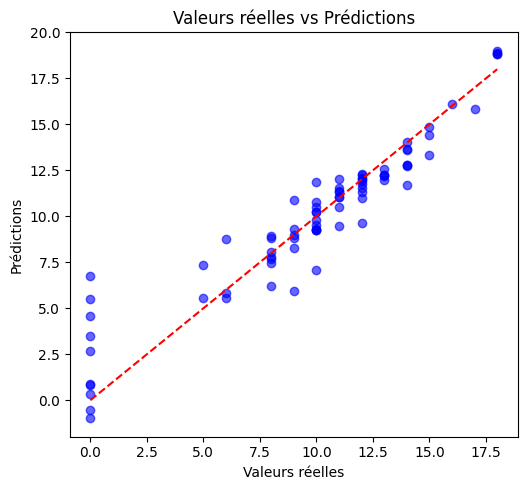

In [53]:
y_predict=model.predict(x_test)
mesure_and_plot(y_test,y_predict)

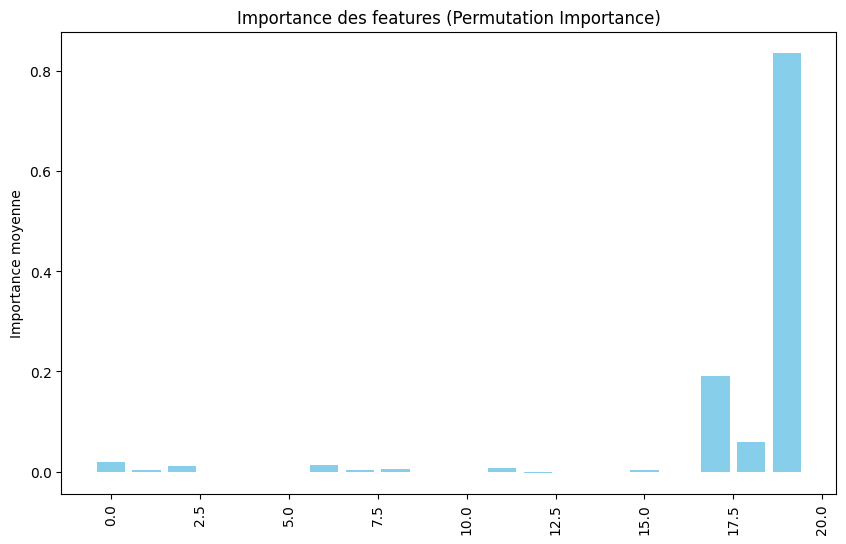

In [54]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculer les importances des features par permutation
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

# Récupérer l'importance moyenne des features
feature_importance = result.importances_mean

# Créer un graphique vertical de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, feature_importance, color='skyblue')
plt.ylabel('Importance moyenne')
plt.title('Importance des features (Permutation Importance)')
plt.xticks(rotation=90)
plt.show()


# Ridge

In [55]:
param_grid = {
    'alpha' : [0,1,2,3,5,10,15,20,30,50,100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'max_iter' : [100,500,1000,1500,2000,5000],
    'tol' : [0.00001,0.0001,0.001]
}

from sklearn.linear_model import Ridge
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 3, 5, 10, 15, 20, 30, 50, 100],
                         'max_iter': [100, 500, 1000, 1500, 2000, 5000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001]},
             verbose=1)

mean squared error =  4.864333711978944
mean absolute error =  1.4557072700742022
r2_score =  0.7805941727269663


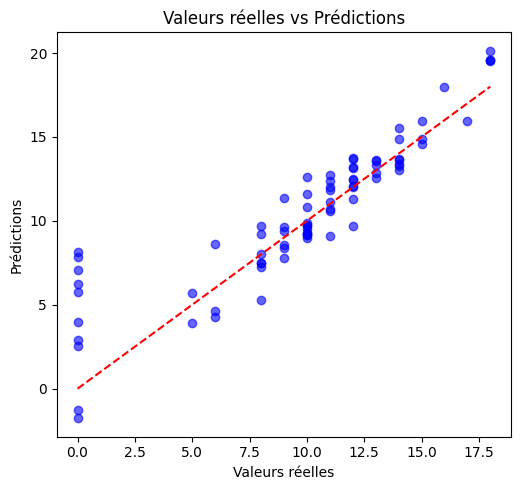

In [56]:
model=grid_search.best_estimator_
y_predict = model.predict(x_test)
mesure_and_plot(y_test,y_predict)

# KNeighborsRegressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(20)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

mean squared error =  10.456582278481012
mean absolute error =  2.1746835443037975
r2_score =  0.5283557376812222


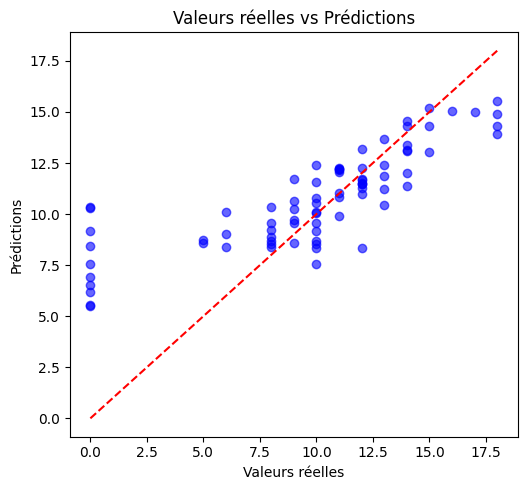

In [58]:
y_predict = knn.predict(x_test)
mesure_and_plot(y_test,y_predict)

# RandomForestRegressor

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid={
    'n_estimators' : [100,200,300,400,500,1000,1500,2000],
#    'criterion': ['mean_squared_error','mean_absolute_error','poisson'],
#    'max_depth' : [2,4,6,8,10,12,15,18,20],
#    'min_simples_split' : [1,2,3,4,5,6,7,8,9,10],
#    'min_simples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'max_features' : ['auto','sqrt','log2'],
    'random_state' : [40,42,45,99,100],
    'bootstrap' : [True,False],
    'max_samples' : [2,5,8,10,20,15]
    
}
rfr = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1007 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [2, 5, 8, 10, 20, 15],
                         'n_estimators': [100, 200, 300, 400, 500, 1000, 1500,
                                          2000],
                         'random_state': [40, 42, 45, 99, 100]},
             scoring='neg_mean_squared_error', verbose=2)

mean squared error =  8.368188370253163
mean absolute error =  1.8972468354430376
r2_score =  0.6225527686082564


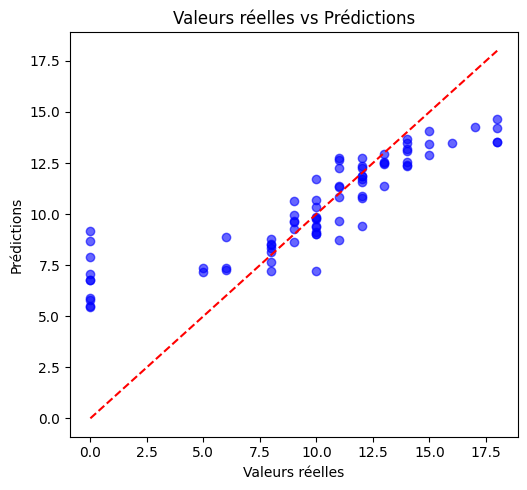

In [60]:
grid_search.best_estimator_
model= grid_search.best_estimator_
y_predict = model.predict(x_test)
mesure_and_plot(y_test,y_predict)

# LinearRegression

In [72]:
# Importation des bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


# Paramètres à tester dans la recherche en grille
param_grid = {
    'fit_intercept': [True, False],      # Test avec ou sans intercept
    # 'normalize': [True, False],          # Test avec ou sans normalisation
    'copy_X': [True, False],             # Test avec ou sans copie des données d'entrée
    'n_jobs': [None, -1]                 # Test avec utilisation d'un seul processeur ou de tous
}



# Initialisation de la régression linéaire
model = LinearRegression()

# Initialisation de GridSearchCV pour rechercher les meilleurs paramètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement du modèle avec la recherche en grille
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1]},
             scoring='neg_mean_squared_error')

mean squared error =  4.863307274110289
mean absolute error =  1.4555200180936296
r2_score =  0.7806404702186787


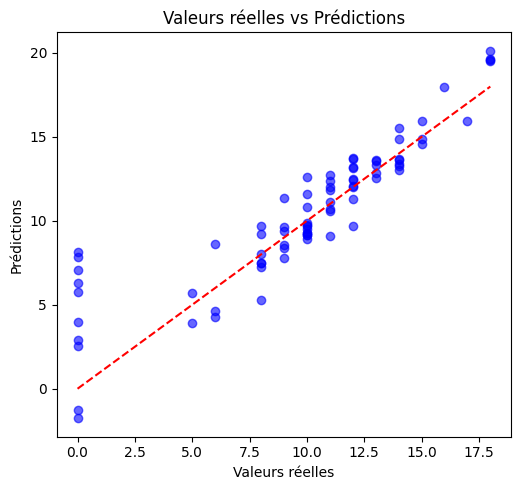

In [73]:
grid_search.best_estimator_
model= grid_search.best_estimator_
y_predict = model.predict(x_test)
mesure_and_plot(y_test,y_predict)

# LinearRegression - PolynomialFeatures

In [31]:
# Importation des bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Paramètres de la recherche en grille, avec les degrés polynomiaux
linear_params = {
    'polynomialfeatures__degree': [2, 3, 4, 5]  # Degrés polynomiaux à tester
}

# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Création du pipeline avec PolynomialFeatures et LinearRegression
pipeline = make_pipeline(PolynomialFeatures(), model)

# Application de GridSearchCV avec les paramètres définis
grid_search = GridSearchCV(estimator=pipeline, param_grid=linear_params, cv=5, scoring='neg_mean_squared_error')

# Entraînement du modèle avec la recherche en grille
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

mean squared error =  13.394451142403641
mean absolute error =  2.4436745191673084
r2_score =  0.39584312923882226


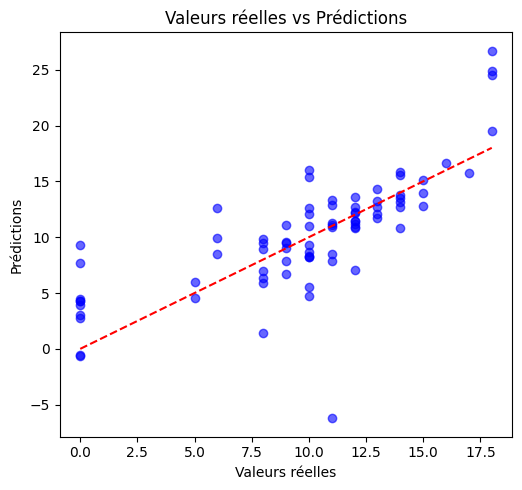

In [32]:
grid_search.best_estimator_
model= grid_search.best_estimator_
y_predict = model.predict(x_test)
mesure_and_plot(y_test,y_predict)

# PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA(10)

In [32]:
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [33]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [34]:
x_train.head()

0         1         2         3         4         5         6  \
0  0.002991  0.020104  0.411020 -0.254490  0.431627  0.146367  0.269649   
1  0.330406  0.195188  0.339455 -0.025415 -0.021217 -0.150319 -0.759712   
2 -0.464545 -0.354642 -0.209138 -0.417910  0.198956 -0.074117  0.064305   
3  0.353113 -0.506367 -0.379184 -0.162366 -0.121235  0.458355 -0.072401   
4  0.265527 -0.334816  0.210553 -0.376630  0.098303  0.101623  0.201371   

          7         8         9  
0 -0.190826  0.015512 -0.117870  
1 -0.093617  0.079451 -0.309050  
2  0.146746 -0.205514  0.201580  
3  0.051180  0.148005 -0.464414  
4 -0.031363  0.178092  0.239250

# DecisionTreeRegressor

In [ ]:
# Initialiser un modèle Decision Tree Regressor
model = DecisionTreeRegressor()

# Définir les paramètres à tester dans le Grid Search
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# KNeighborsRegressor

In [85]:
knn = KNeighborsRegressor(20)

In [86]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [87]:
y_predict = knn.predict(x_test)

mean squared error =  31.110031645569627
mean absolute error =  4.275316455696203
r2_score =  -0.40321833037017796


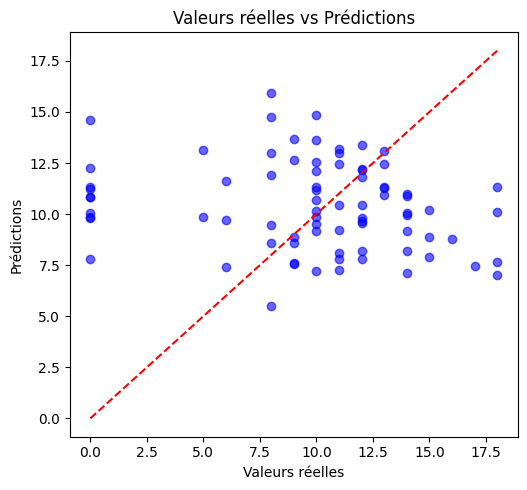

In [88]:
mesure_and_plot(y_test,y_predict)

# XGBRegressor

In [89]:

from xgboost import XGBRegressor
model=XGBRegressor(
    random_state = 44, colsample_bytree = 0.8, learning_rate = 0.01  , max_depth =12  ,subsample = 0.7  , n_estimators = 100000 , n_jobs=-1,cv=5
    
)

In [90]:
model.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:47:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, cv=5, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=-1, num_parallel_tree=None, ...)

In [91]:
y_predict=model.predict(x_test)

mean squared error =  36.92497752775147
mean absolute error =  4.780726511267167
r2_score =  -0.6655014753341675


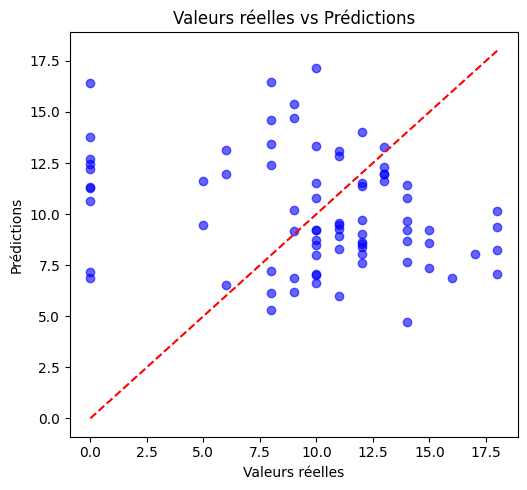

In [92]:
mesure_and_plot(y_test,y_predict)

# RandomForestRegressor

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid={
    'n_estimators' : [100,200,300,400,500,1000,1500,2000],
#    'criterion': ['mean_squared_error','mean_absolute_error','poisson'],
#    'max_depth' : [2,4,6,8,10,12,15,18,20],
#    'min_simples_split' : [1,2,3,4,5,6,7,8,9,10],
#    'min_simples_leaf' : [1,2,3,4,5,6,7,8,9,10],
    'max_features' : ['auto','sqrt','log2'],
    'random_state' : [40,42,45,99,100],
    'bootstrap' : [True,False],
    'max_samples' : [2,5,8,10,20,15]
    
}
rfr = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [37]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", lin

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [2, 5, 8, 10, 20, 15],
                         'n_estimators': [100, 200, 300, 400, 500, 1000, 1500,
                                          2000],
                         'random_state': [40, 42, 45, 99, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [38]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', max_samples=20, random_state=42)

In [39]:
model= grid_search.best_estimator_

In [40]:
y_predict = model.predict(x_test)

mean squared error =  27.152832911392405
mean absolute error =  3.890126582278481
r2_score =  -0.22472883656389575


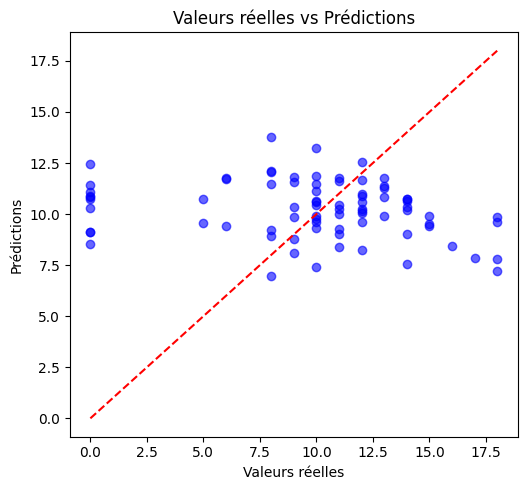

In [41]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
mesure_and_plot(y_test,y_predict)

In [42]:
x_train.head()

0         1         2         3         4         5         6  \
0  0.002991  0.020104  0.411020 -0.254490  0.431627  0.146367  0.269649   
1  0.330406  0.195188  0.339455 -0.025415 -0.021217 -0.150319 -0.759712   
2 -0.464545 -0.354642 -0.209138 -0.417910  0.198956 -0.074117  0.064305   
3  0.353113 -0.506367 -0.379184 -0.162366 -0.121235  0.458355 -0.072401   
4  0.265527 -0.334816  0.210553 -0.376630  0.098303  0.101623  0.201371   

          7         8         9  
0 -0.190826  0.015512 -0.117870  
1 -0.093617  0.079451 -0.309050  
2  0.146746 -0.205514  0.201580  
3  0.051180  0.148005 -0.464414  
4 -0.031363  0.178092  0.239250

# Pipeline